In [2]:
import numpy as np
import det_prob_plot as det
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

c:\Users\bryce\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


species v0.8.3

Working folder: c:\Users\bryce\High_Contrast_Imaging

Configuration file: c:\Users\bryce\High_Contrast_Imaging\species_config.ini
Database file: c:\Users\bryce\High_Contrast_Imaging\species_database.hdf5
Data folder: c:\Users\bryce\High_Contrast_Imaging\data

Configuration settings:
   - Database: c:\Users\bryce\High_Contrast_Imaging\species_database.hdf5
   - Data folder: c:\Users\bryce\High_Contrast_Imaging\data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


In [2]:
data = np.loadtxt("eltmasking_limits.sm")
file_list = np.zeros(shape = [25, len(data[:,0]), 2])
for i in range(len(file_list[:,0,0])):
    file_list[i,:,0] = data[:,1] * 0.001
    file_list[i,:,1] = 10 ** (-data[:,3]/2.5)
model = 'atmo'
model_tag = 'atmo-ceq'
foldername = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2023/exeter/fits'
file_mag_list = [7,7.5,8]
stellar_mag_list = [7.153, 
                    7.312,
                    7.36,
                    7.490,
                    7.48,
                    7.42,
                    7.564,
                    7.738,
                    7.759,
                    7.828,
                    7.084,
                    7.21,
                    7.297,
                    7.226,
                    7.411,
                    7.385,
                    7.568,
                    7.362,
                    7.732,
                    7.901,
                    7.433,
                    7.562,
                    7.471,
                    7.851,
                    8.061]
star_list = ['HIP55334',
             'HIP57950',
             'HIP58167',
             'HIP58220',
             'HIP58528',
             'HIP58899',
             'HIP59481',
             'HIP59505',
             'HIP60348',
             'HIP62171',
             'HIP62431',
             'HIP63041',
             'HIP63886',
             'HIP64184',
             'HIP64877',
             'HIP64995',
             'HIP67497',
             'HIP73990',
             'HIP74499',
             'HIP74865',
             'HIP75480',
             'HIP76084',
             'HIP76875',
             'HIP79516',
             'HIP79742',]
filter_name_list = ['MKO_Lp']*25
band_list = ['L']*25
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/UCL-LCC_L'
distance = [93,
102,
108,
107,
103,
107,
113,
115,
108,
119.6,
95.1,
98.1,
101.5,
95.7,
96.3,
109.6,
113.9,
110.7,
112.4,
123.5,
107.5,
97.0,
111.0,
120.5,
125.0]
age = [16]*25

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
The 'MKO_Lp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
L-Band Detection Probability for HIP55334, a 16 Myrs, 7.153 Mag Star at 93 pc time elapsed - 00:00:00.60
The 'MKO_Lp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
L-Band Detection Probability for HIP57950, a 16 Myrs, 7.312 Mag Star at 102 pc time elapsed - 00:00:00.54
The 'MKO_Lp' filter is found in the list of available fil

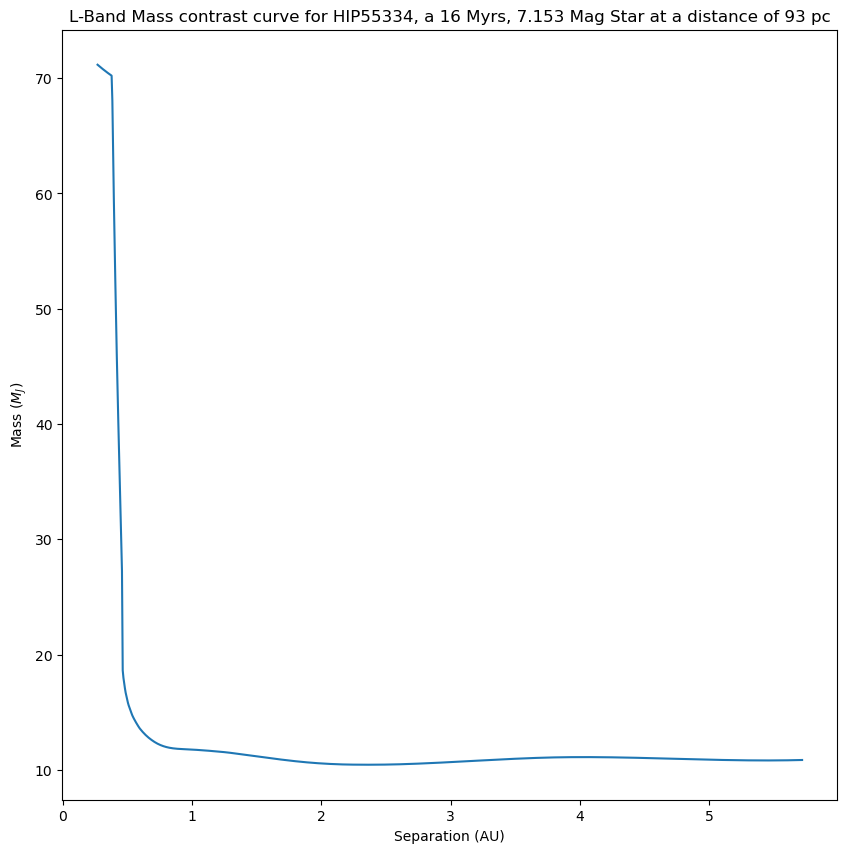

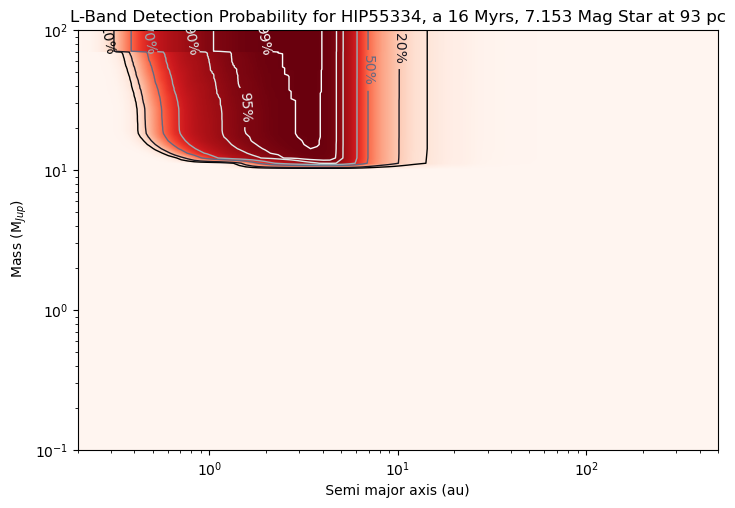

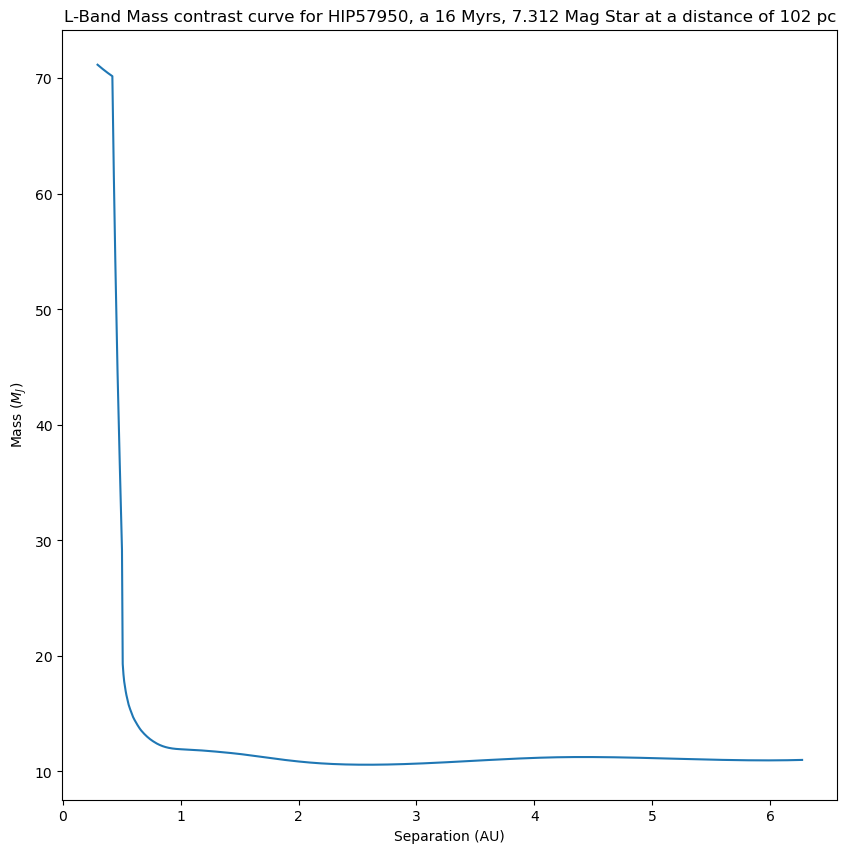

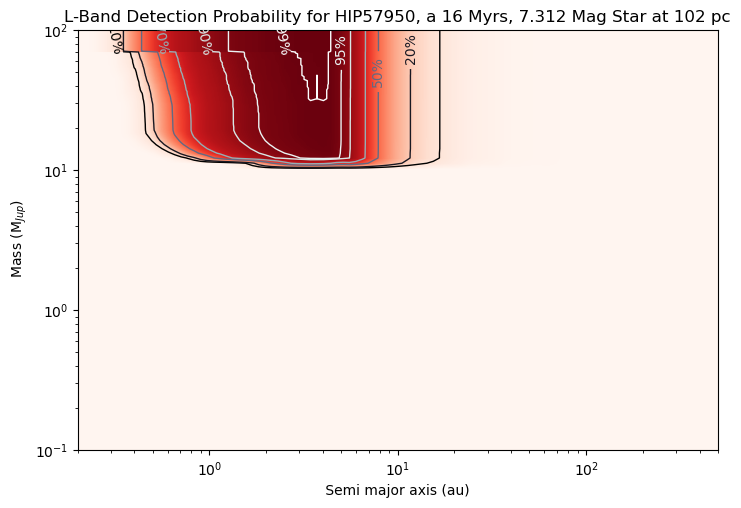

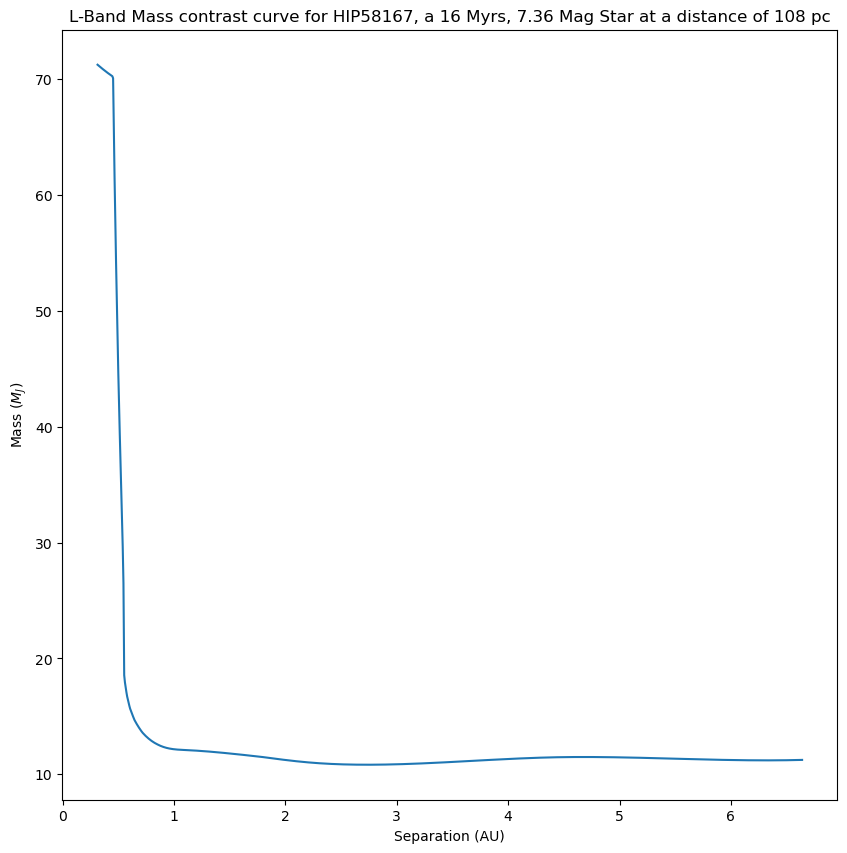

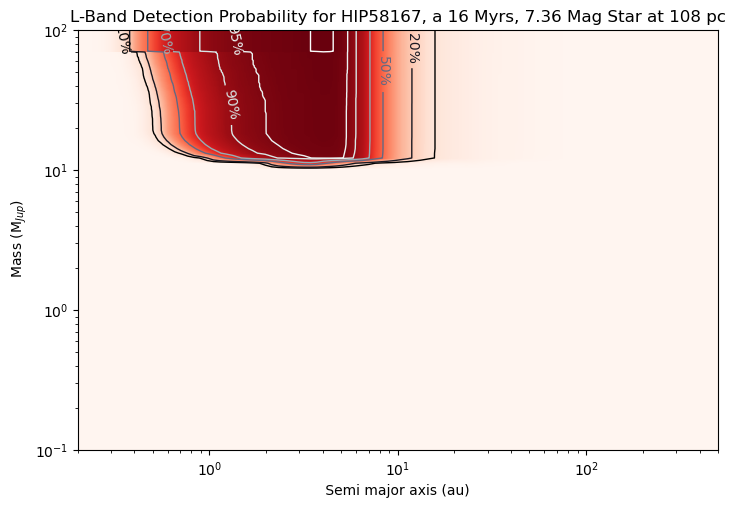

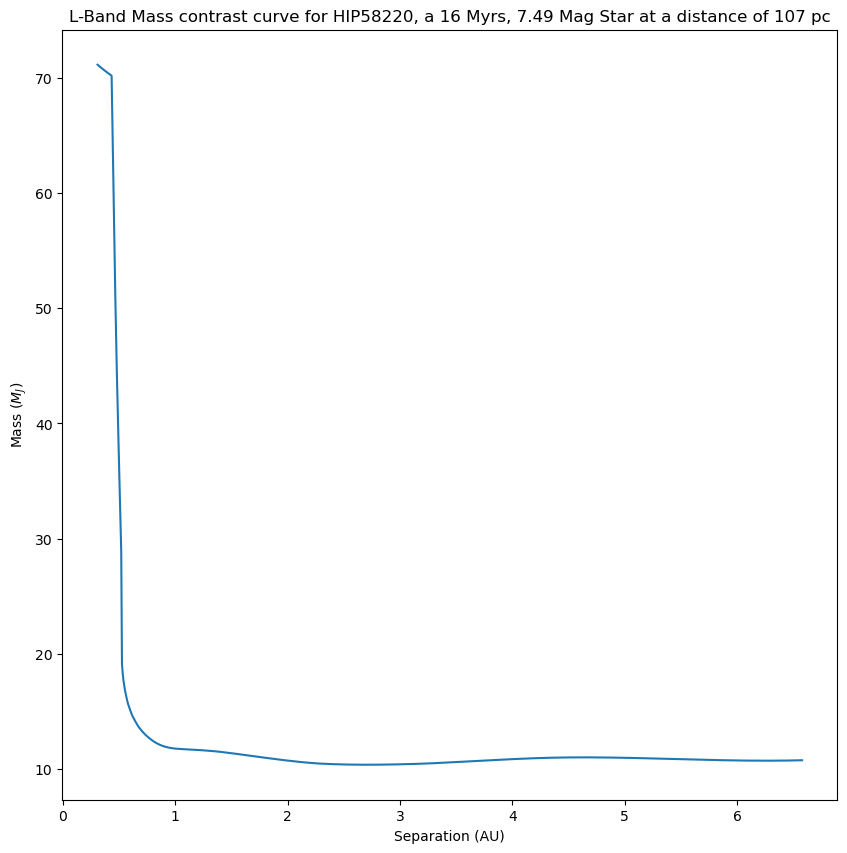

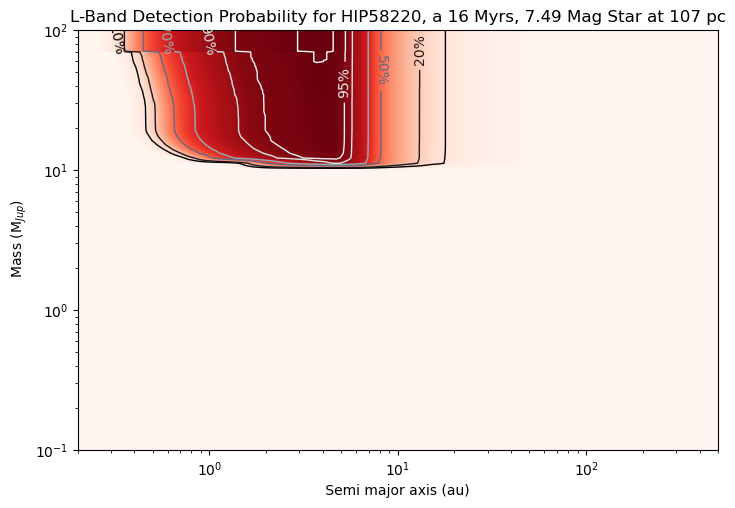

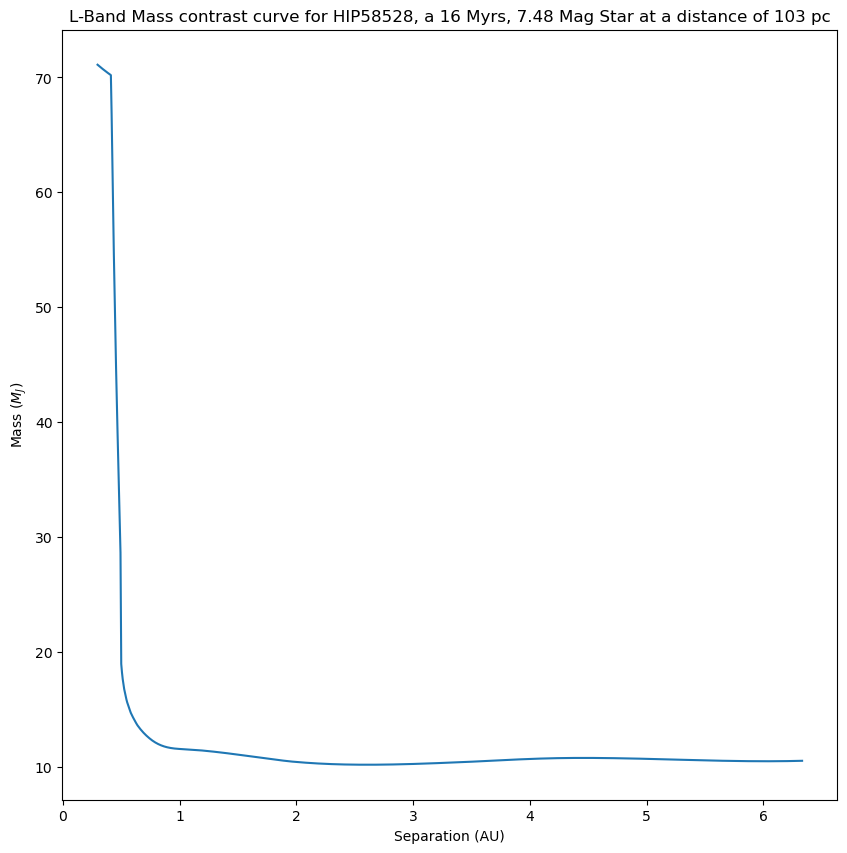

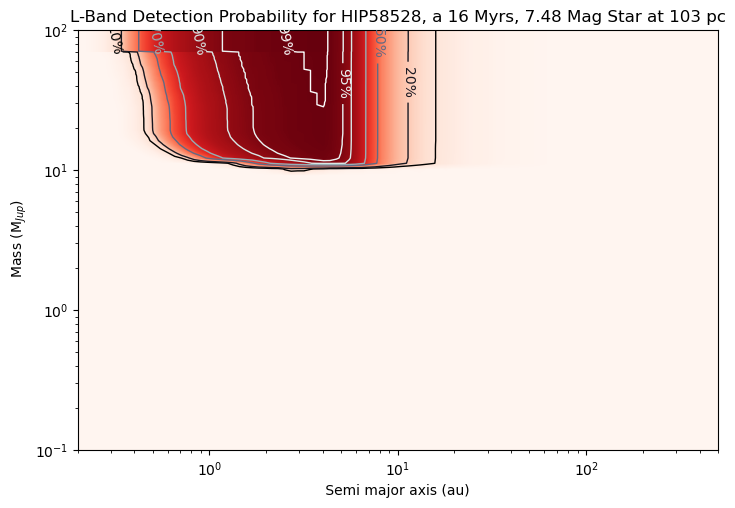

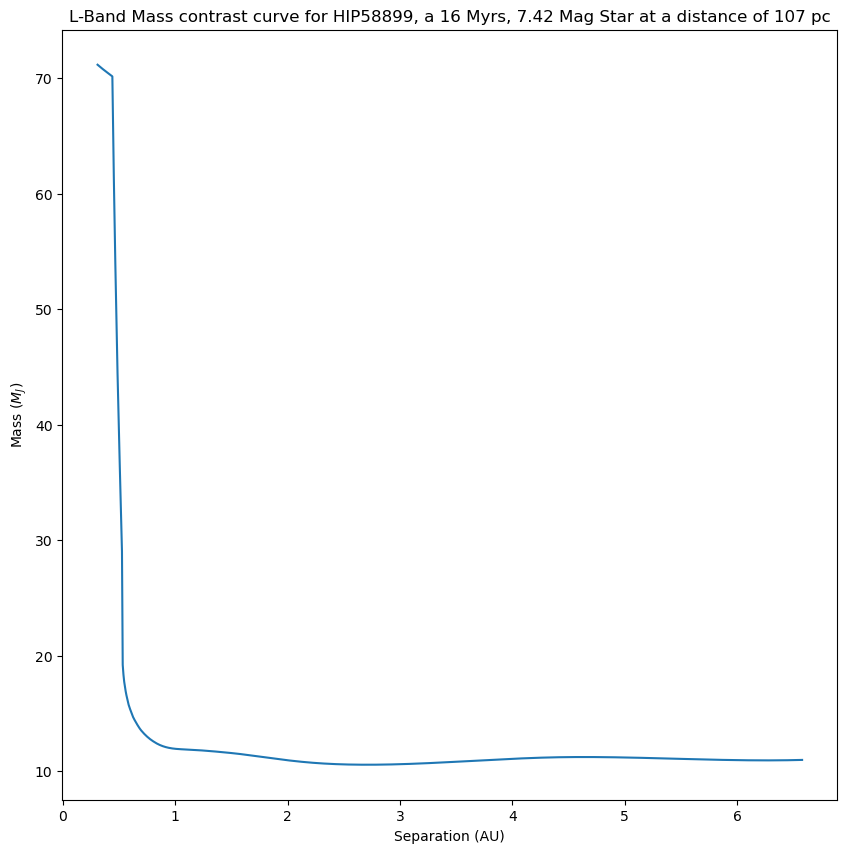

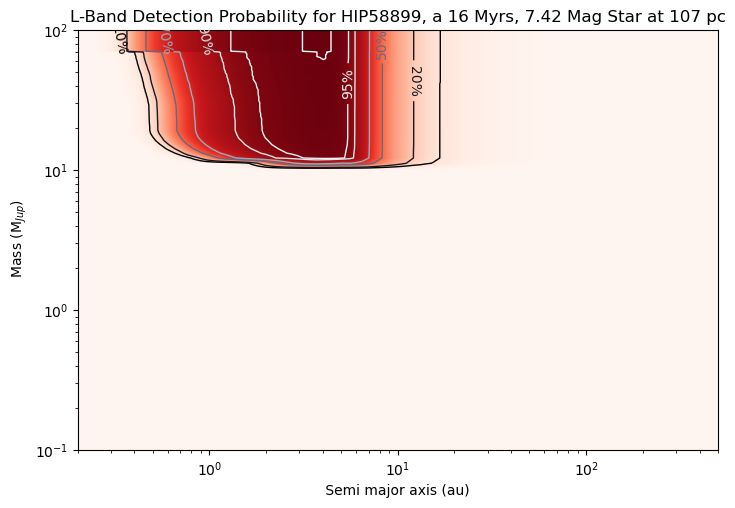

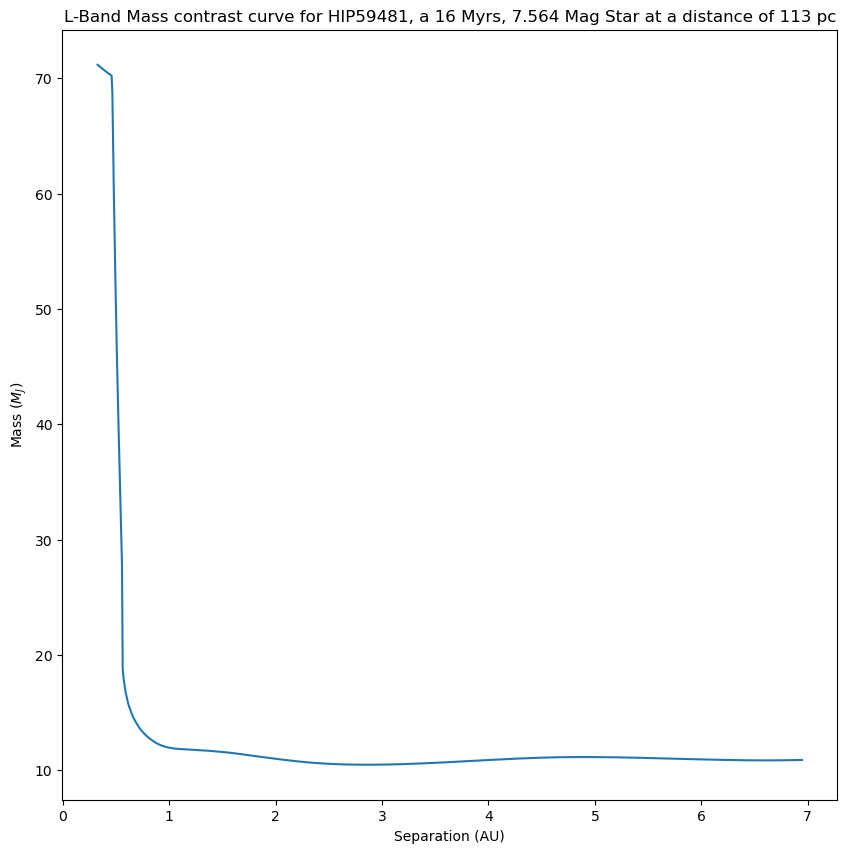

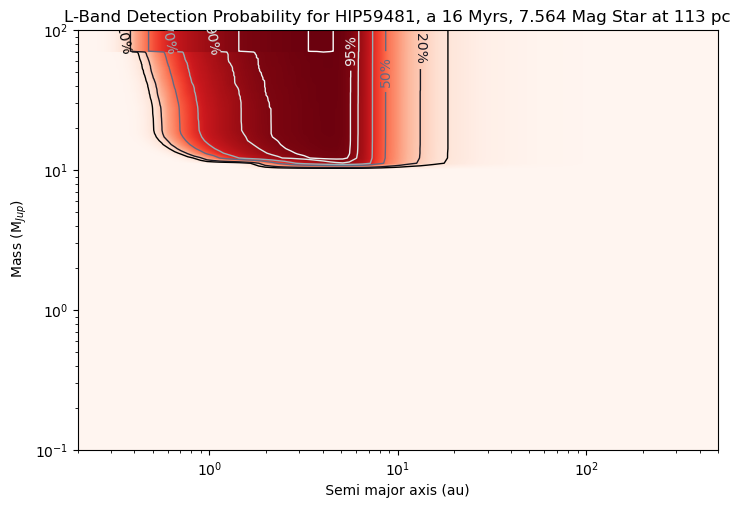

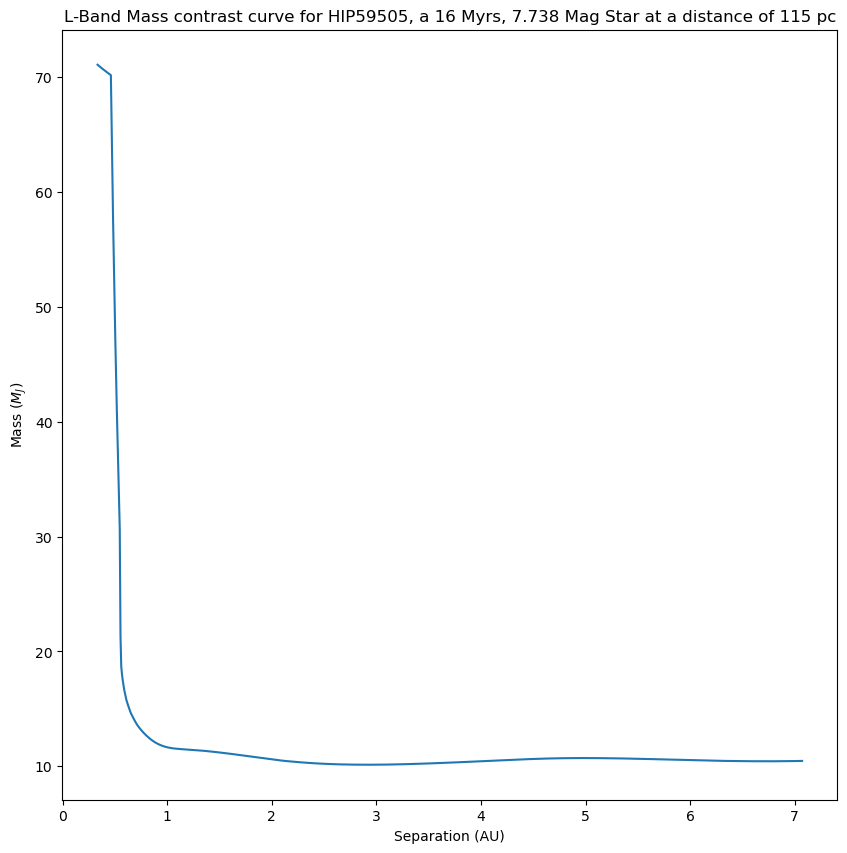

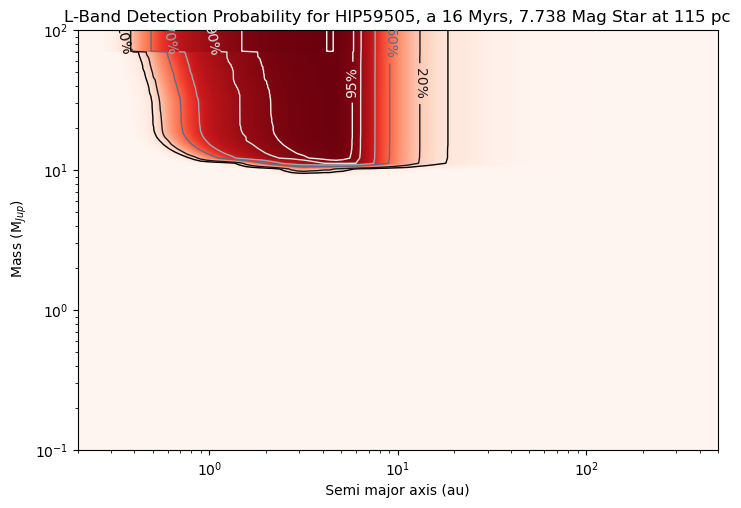

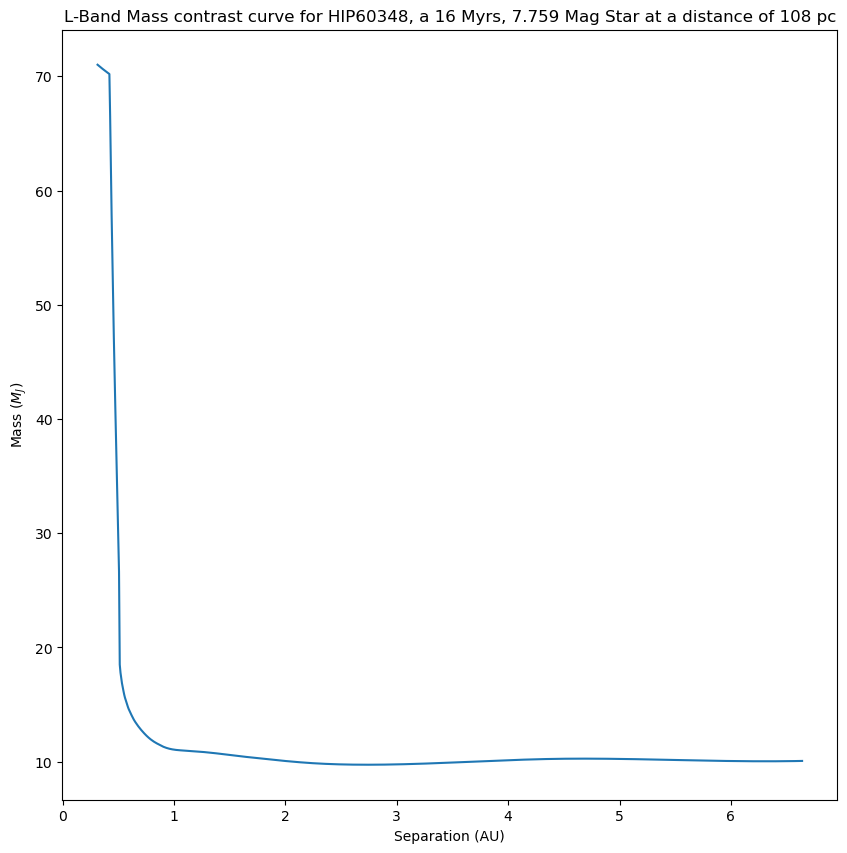

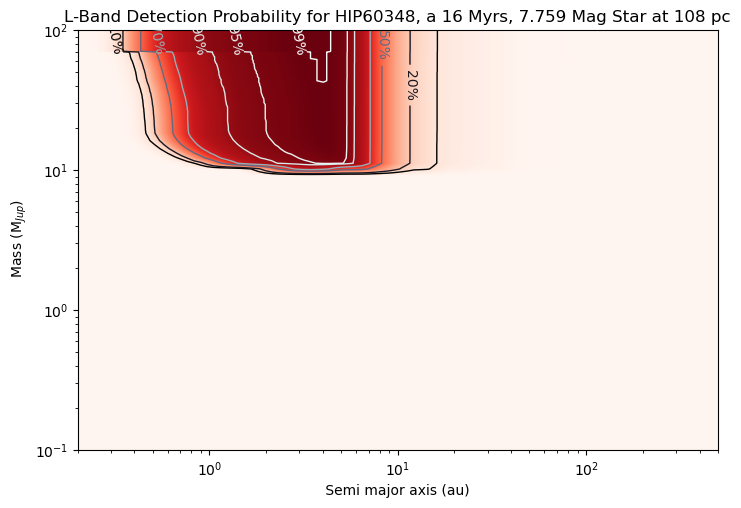

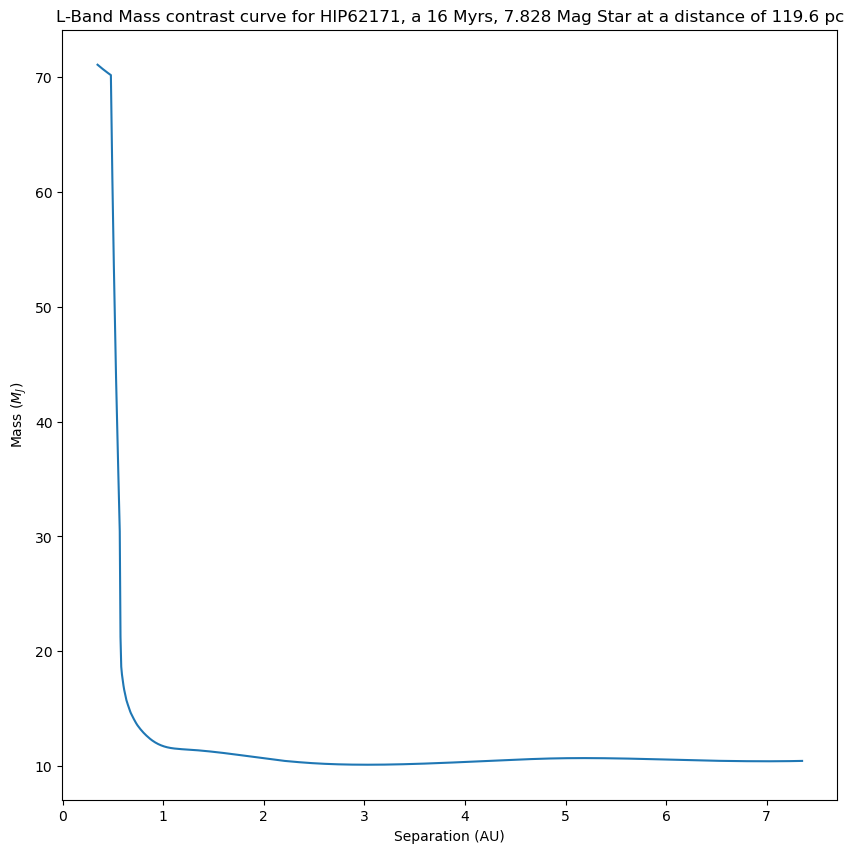

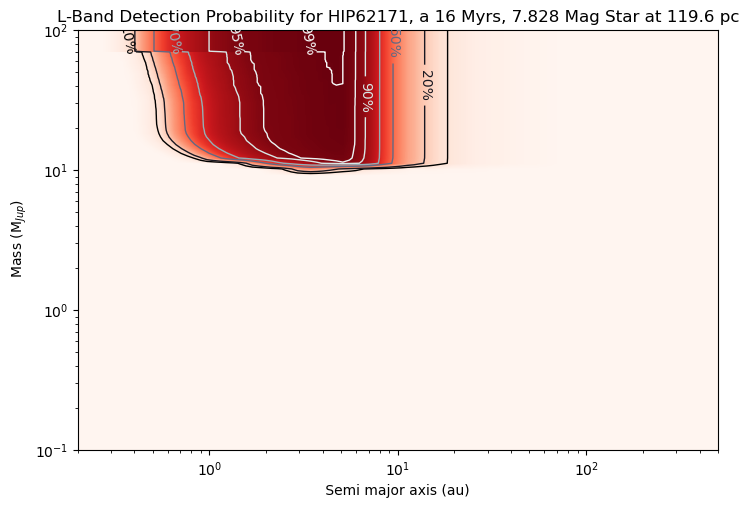

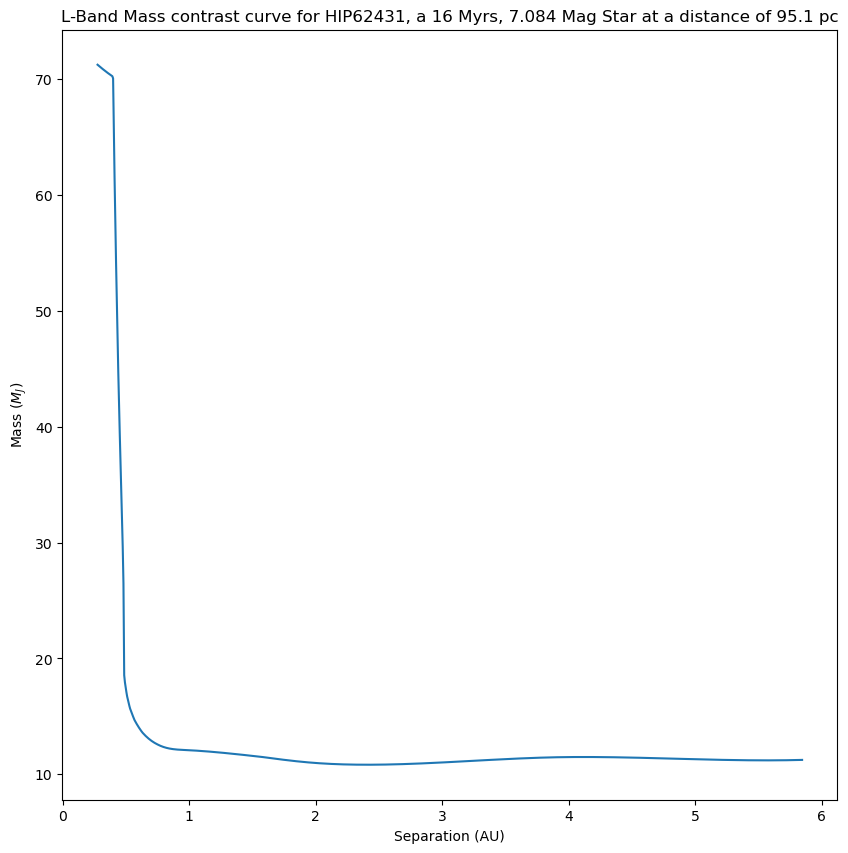

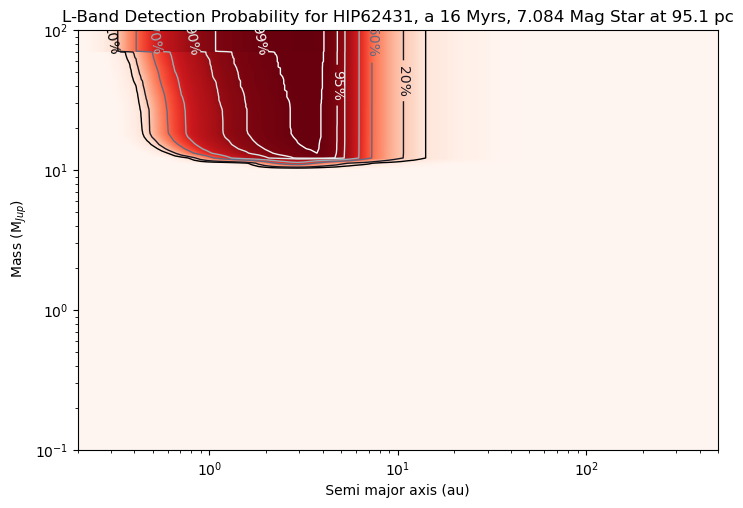

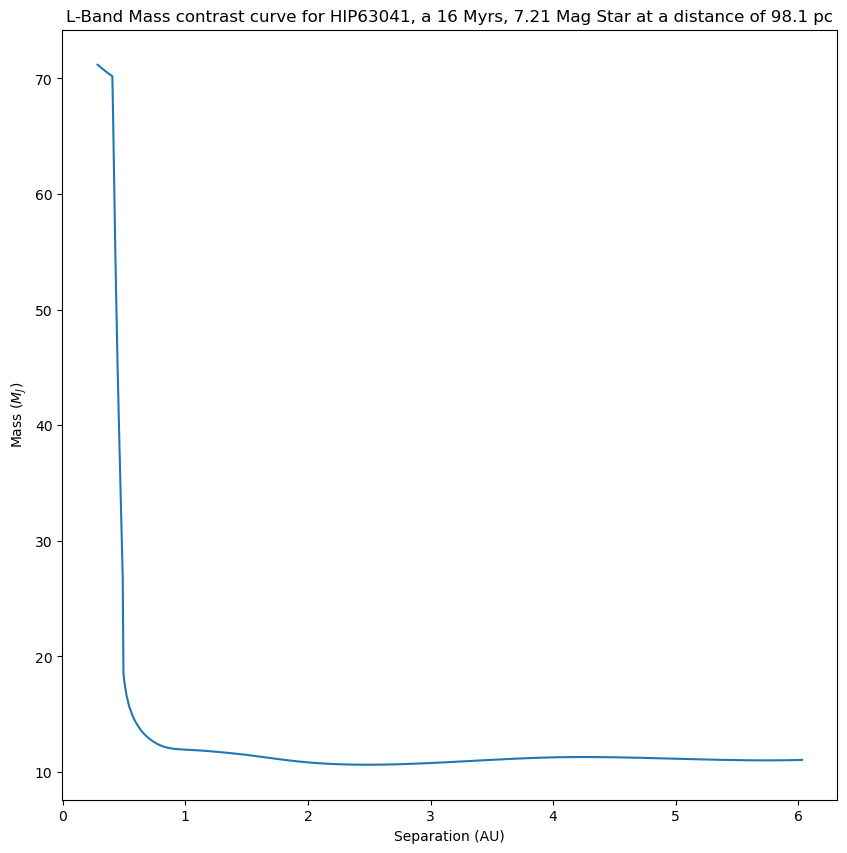

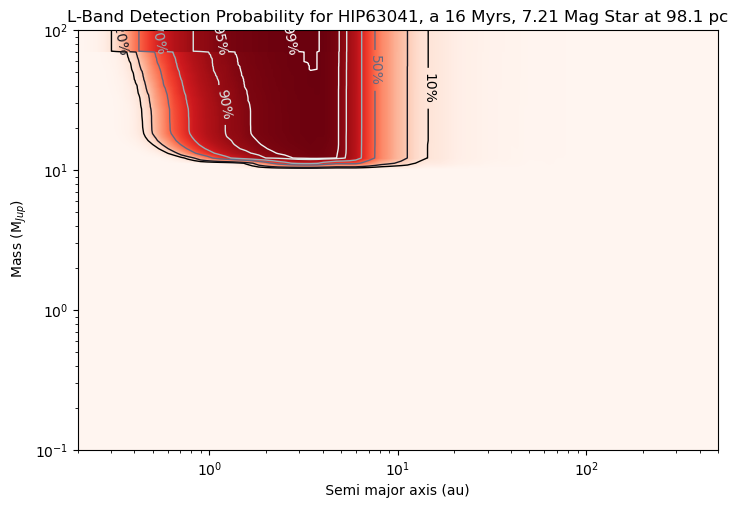

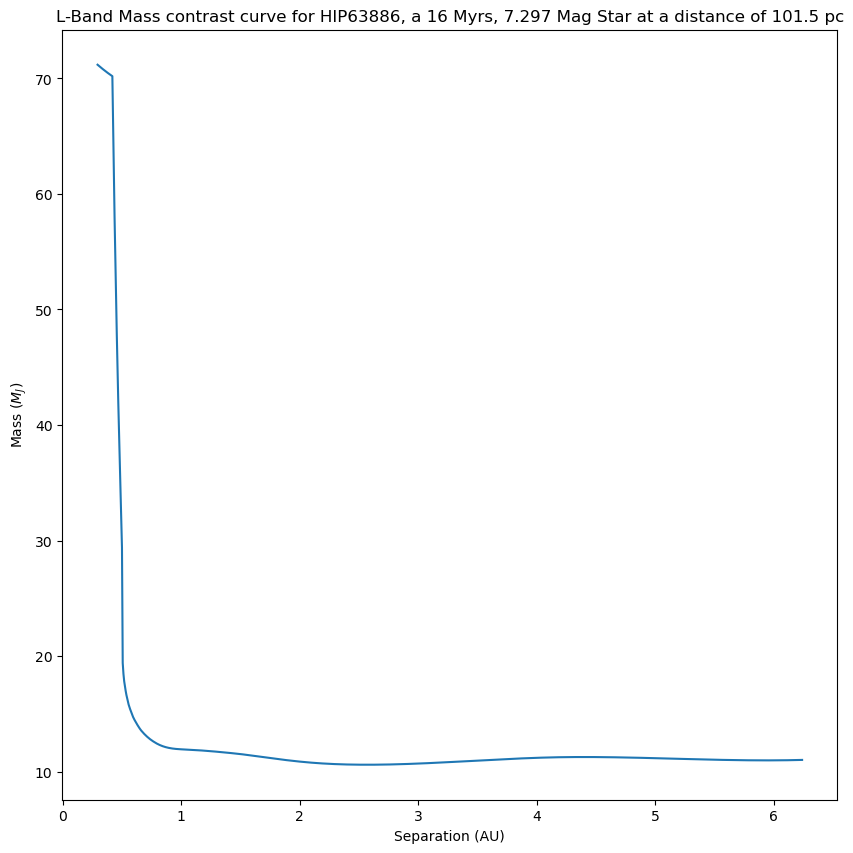

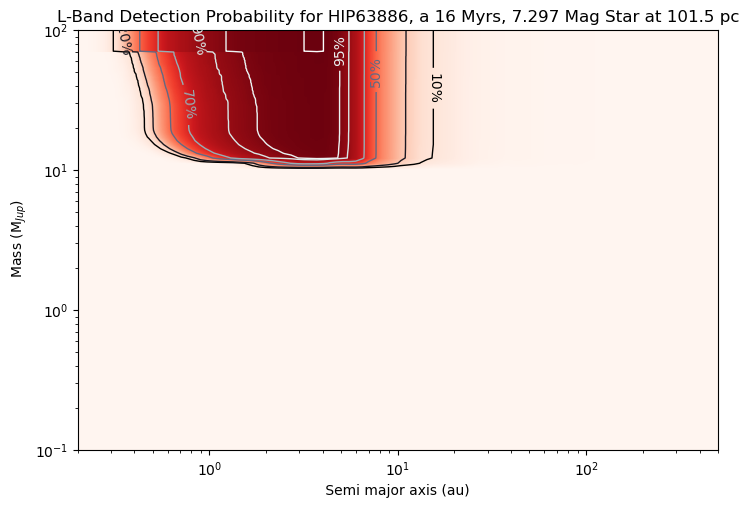

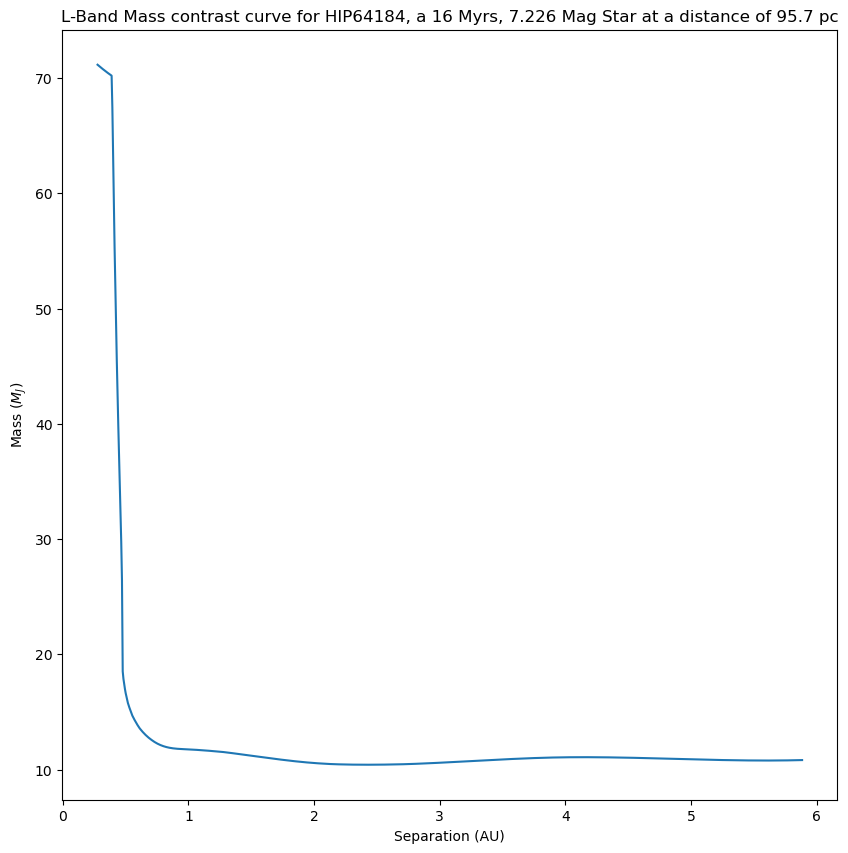

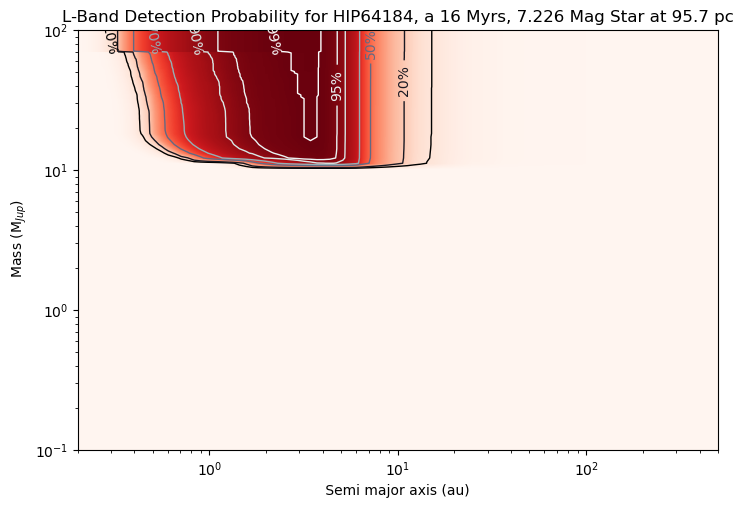

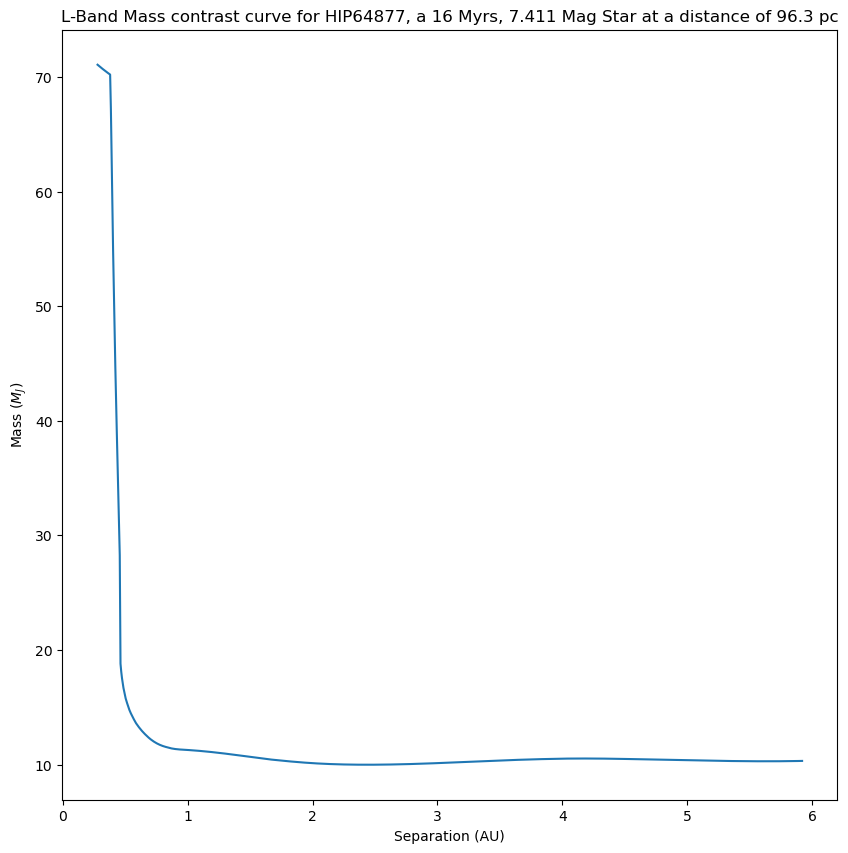

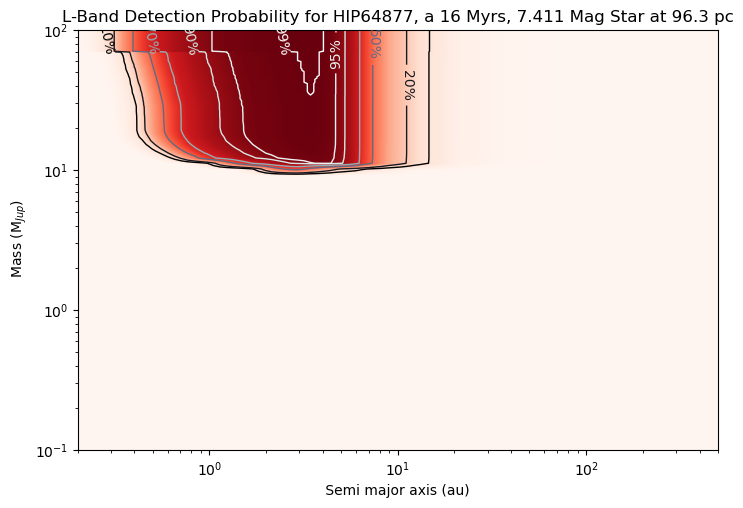

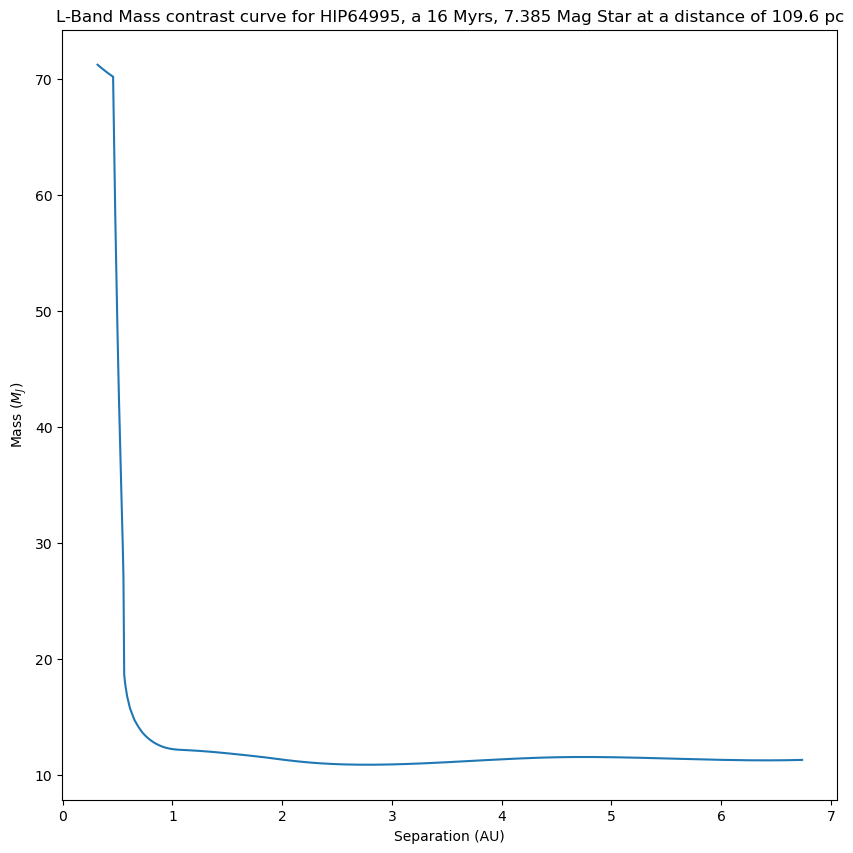

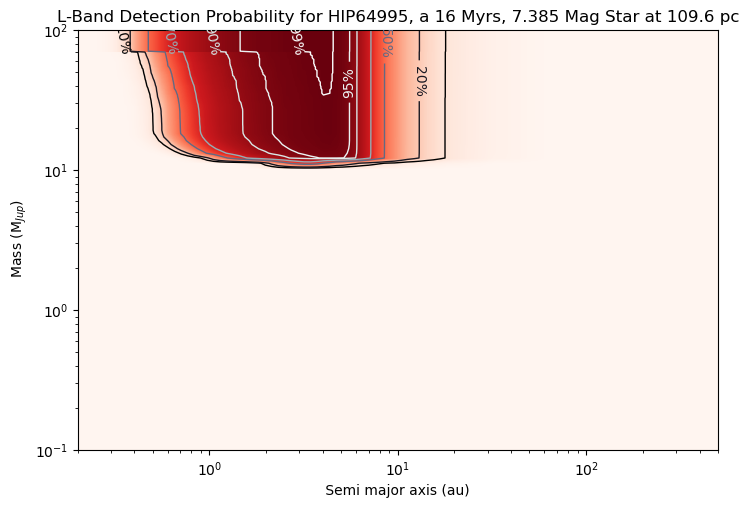

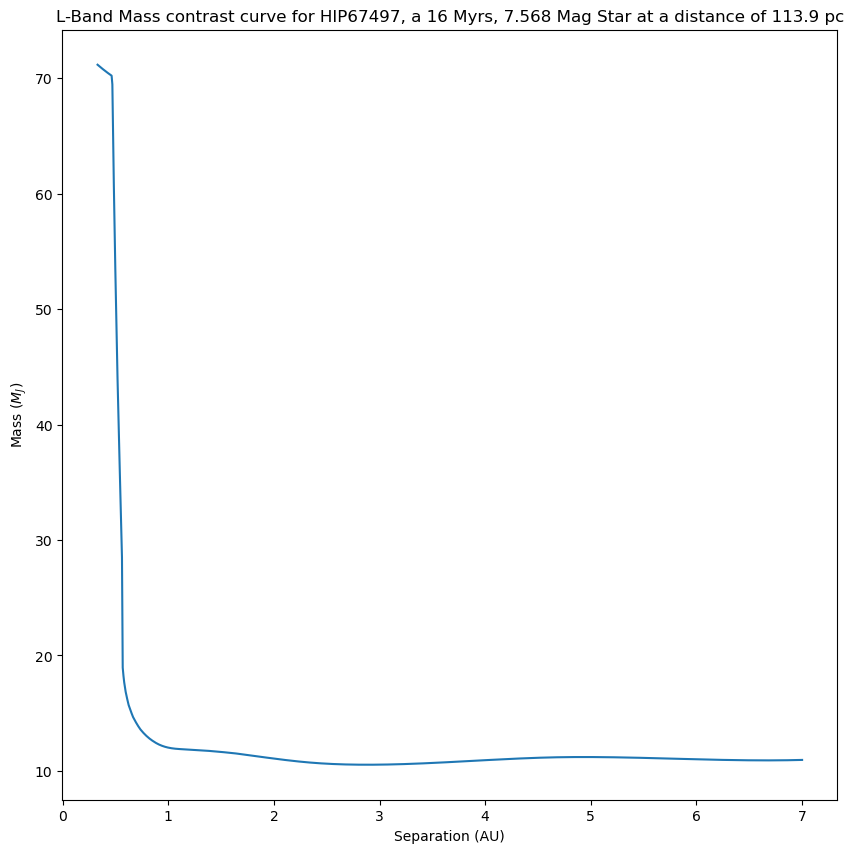

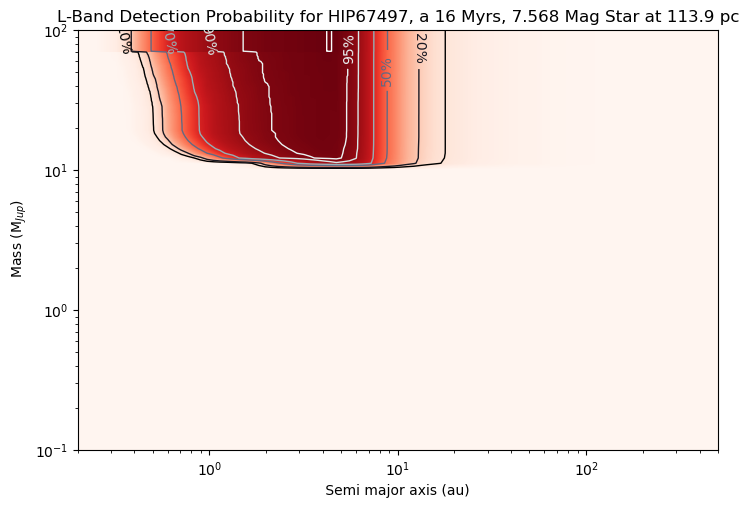

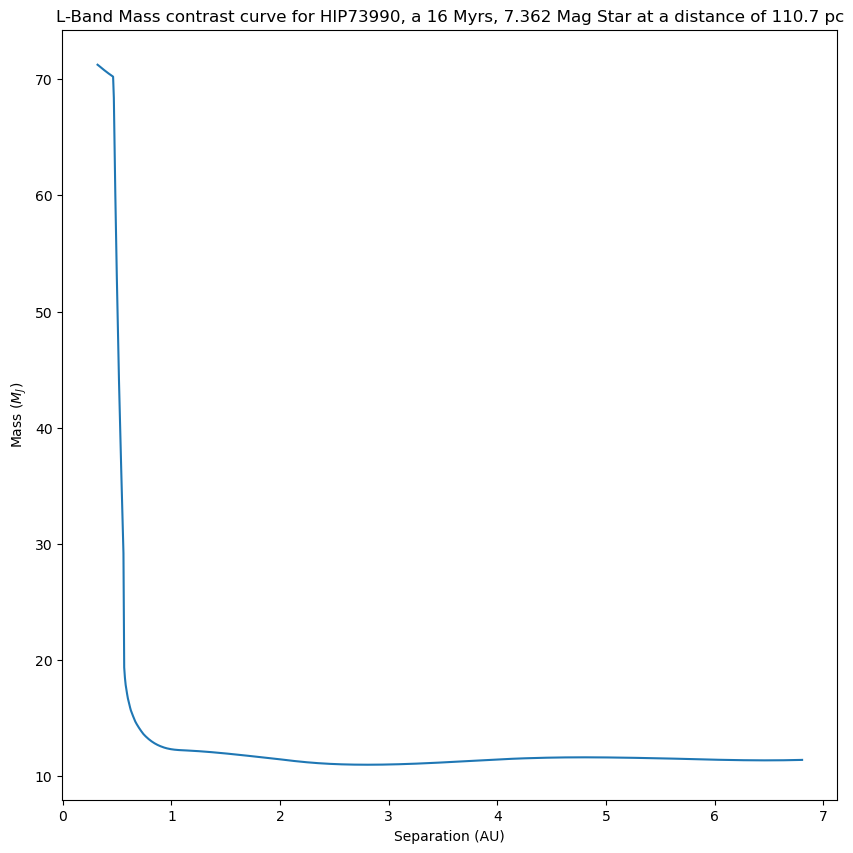

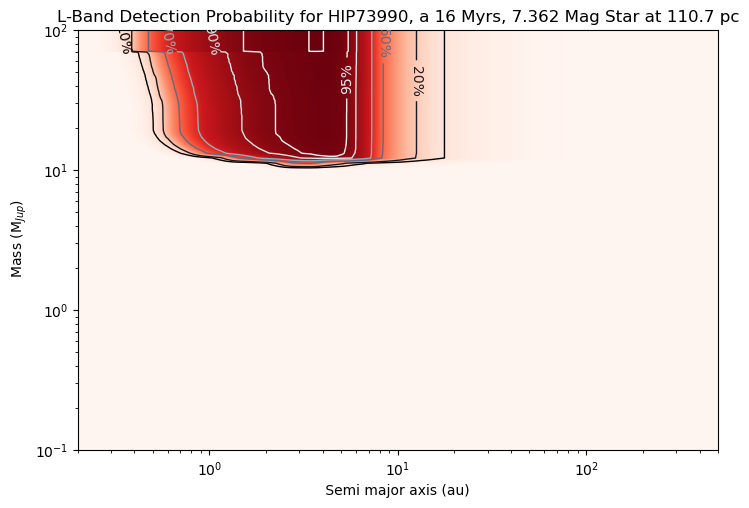

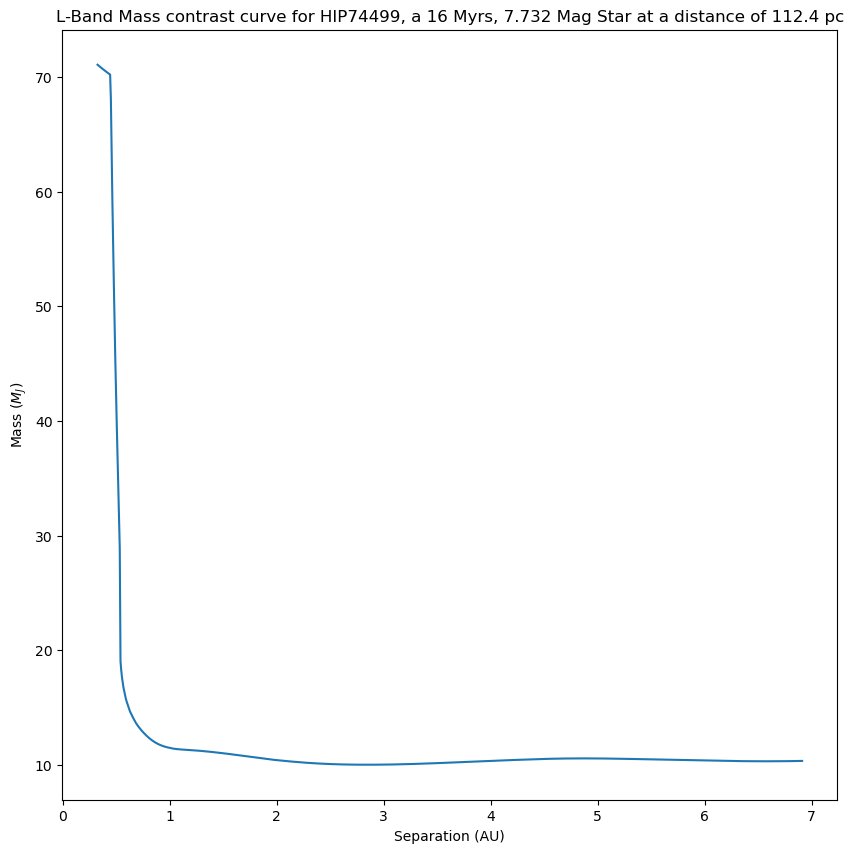

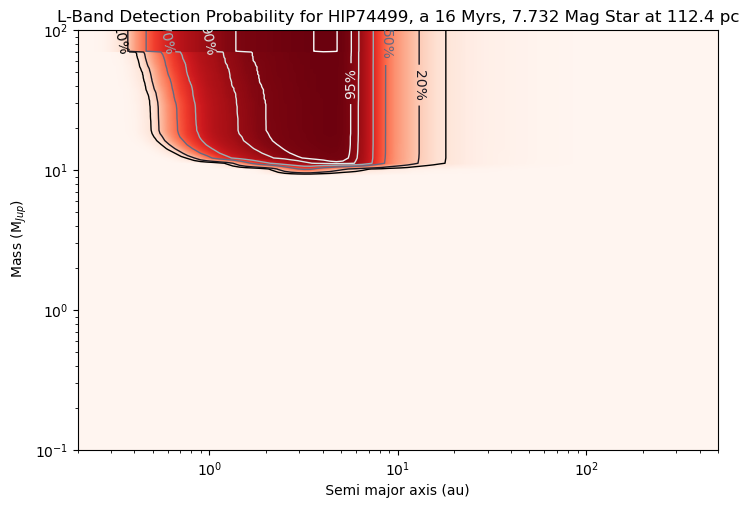

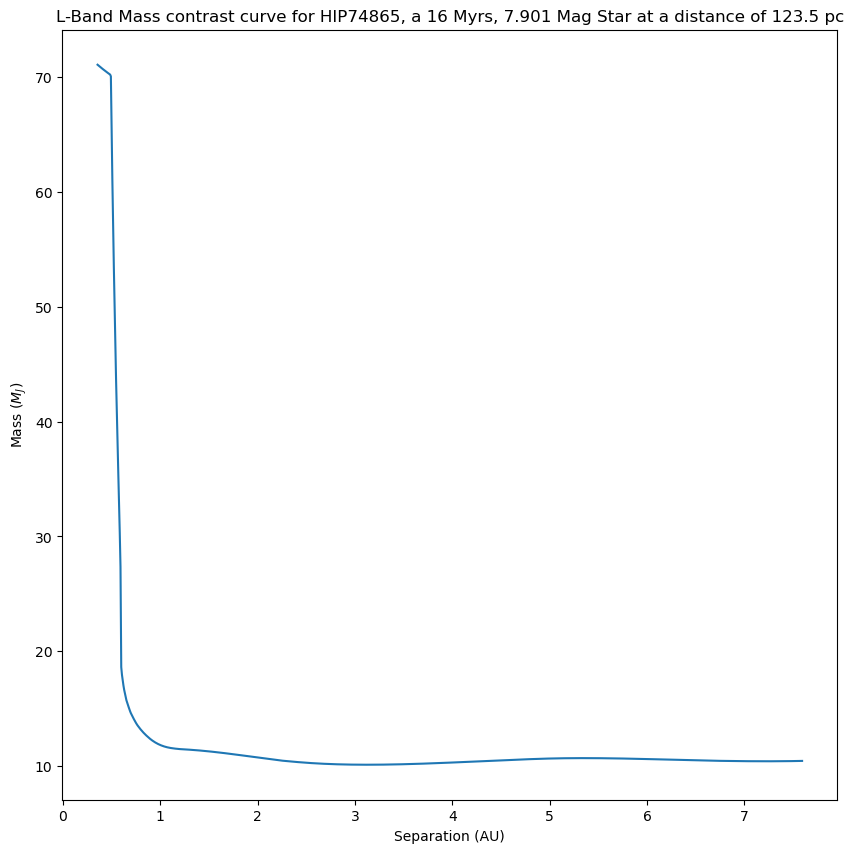

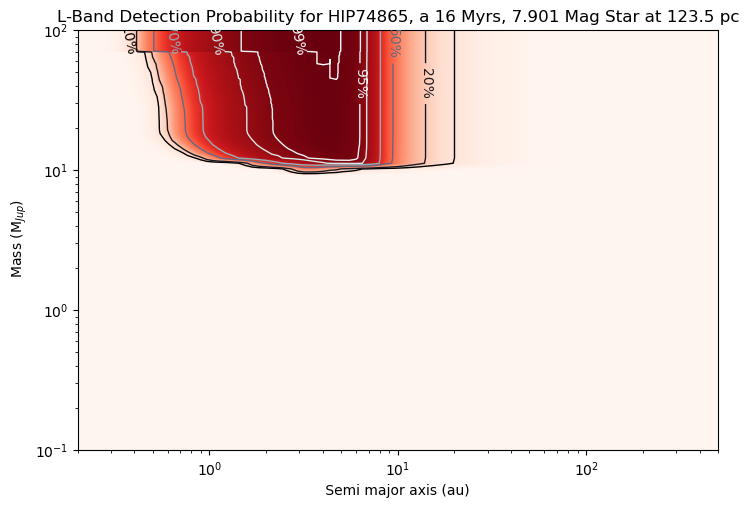

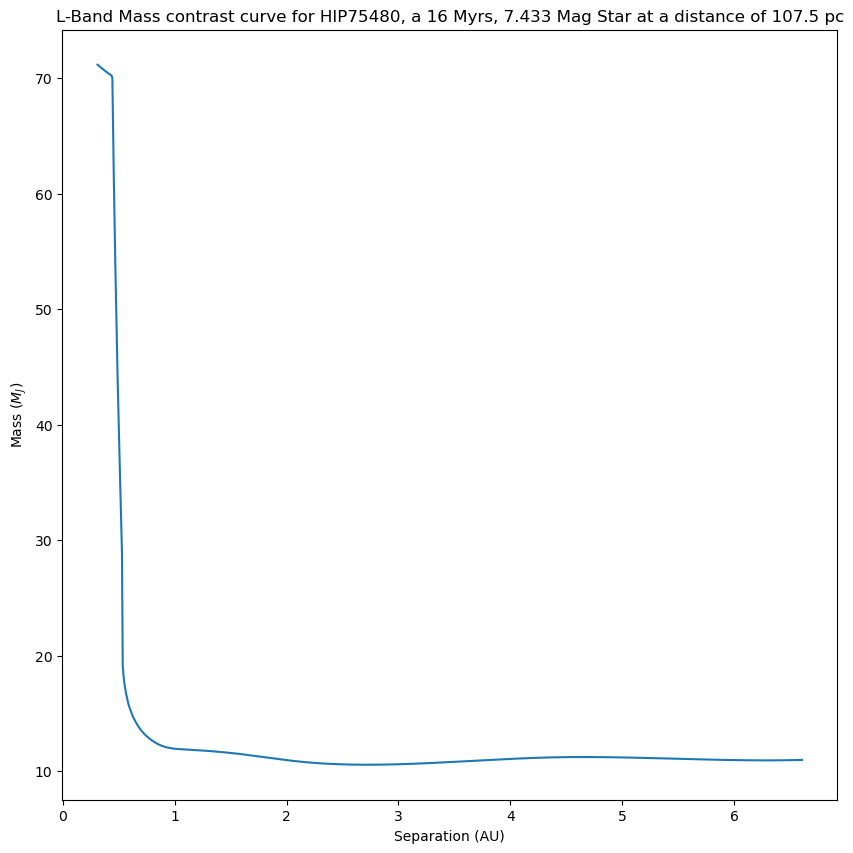

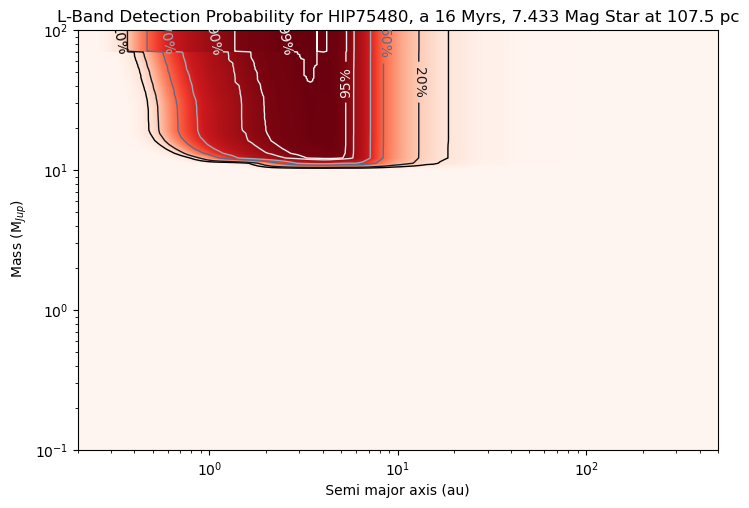

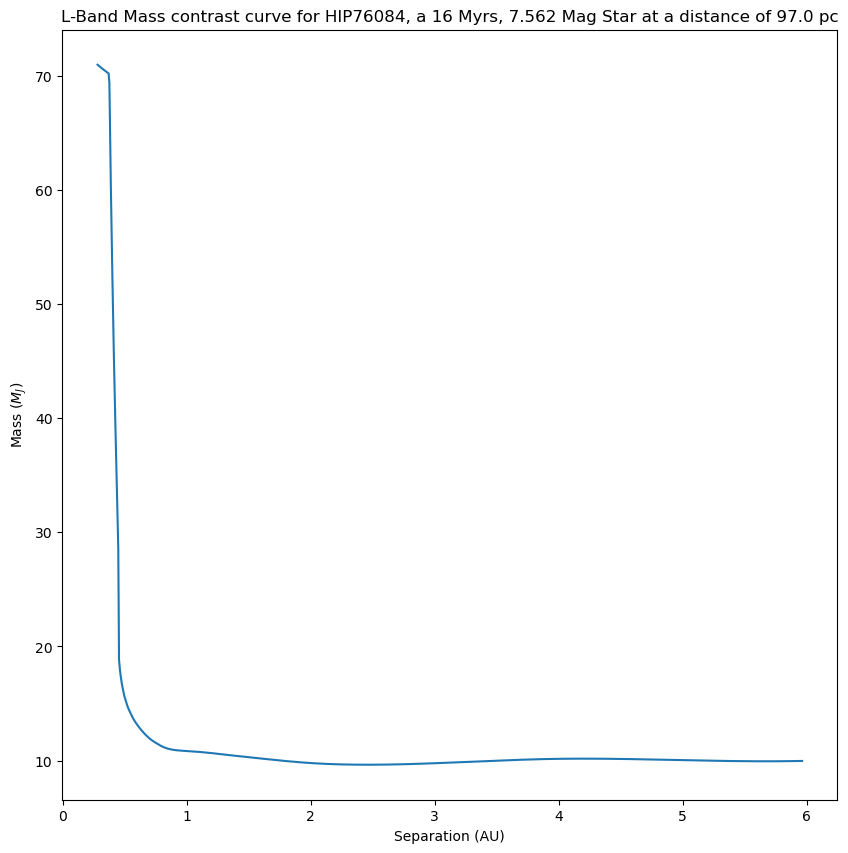

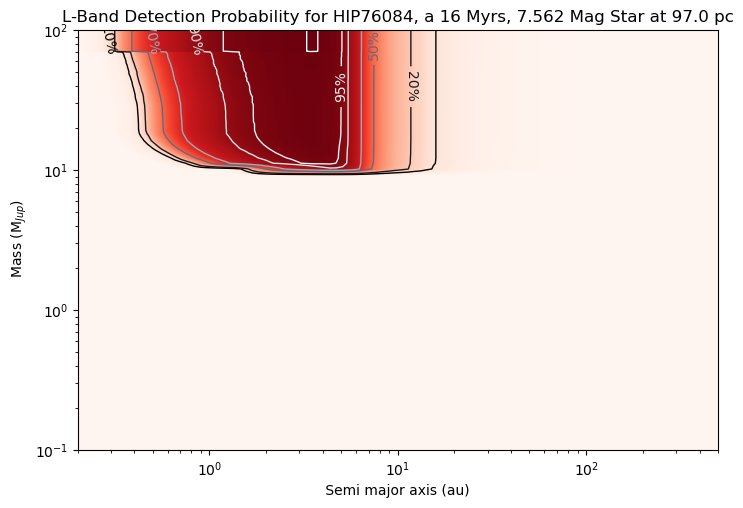

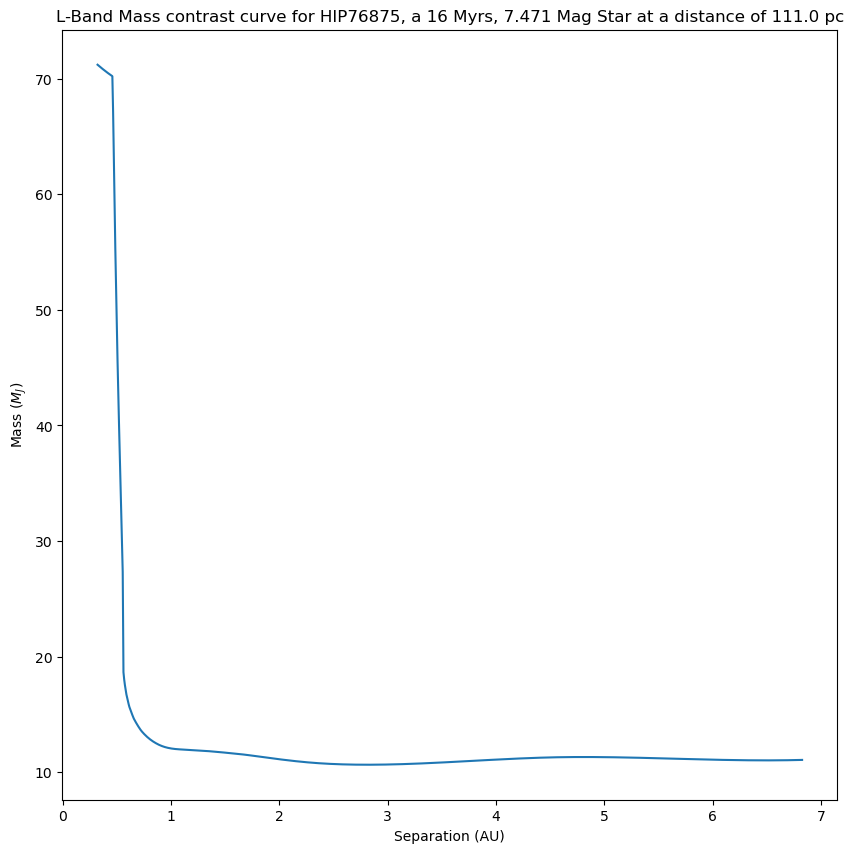

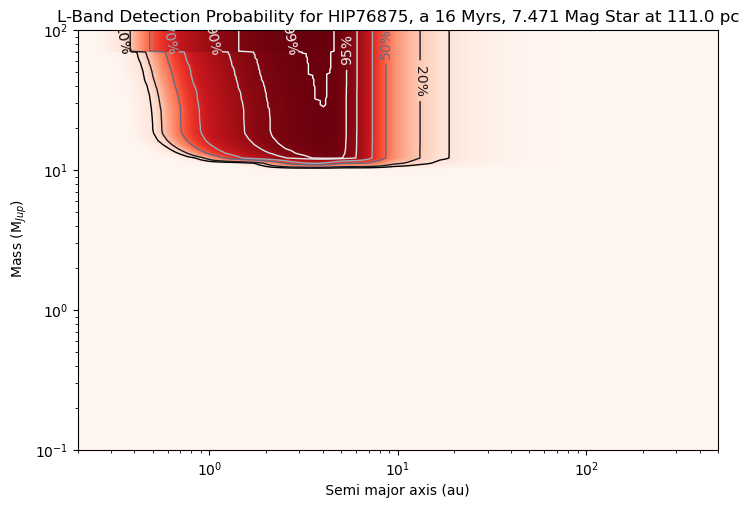

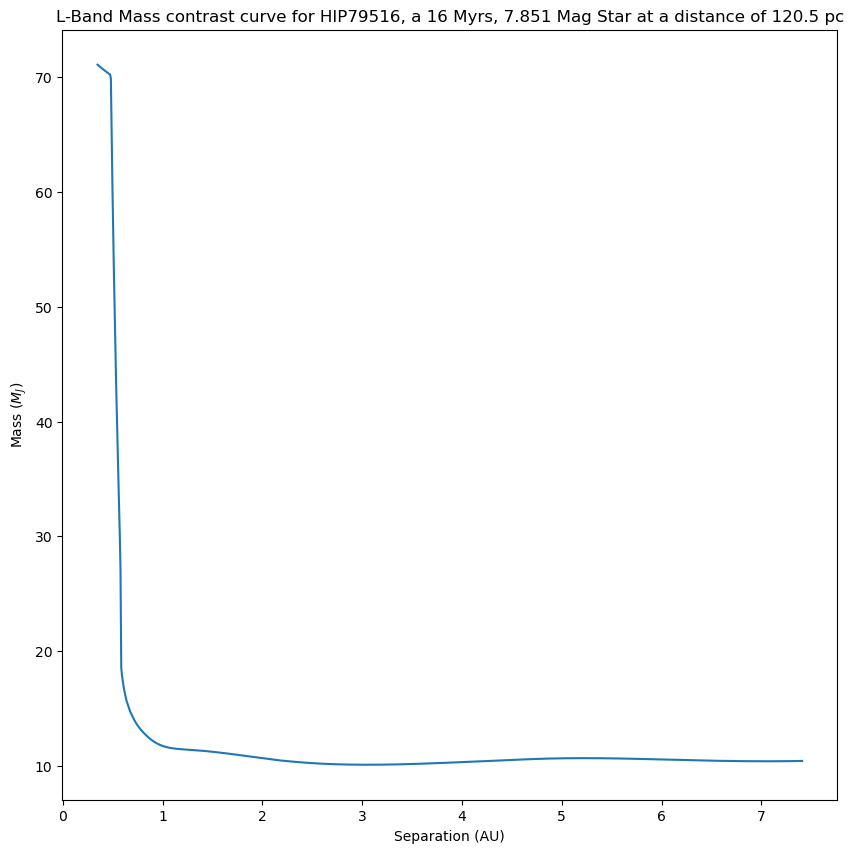

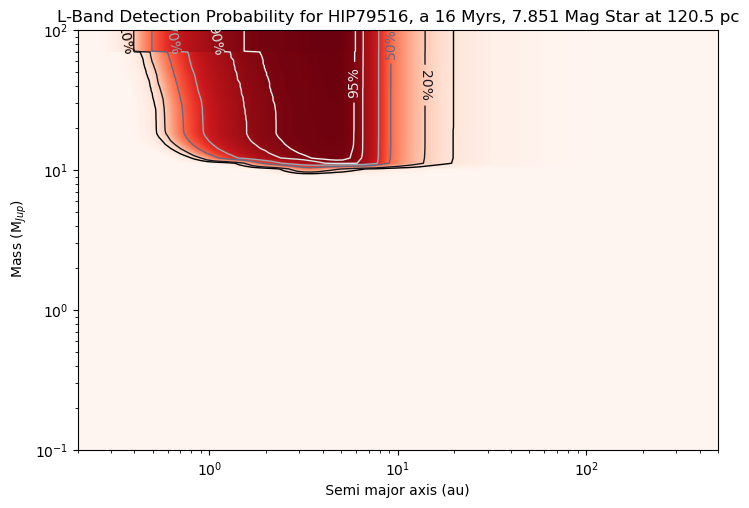

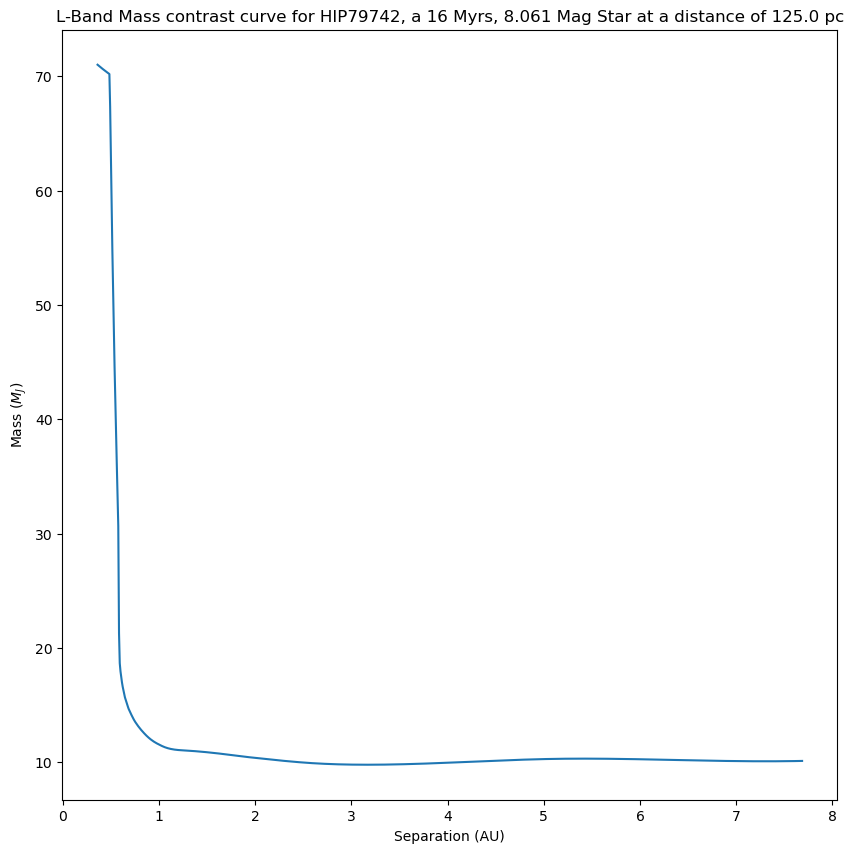

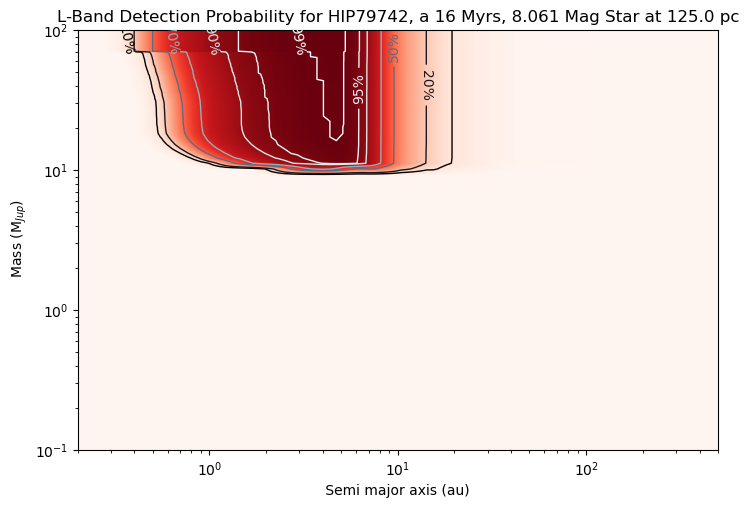

In [7]:
det.plot(model, model_tag, foldername, file_list, file_mag_list, distance, age, stellar_mag_list, filter_name_list, band_list, savefolder, star_list = star_list, xmin = 0.2, xmax = 500, logx = True, interpolate = False, custom = True)

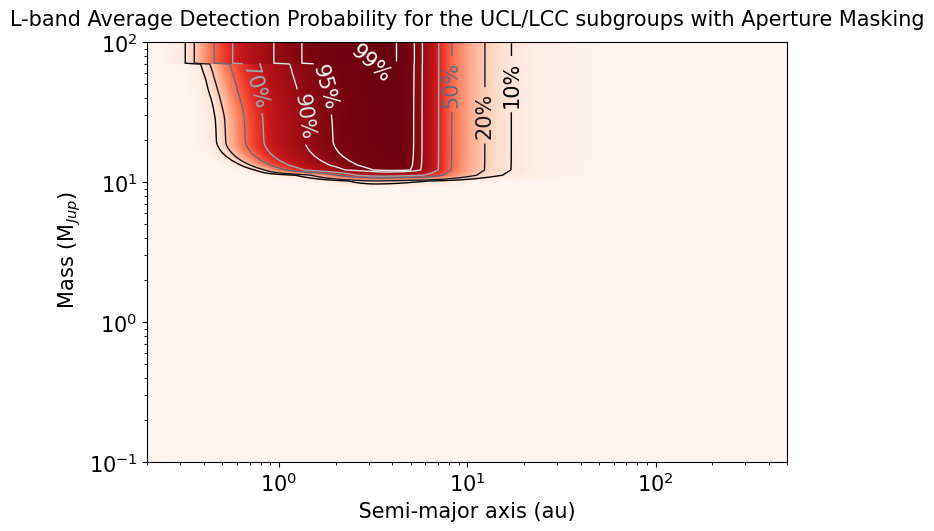

In [14]:
d = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/UCL-LCC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
map = d/len(star_list)

savefilename = 'average_mask_UCL_LCC_MKO_Lp_band'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(20,50),(13,30),(10,50),(0.8,50),(1.5,30),(2,50),(3,40)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('L-band Average Detection Probability for the UCL/LCC subgroups with Aperture Masking', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

In [15]:
data = np.loadtxt("eltmasking_limits.sm")
file_list = np.zeros(shape = [25, len(data[:,0]), 2])
for i in range(len(file_list[:,0,0])):
    file_list[i,:,0] = data[:,1] * 0.001
    file_list[i,:,1] = 10 ** (-data[:,3]/2.5)
model = 'atmo'
model_tag = 'atmo-ceq'
foldername = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2023/exeter/fits'
file_mag_list = [7,7.5,8]
stellar_mag_list = [7.153, 
                    7.312,
                    7.36,
                    7.490,
                    7.48,
                    7.42,
                    7.564,
                    7.738,
                    7.759,
                    7.828,
                    7.084,
                    7.21,
                    7.297,
                    7.226,
                    7.411,
                    7.385,
                    7.568,
                    7.362,
                    7.732,
                    7.901,
                    7.433,
                    7.562,
                    7.471,
                    7.851,
                    8.061]
star_list = ['HIP55334',
             'HIP57950',
             'HIP58167',
             'HIP58220',
             'HIP58528',
             'HIP58899',
             'HIP59481',
             'HIP59505',
             'HIP60348',
             'HIP62171',
             'HIP62431',
             'HIP63041',
             'HIP63886',
             'HIP64184',
             'HIP64877',
             'HIP64995',
             'HIP67497',
             'HIP73990',
             'HIP74499',
             'HIP74865',
             'HIP75480',
             'HIP76084',
             'HIP76875',
             'HIP79516',
             'HIP79742',]
filter_name_list = ['MKO_Mp']*25
band_list = ['M']*25
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/UCL-LCC_M'
distance = [93,
102,
108,
107,
103,
107,
113,
115,
108,
119.6,
95.1,
98.1,
101.5,
95.7,
96.3,
109.6,
113.9,
110.7,
112.4,
123.5,
107.5,
97.0,
111.0,
120.5,
125.0]
age = [16]*25

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
M-Band Detection Probability for HIP55334, a 16 Myrs, 7.153 Mag Star at 93 pc time elapsed - 00:00:00.58
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
M-Band Detection Probability for HIP57950, a 16 Myrs, 7.312 Mag Star at 102 pc time elapsed - 00:00:00.58
The 'MKO_Mp' filter is found in the list of available fil

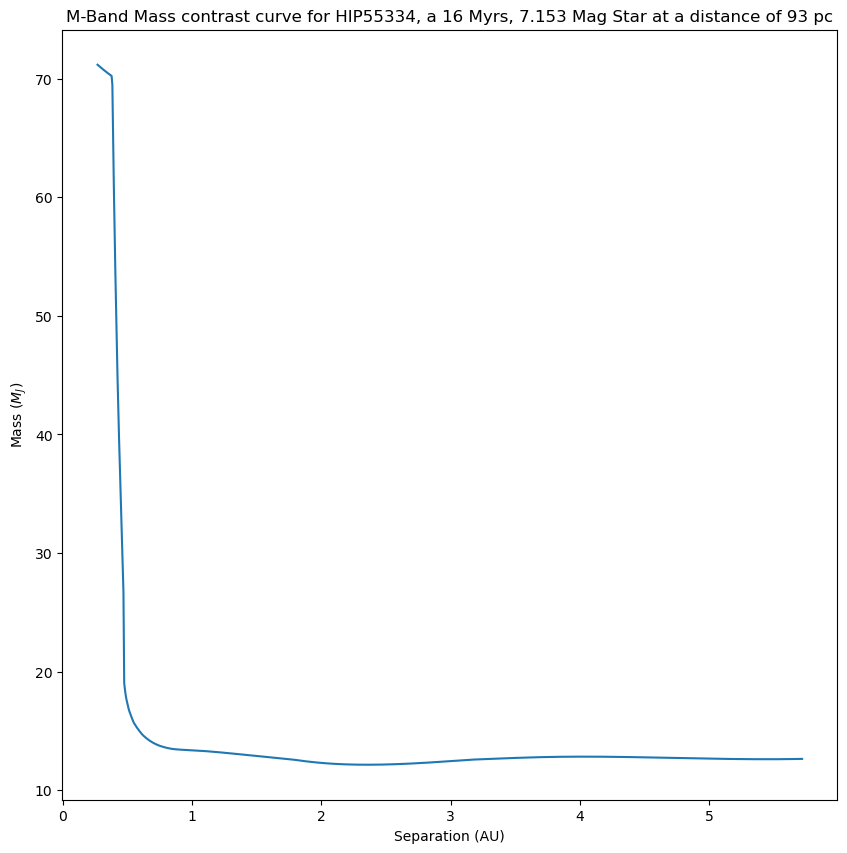

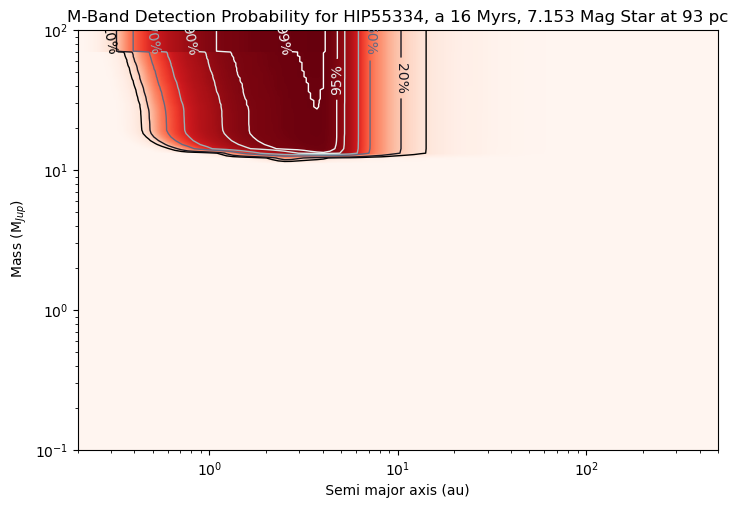

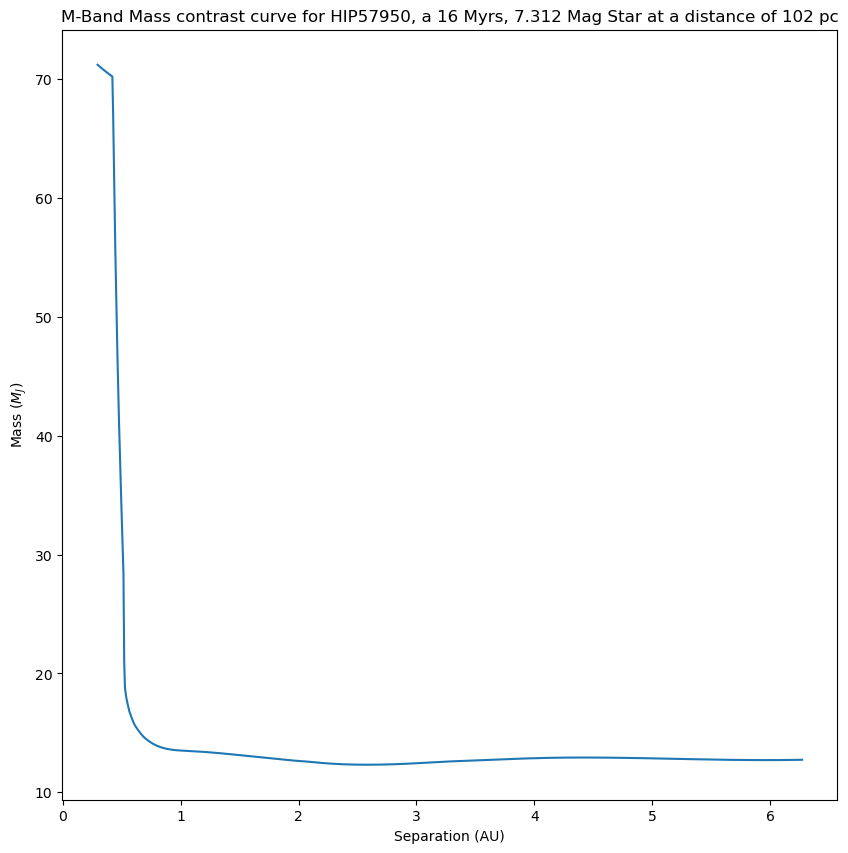

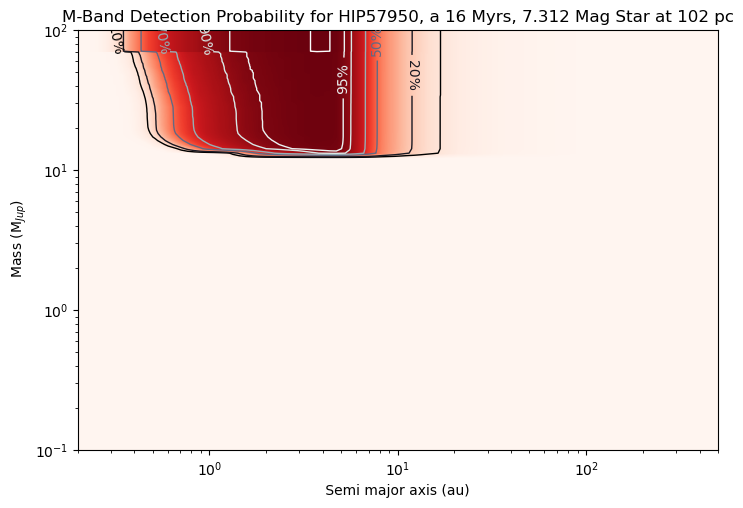

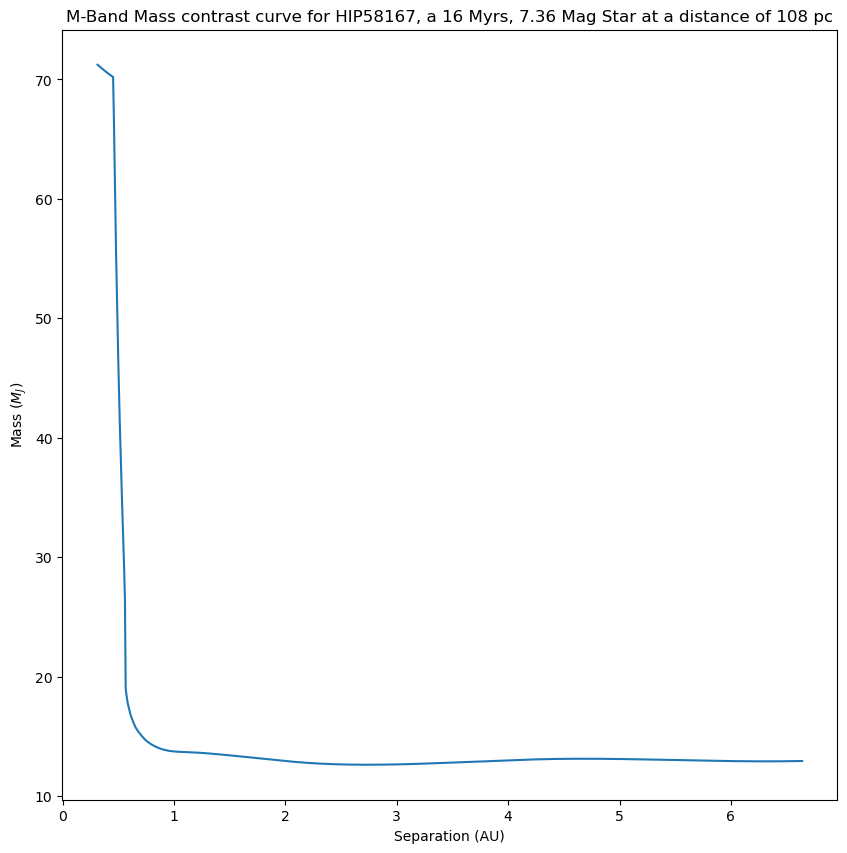

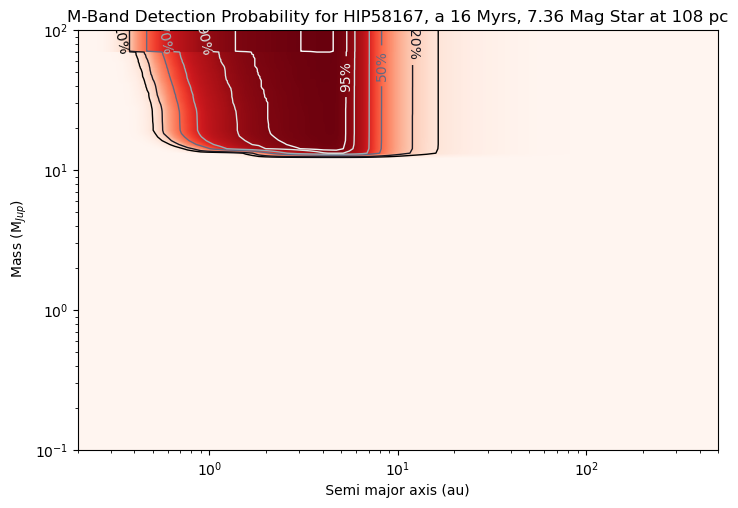

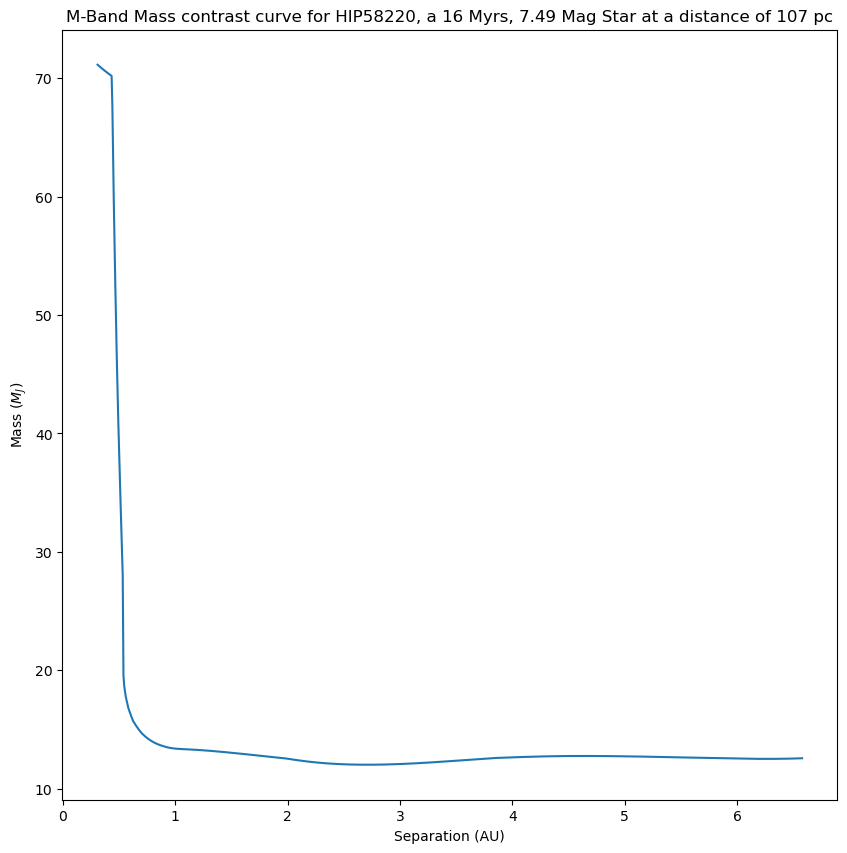

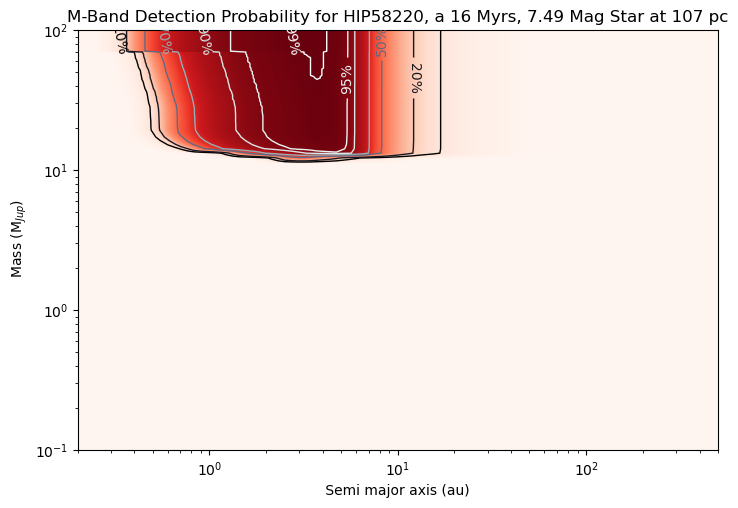

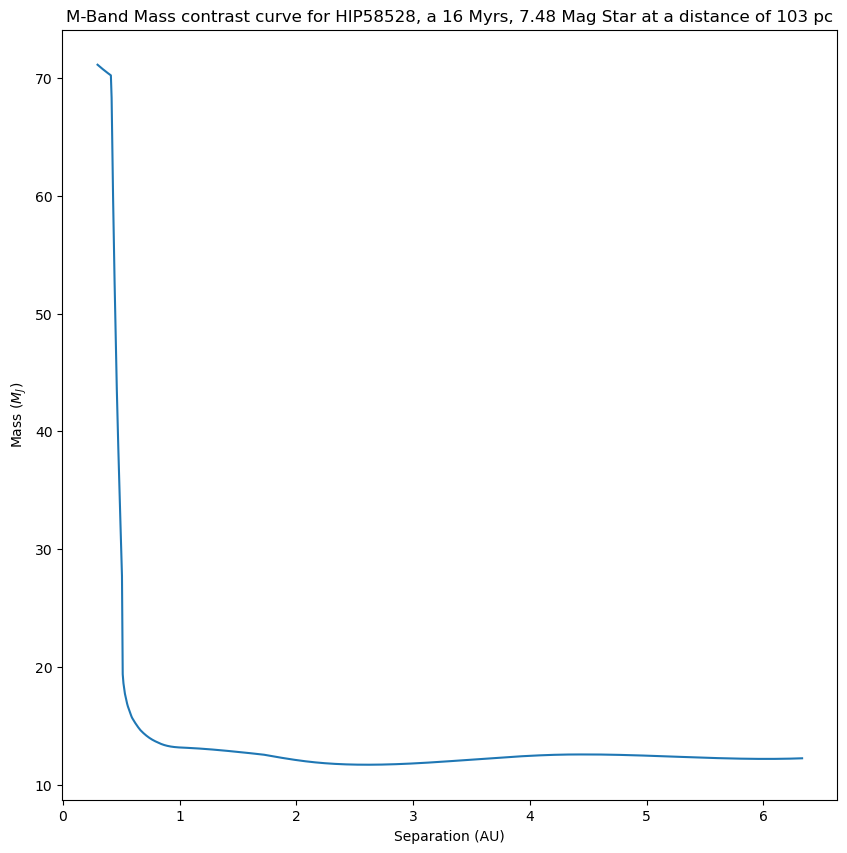

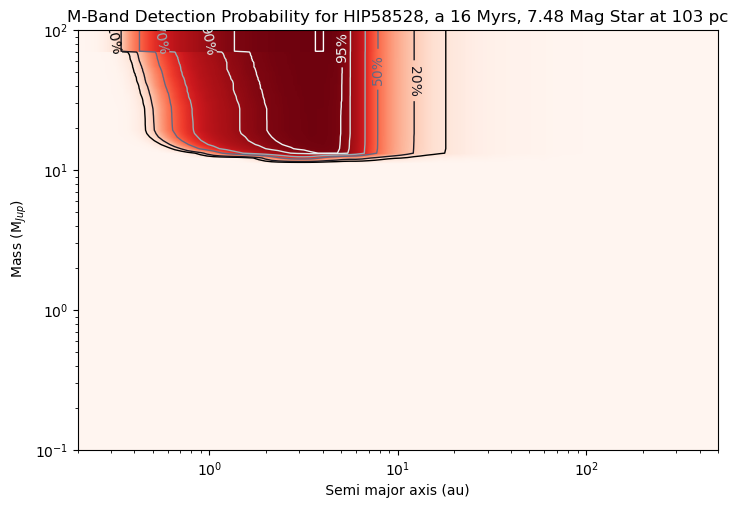

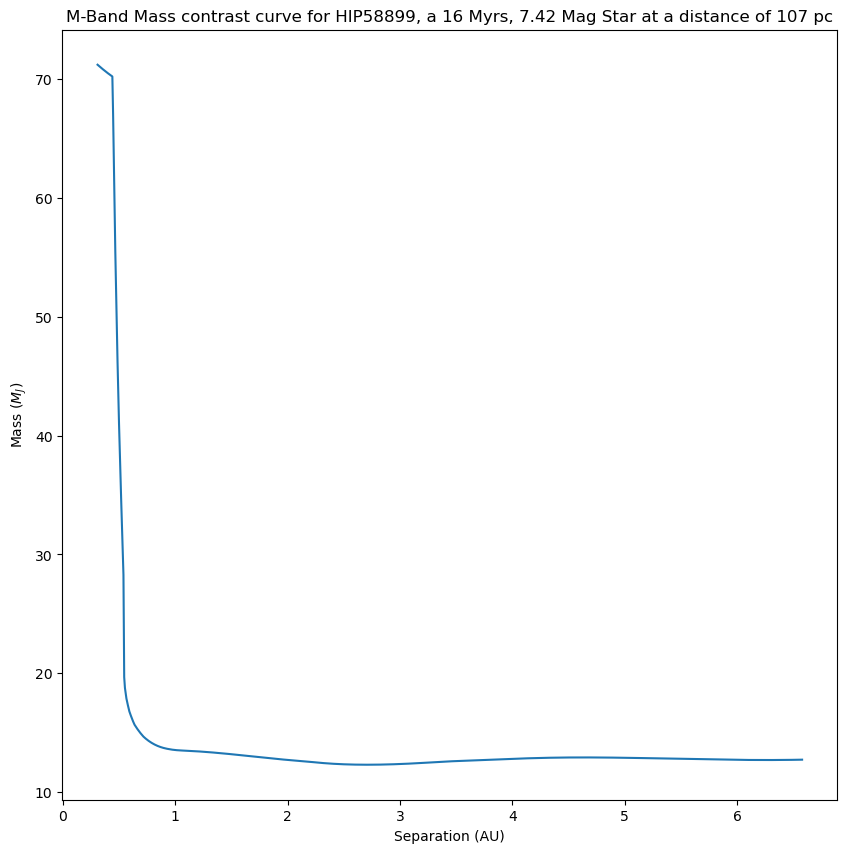

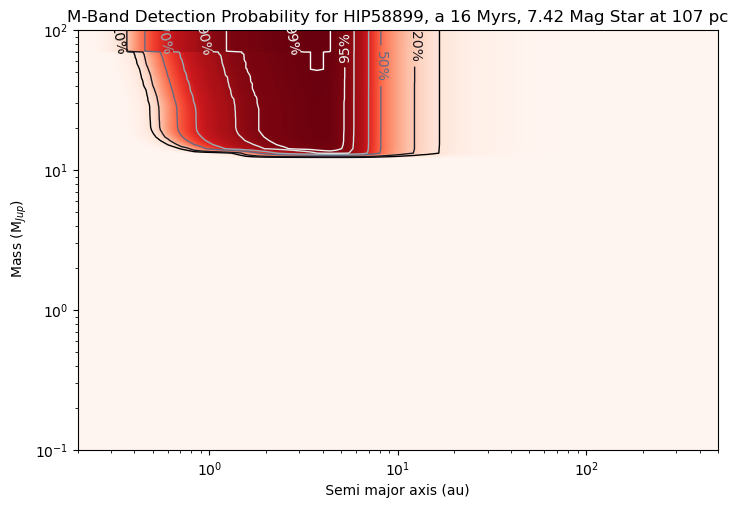

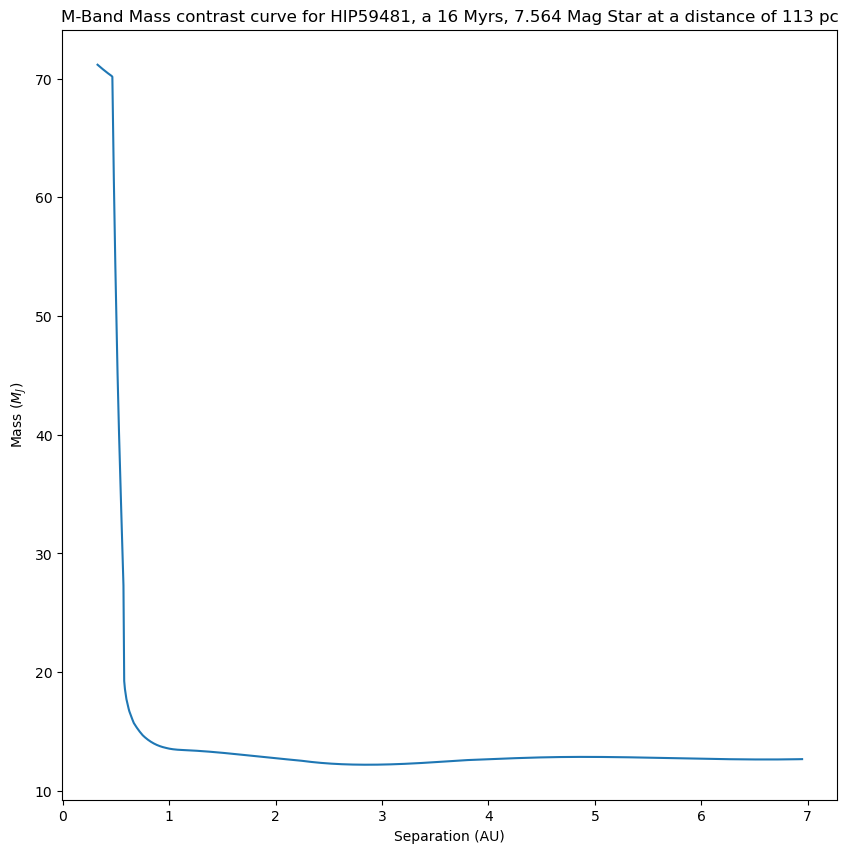

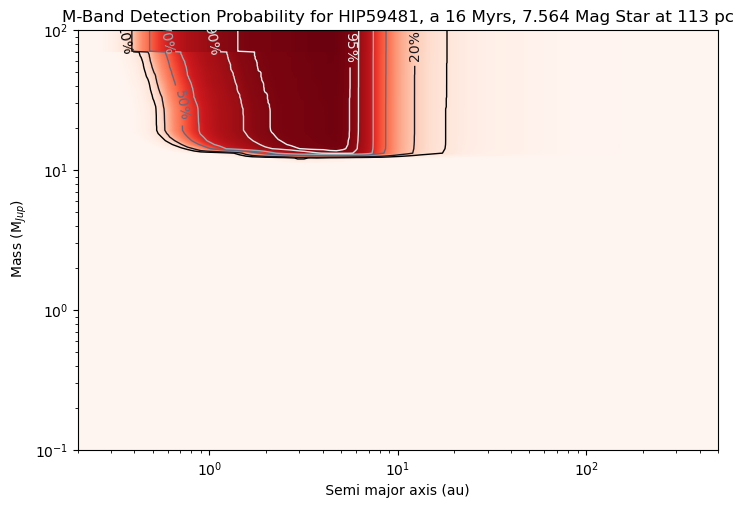

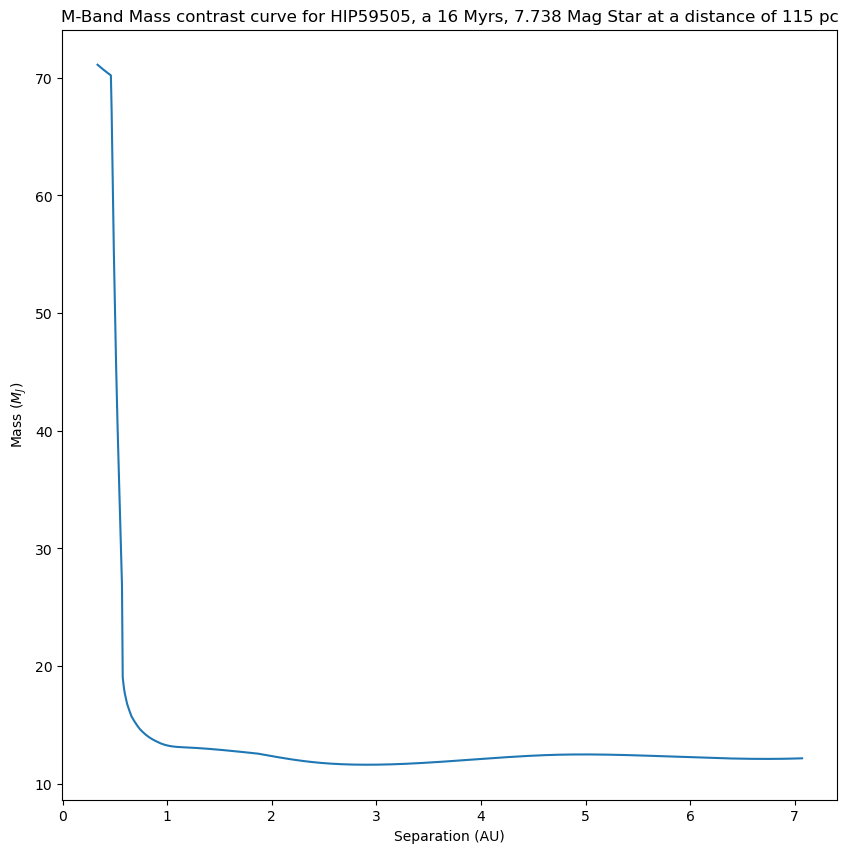

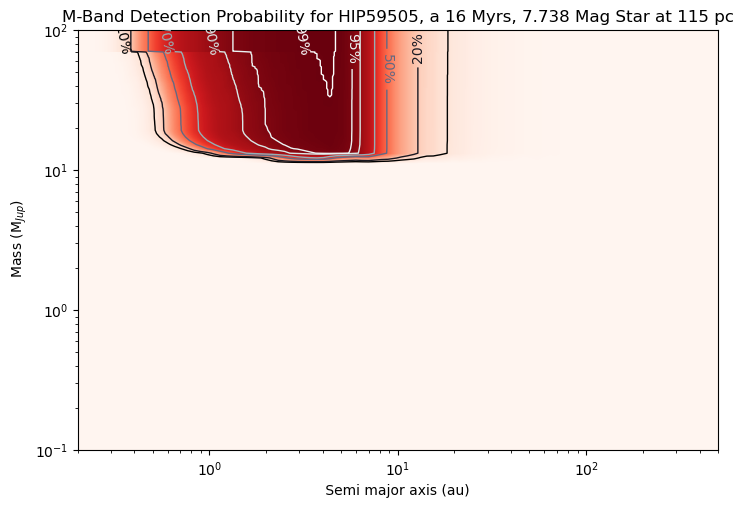

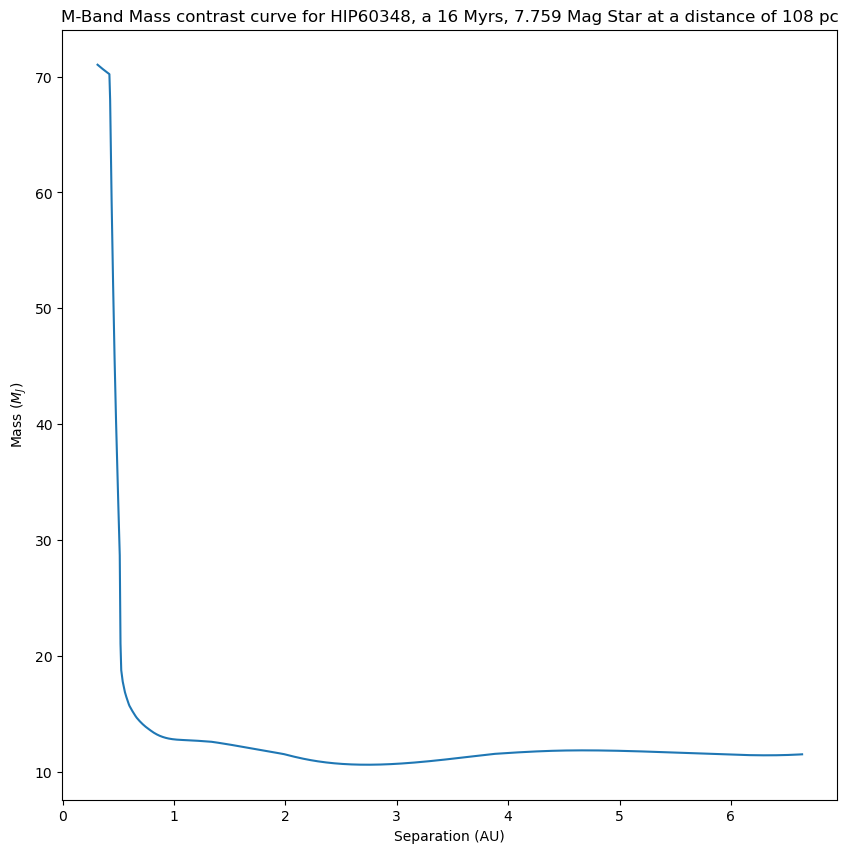

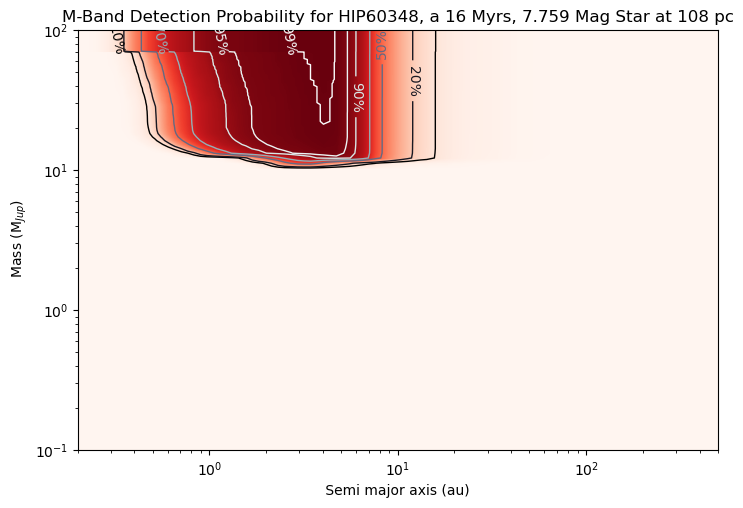

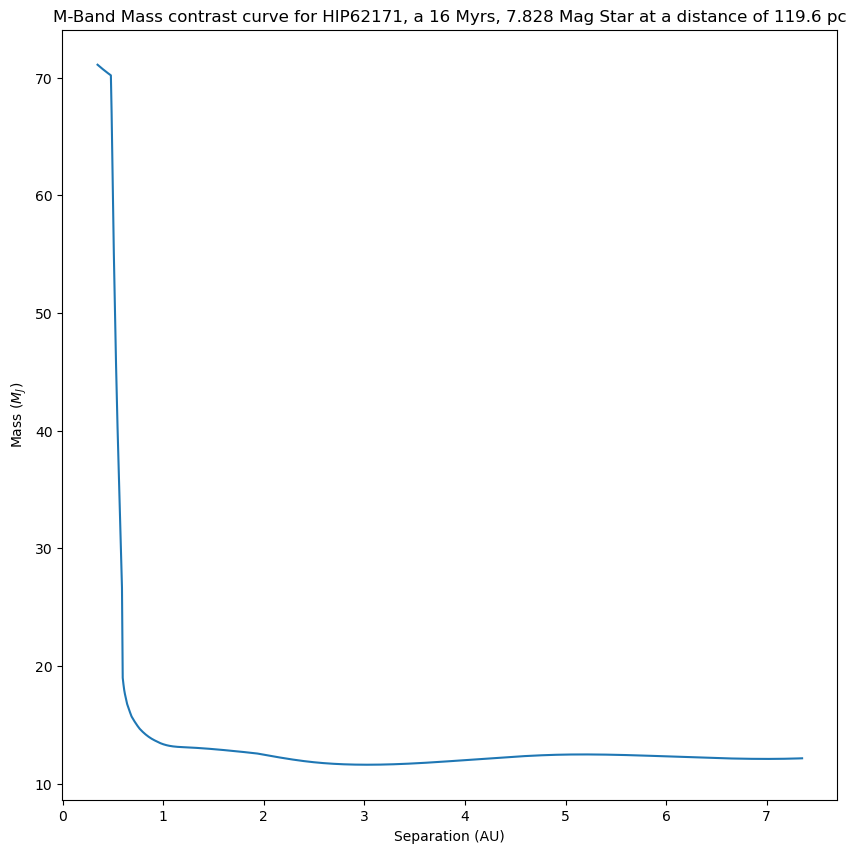

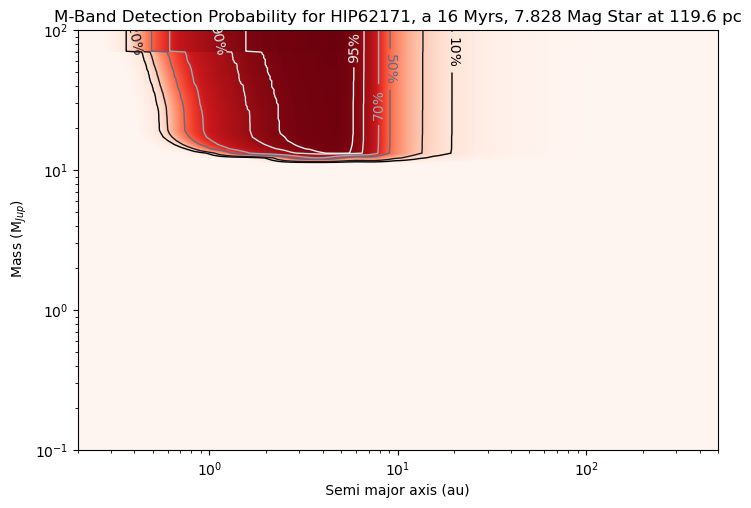

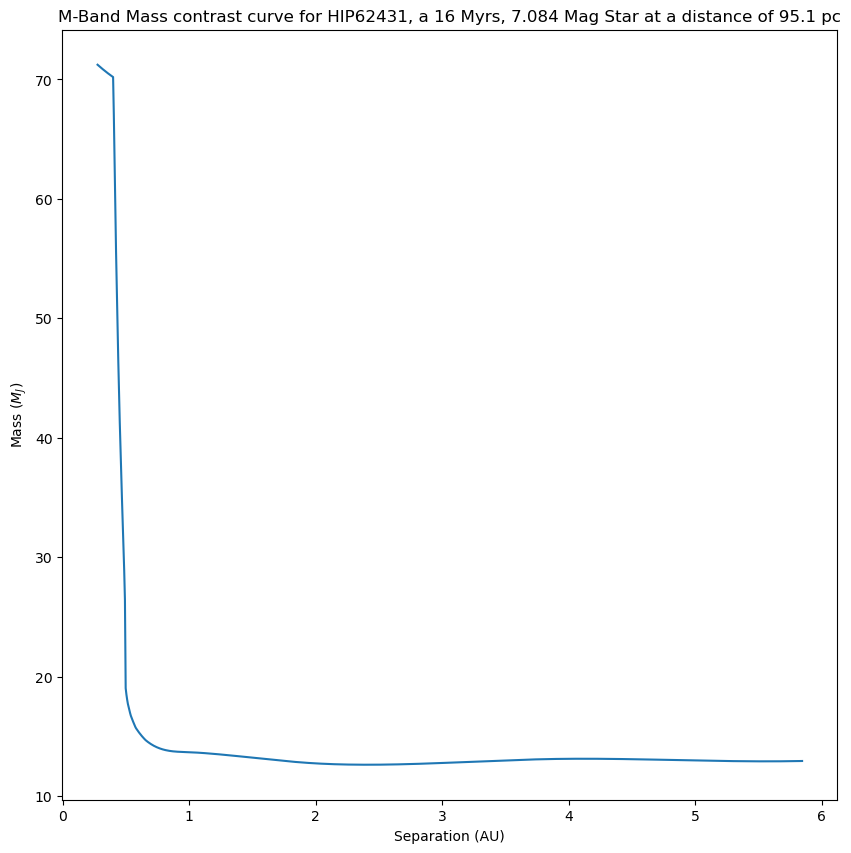

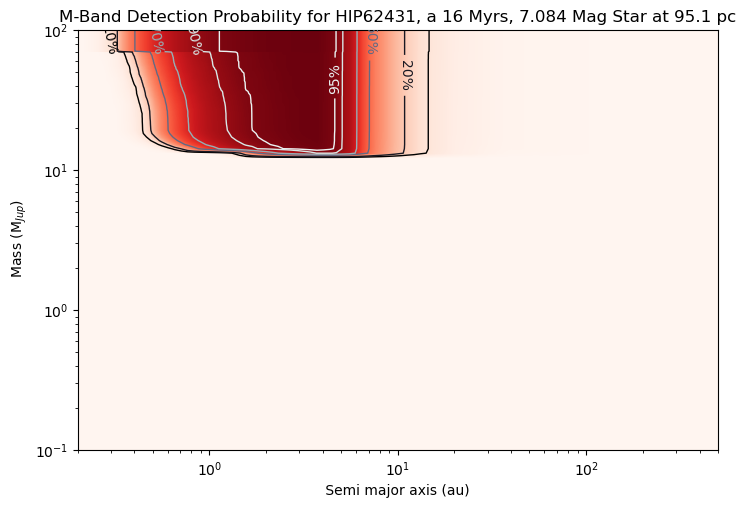

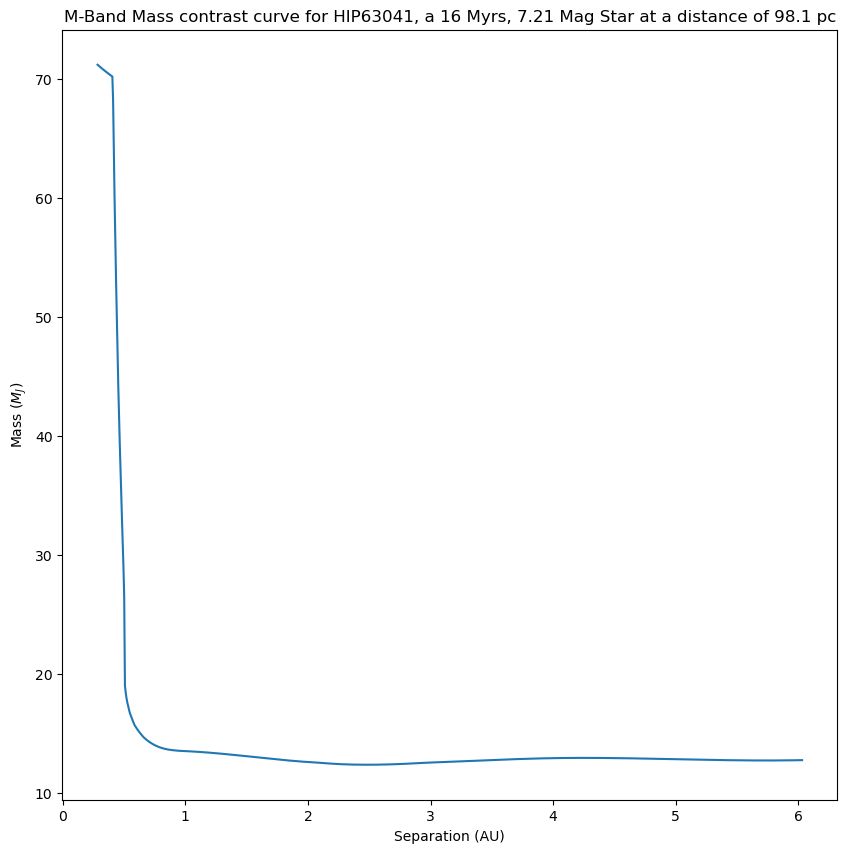

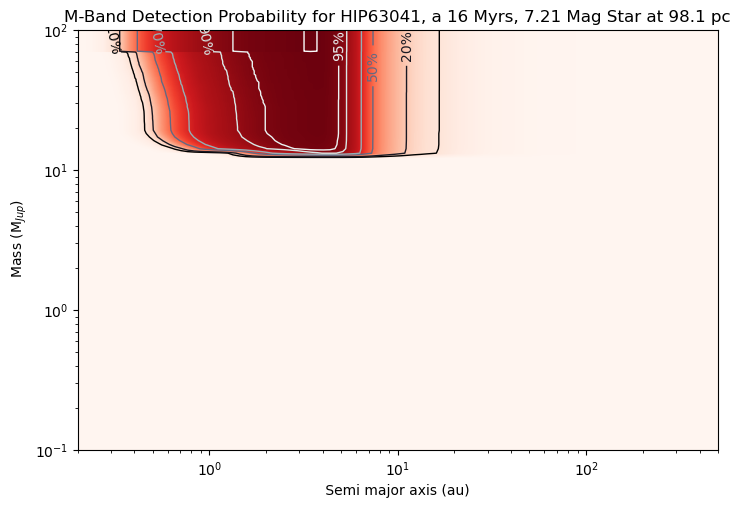

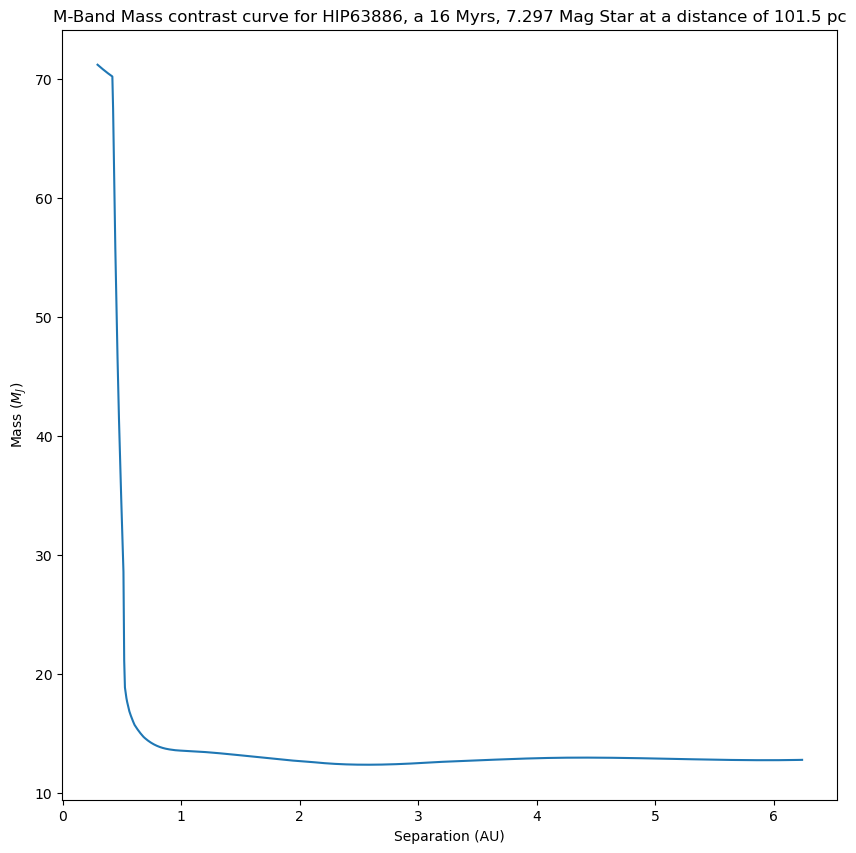

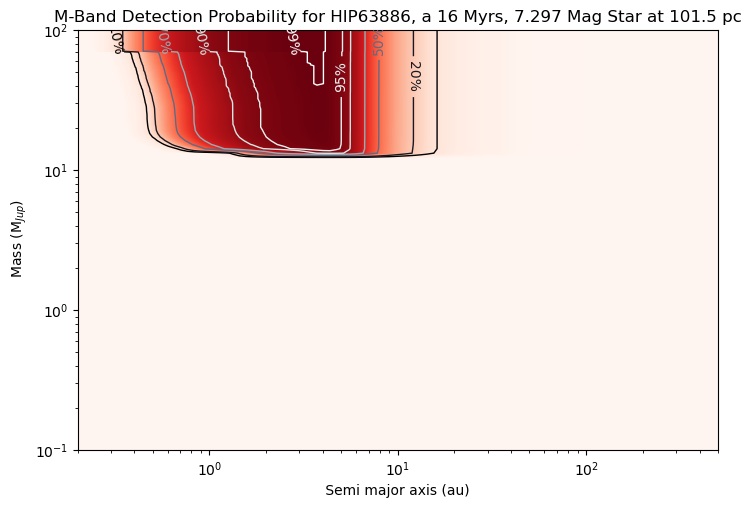

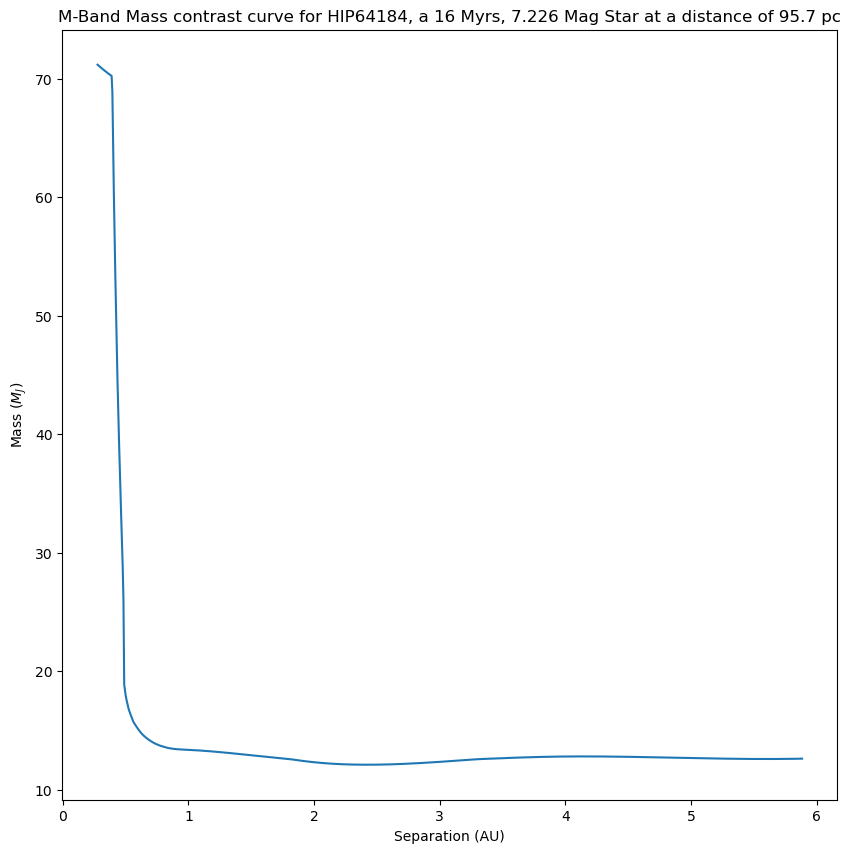

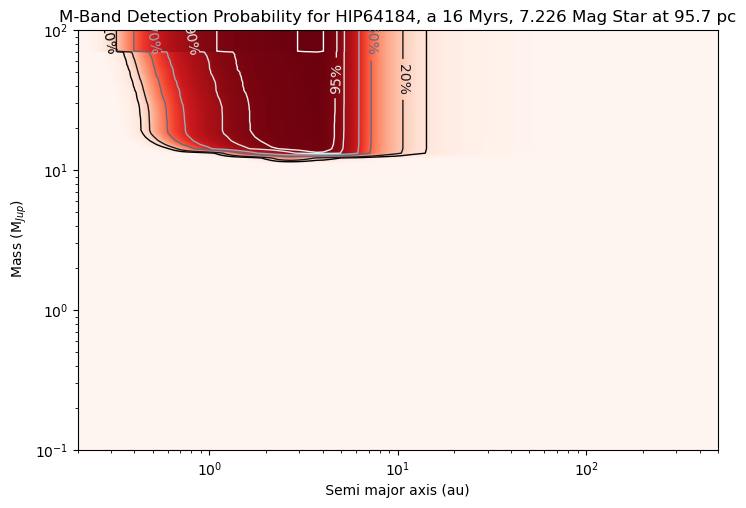

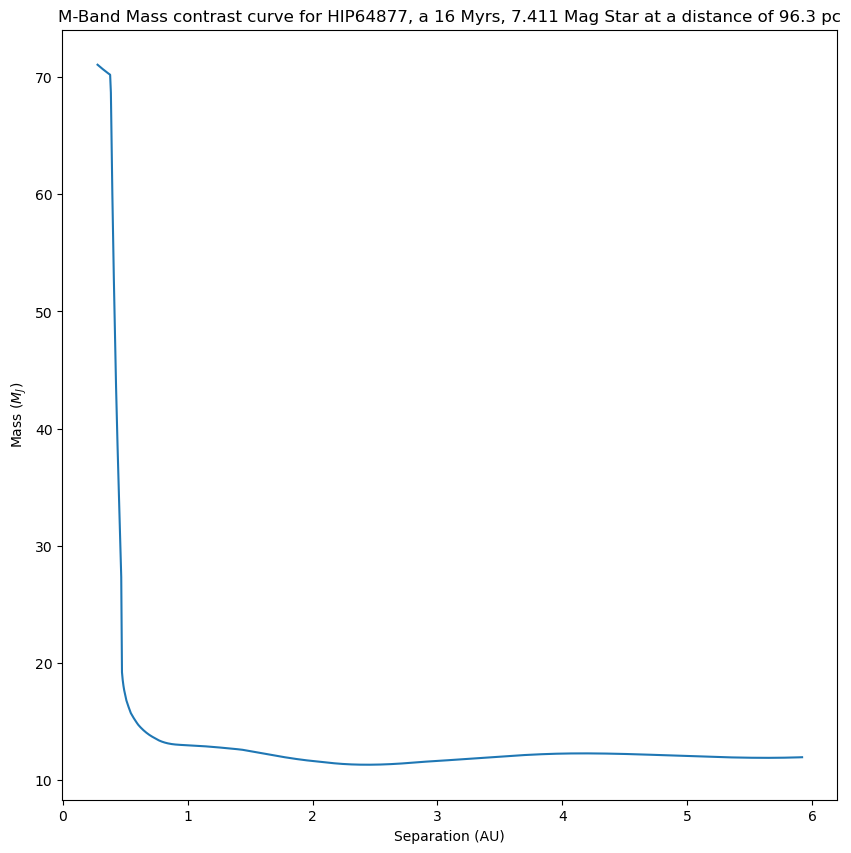

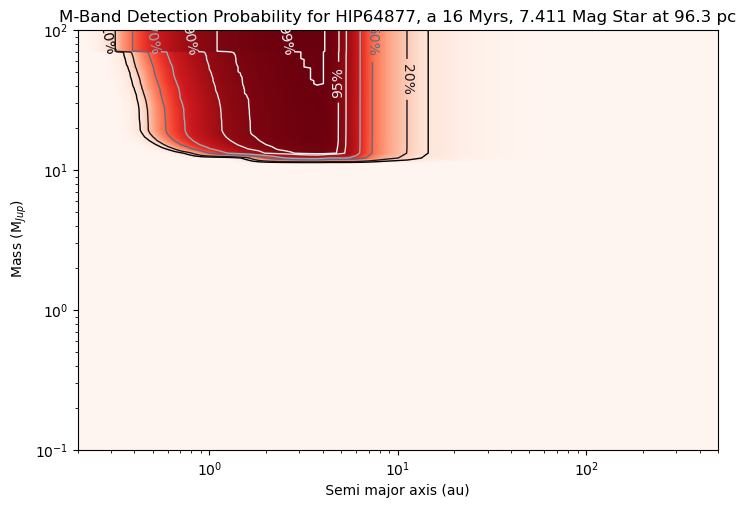

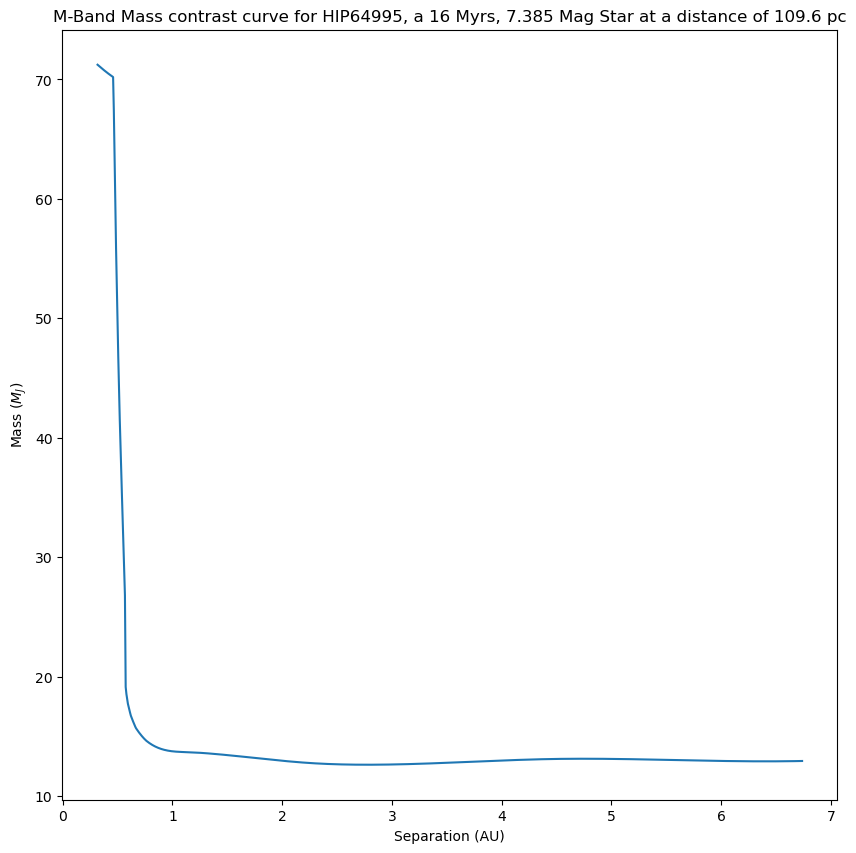

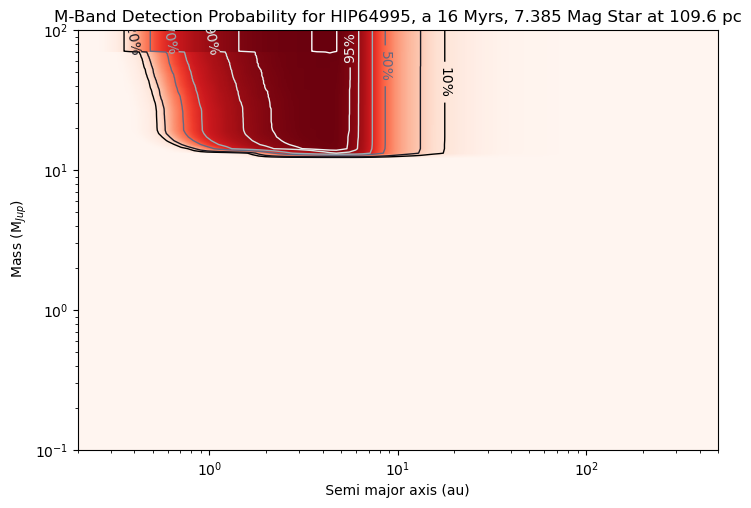

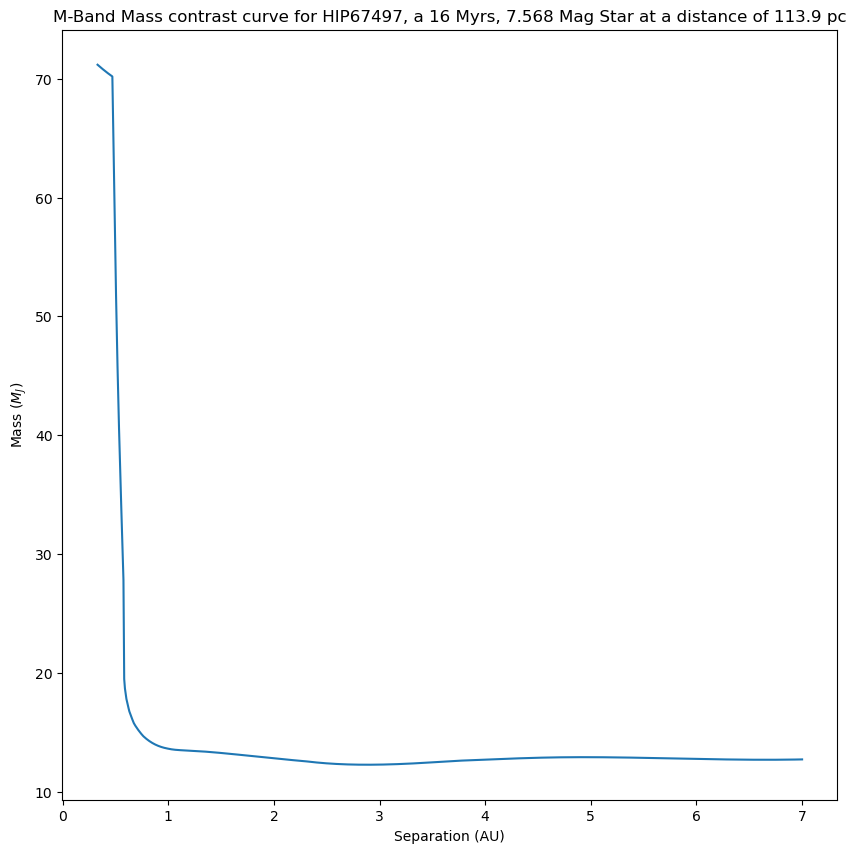

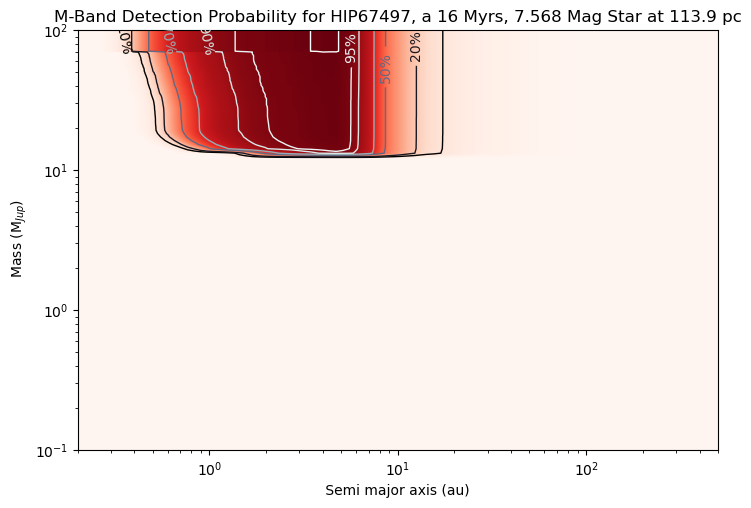

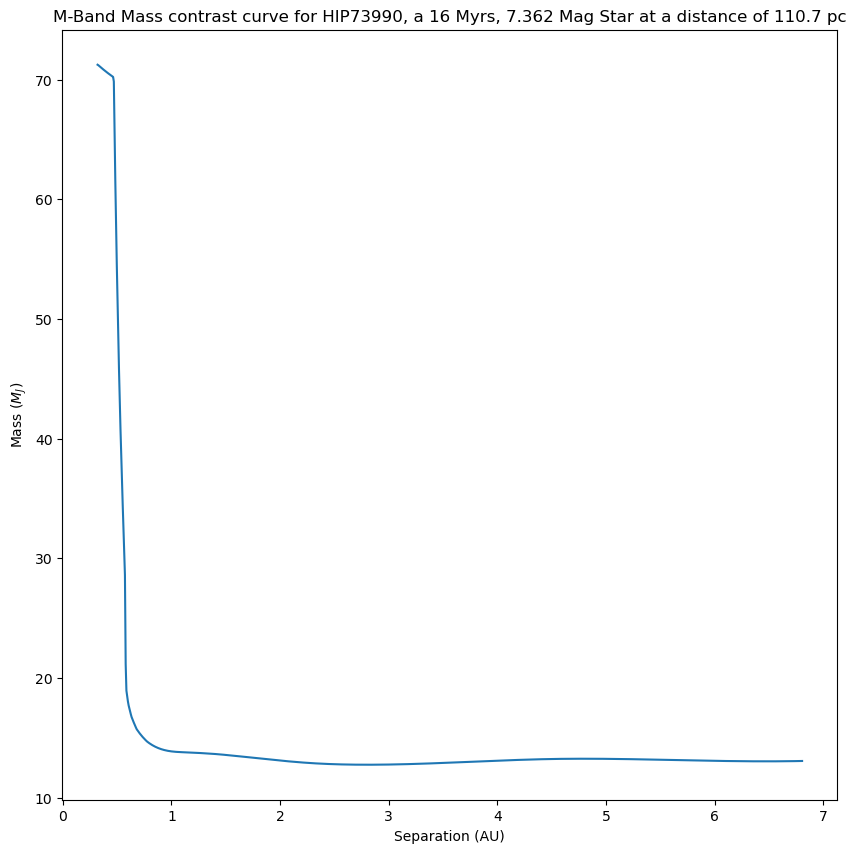

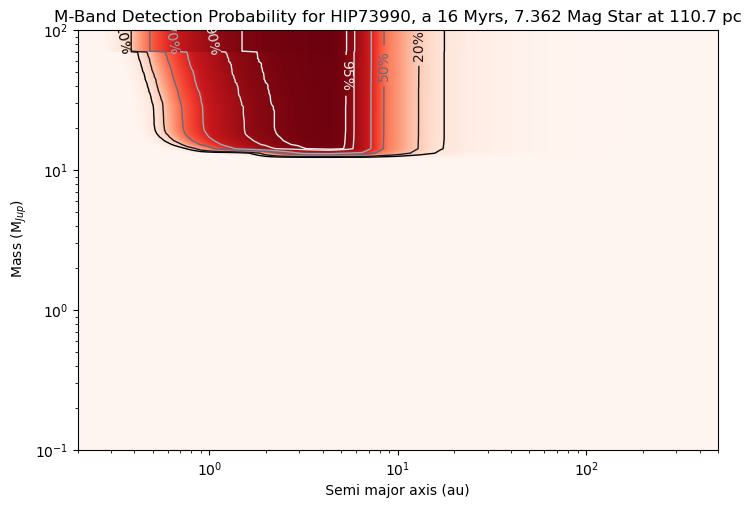

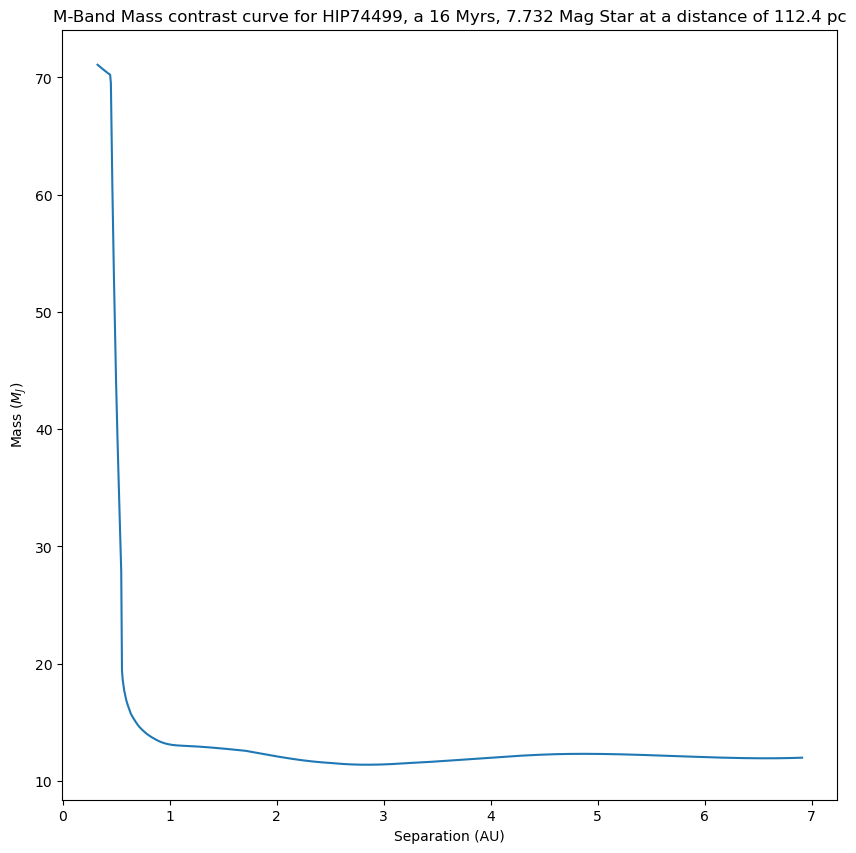

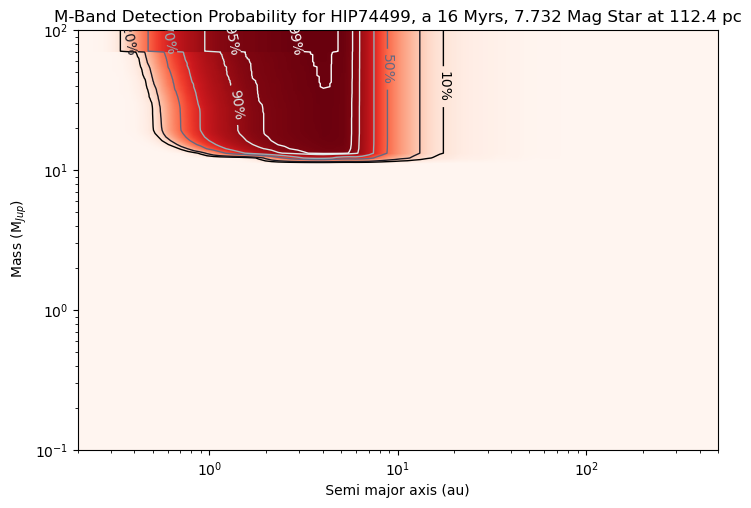

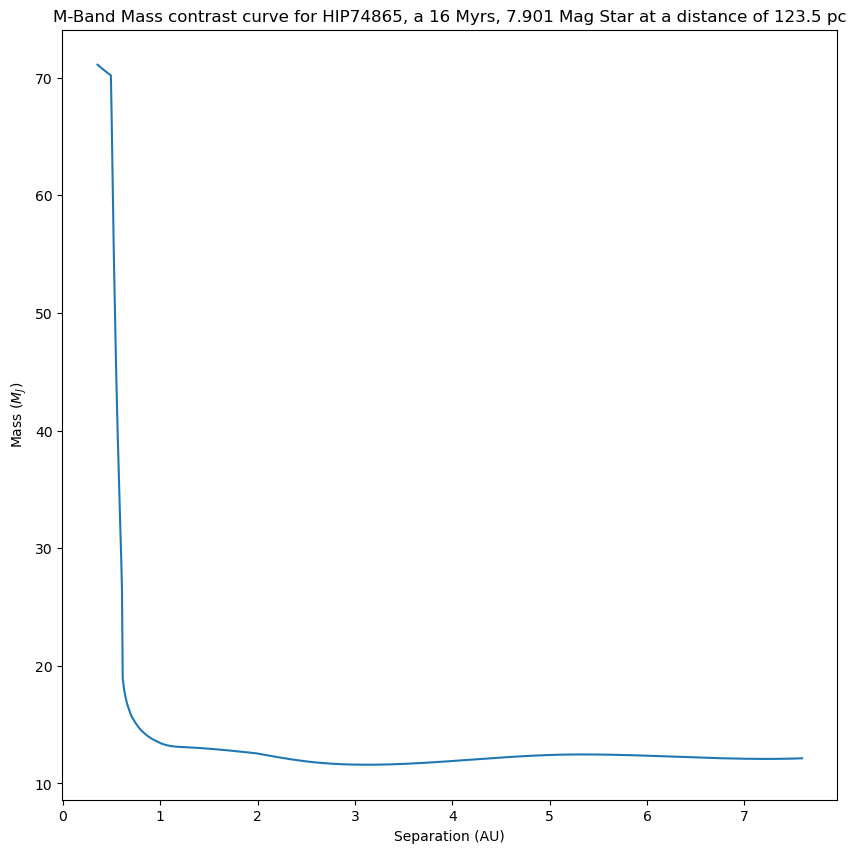

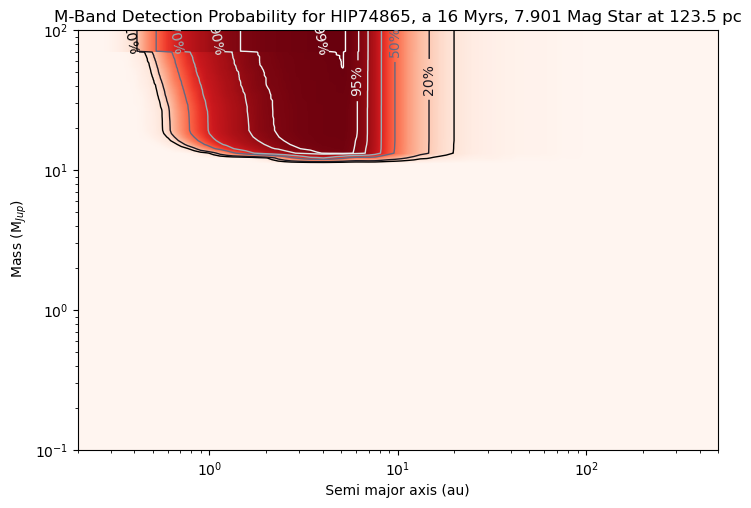

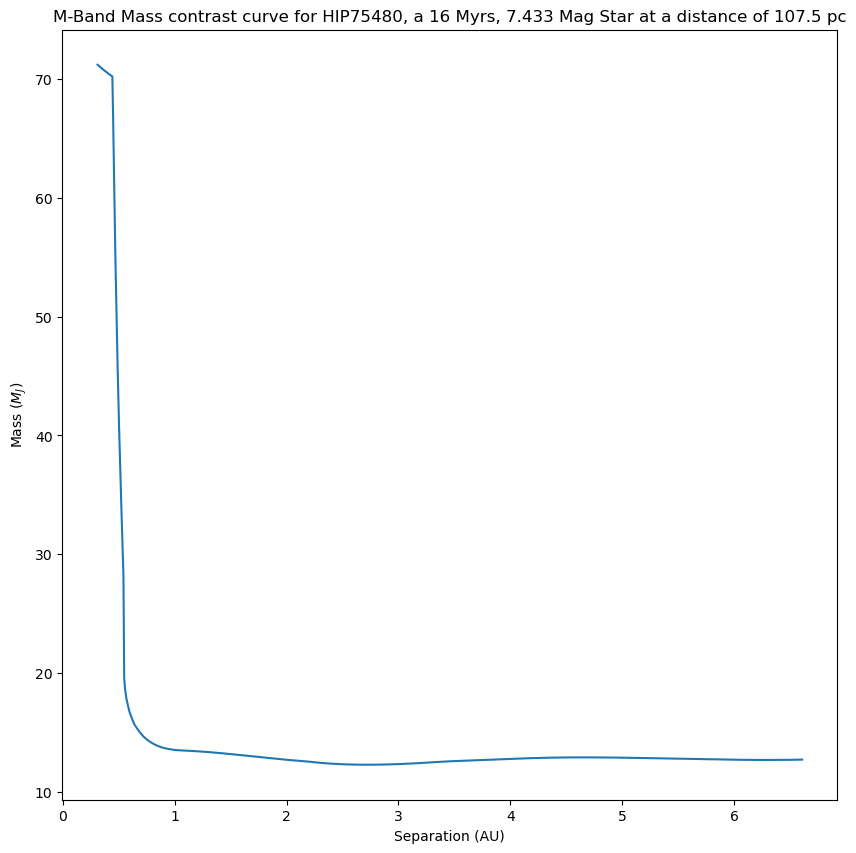

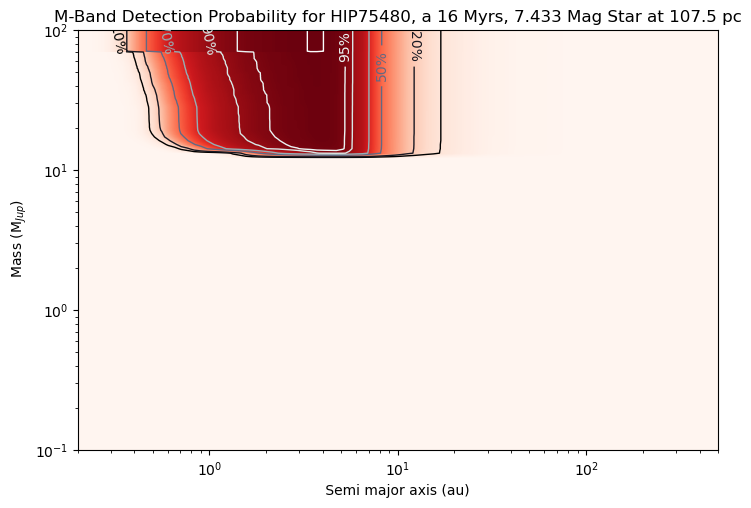

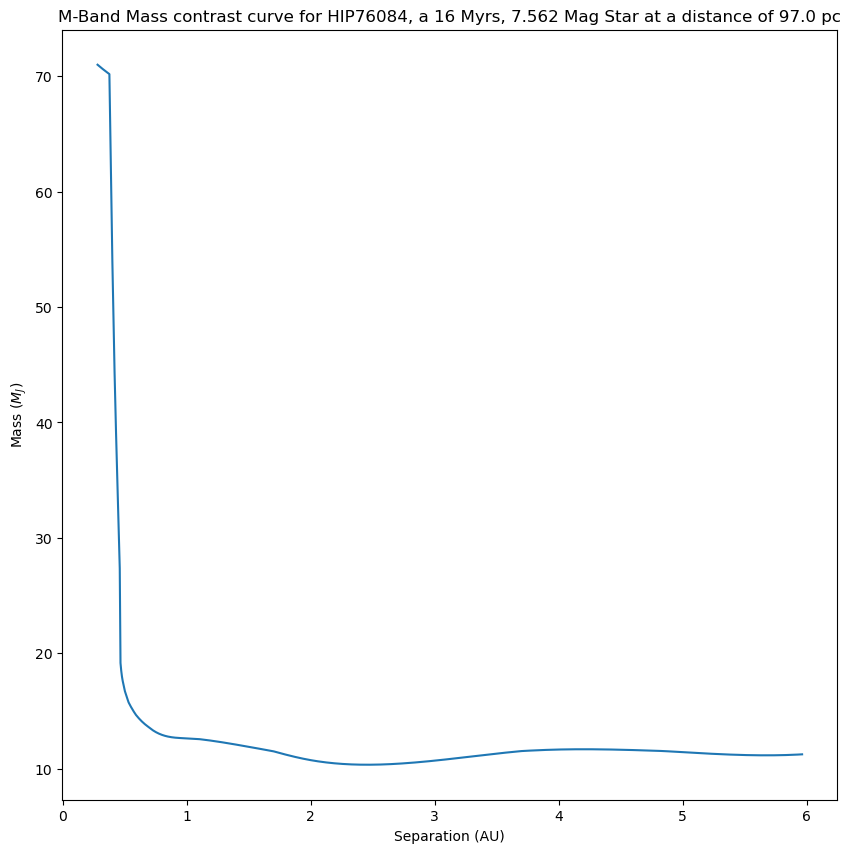

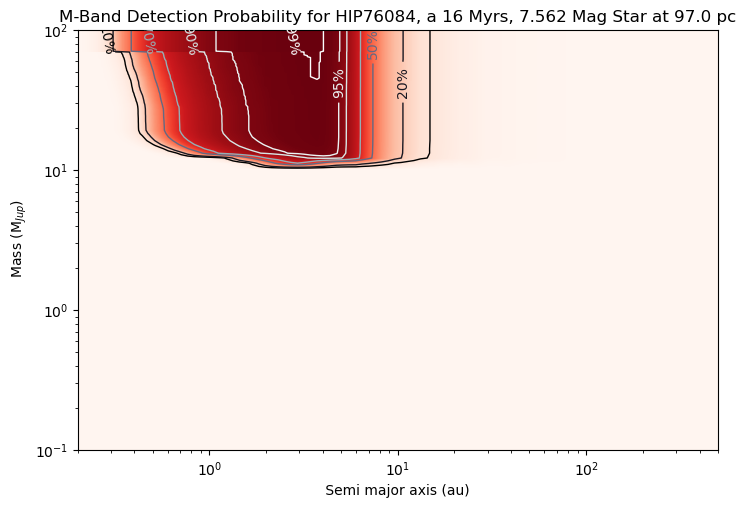

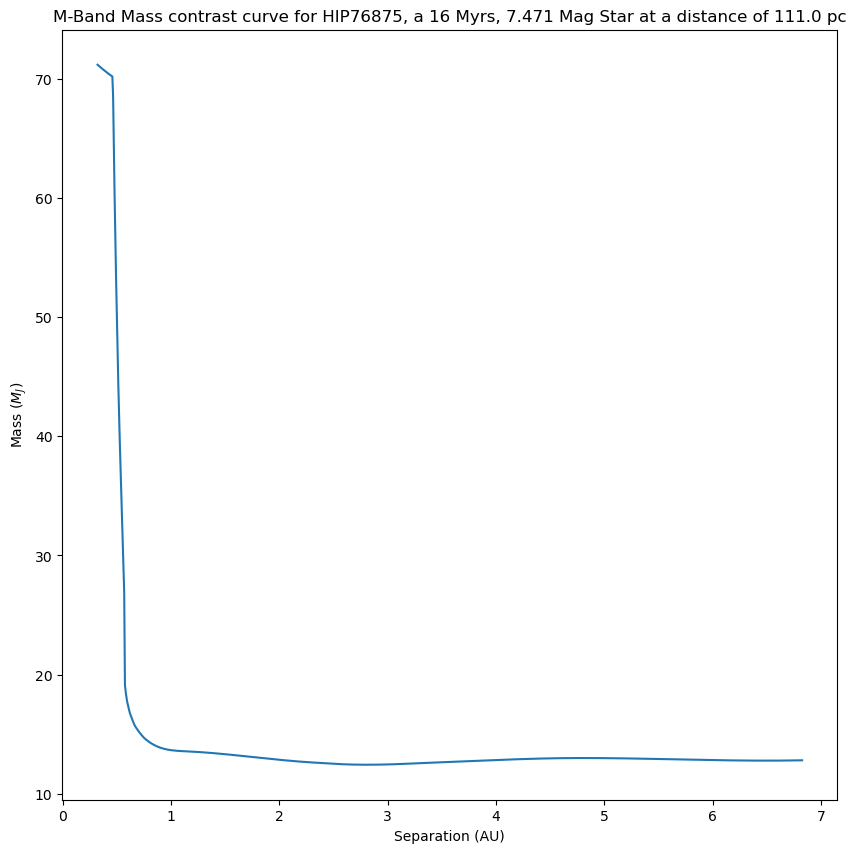

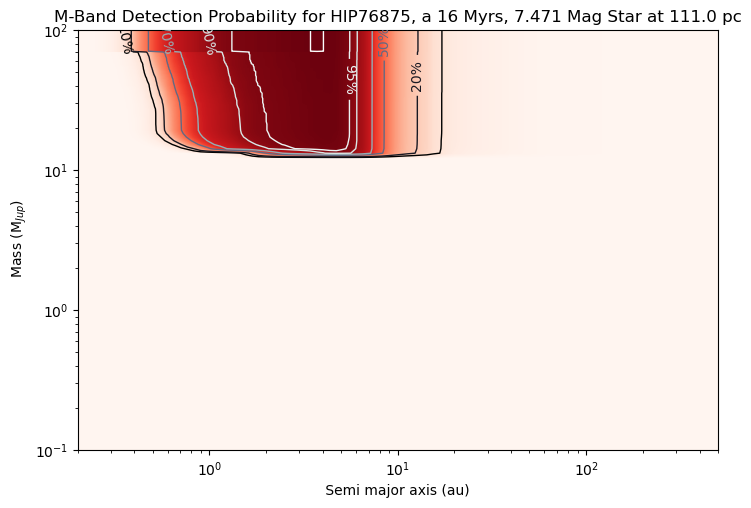

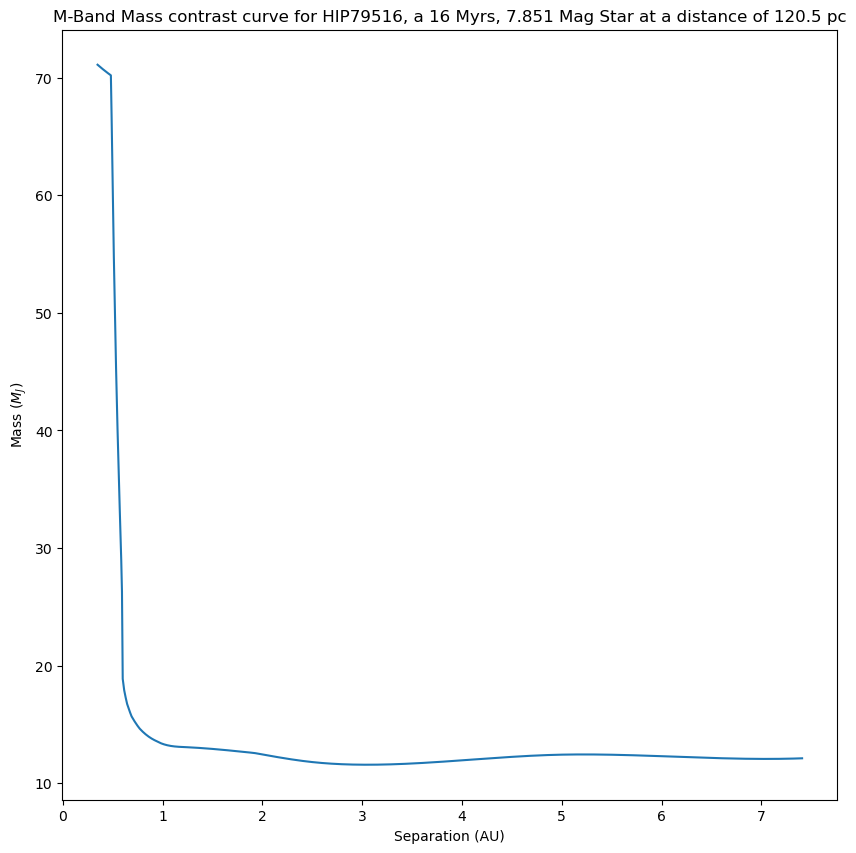

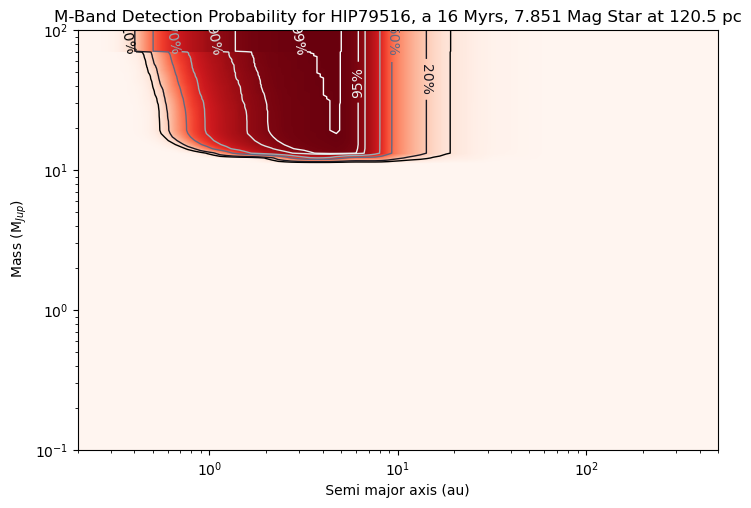

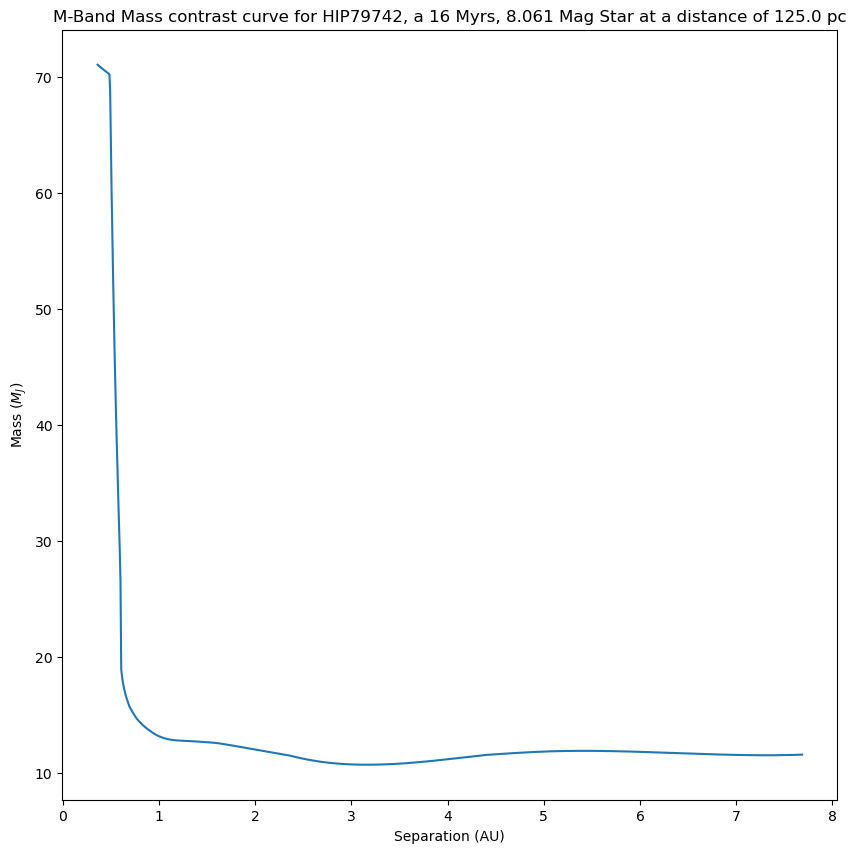

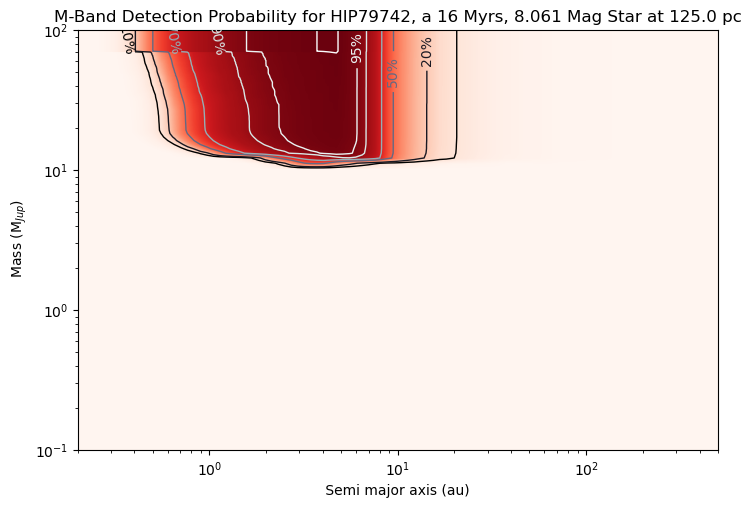

In [16]:
det.plot(model, model_tag, foldername, file_list, file_mag_list, distance, age, stellar_mag_list, filter_name_list, band_list, savefolder, star_list = star_list, xmin = 0.2, xmax = 500, logx = True, interpolate = False, custom = True)

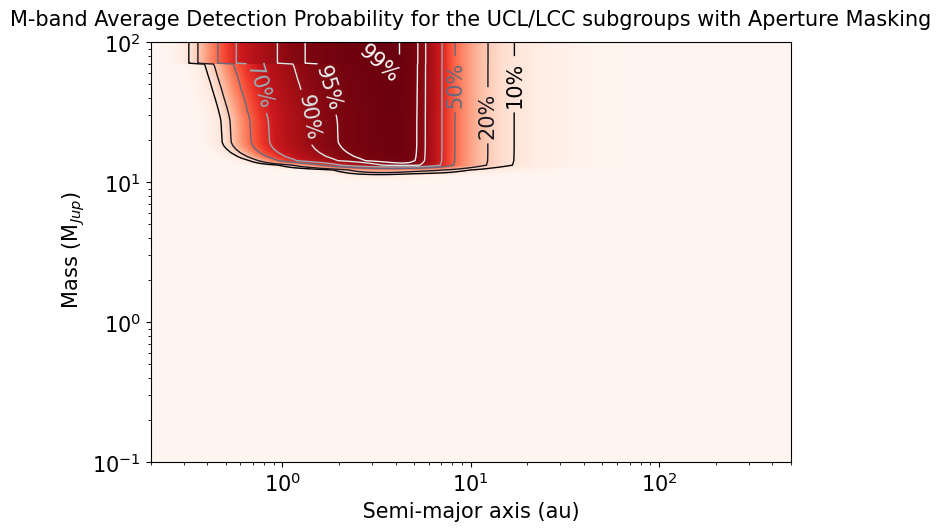

In [17]:
d = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/UCL-LCC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)

savefilename = 'average_mask_UCL_LCC_MKO_Mp_band'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(20,50),(13,30),(10,50),(0.8,50),(1.5,30),(2,50),(3,40)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('M-band Average Detection Probability for the UCL/LCC subgroups with Aperture Masking', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

In [18]:
data = np.loadtxt("eltmasking_limits.sm")
file_list = np.zeros(shape = [25, len(data[:,0]), 2])
for i in range(len(file_list[:,0,0])):
    file_list[i,:,0] = data[:,1] * 0.001
    file_list[i,:,1] = 10 ** (-data[:,3]/2.5)
model = 'atmo'
model_tag = 'atmo-ceq'
foldername = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/exeter/fits'
file_mag_list = [7,7.5,8]
stellar_mag_list = [8.304,
7.039,
7.418,
8.026,
7.468,
7.636,
7.317,
7.360,
7.548,
7.887
]
star_list = ['HIP75659',
'HIP76782',
'HIP77347',
'HIP77736',
'HIP77960',
'HIP78581',
'HIP79250',
'HIP79690',
'HIP80896',
'HIP82218'
]
filter_name_list = ['MKO_Lp']*10
band_list = ['L']*10
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/USC_L'
distance = [122.5,
87.6,
123.3,
108.1,
121.4,
105.3,
120.9,
112.9,
118.2,
118.2
]
age = [11]*10

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
The 'MKO_Lp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
L-Band Detection Probability for HIP75659, a 11 Myrs, 8.304 Mag Star at 122.5 pc time elapsed - 00:00:00.60
The 'MKO_Lp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
L-Band Detection Probability for HIP76782, a 11 Myrs, 7.039 Mag Star at 87.6 pc time elapsed - 00:00:00.60
The 'MKO_Lp' filter is found in the list of available

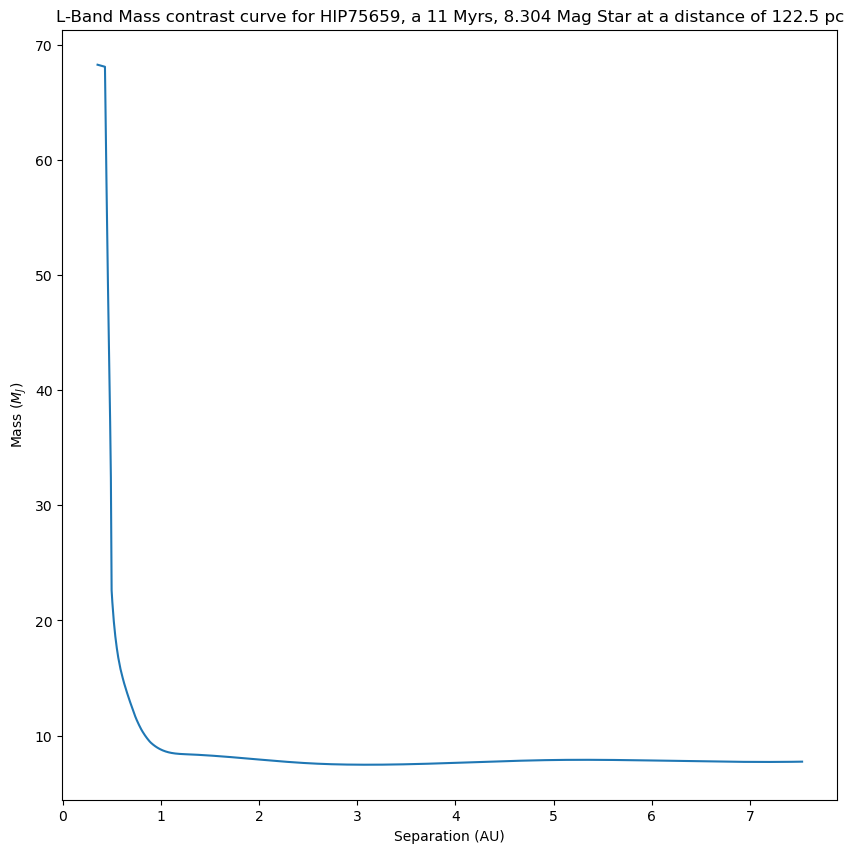

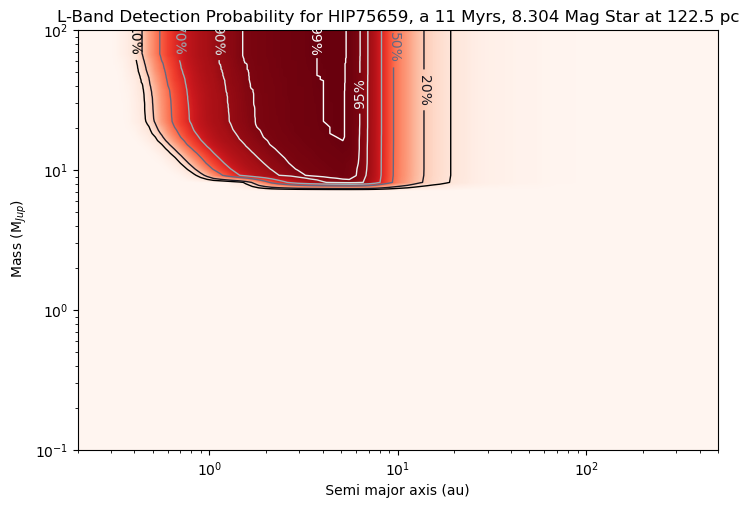

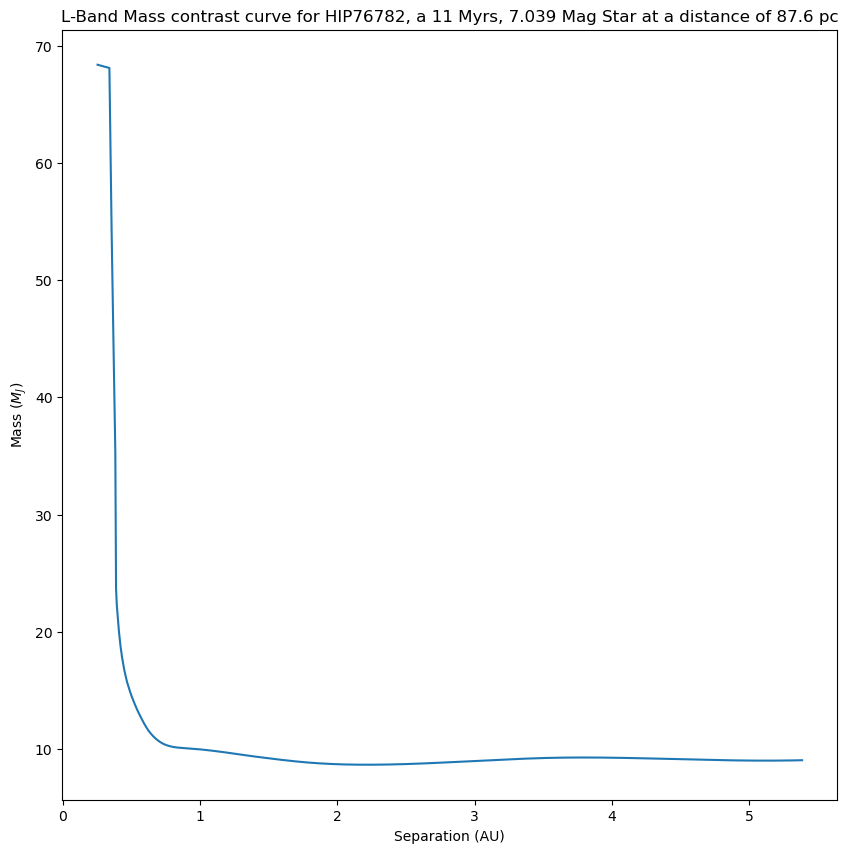

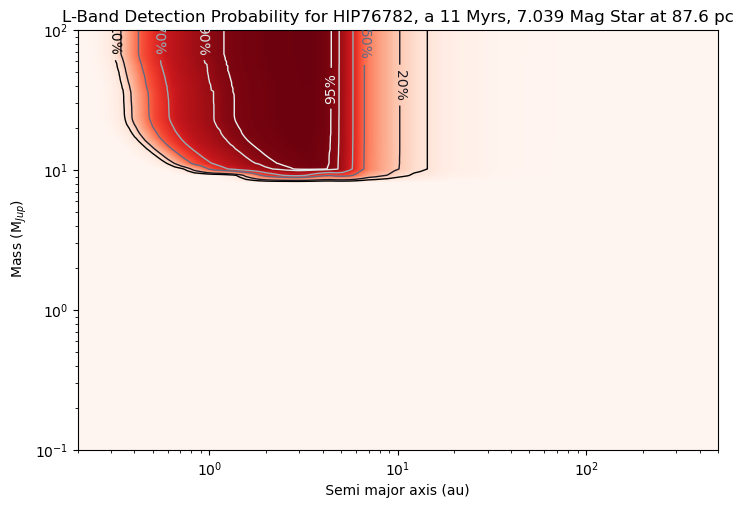

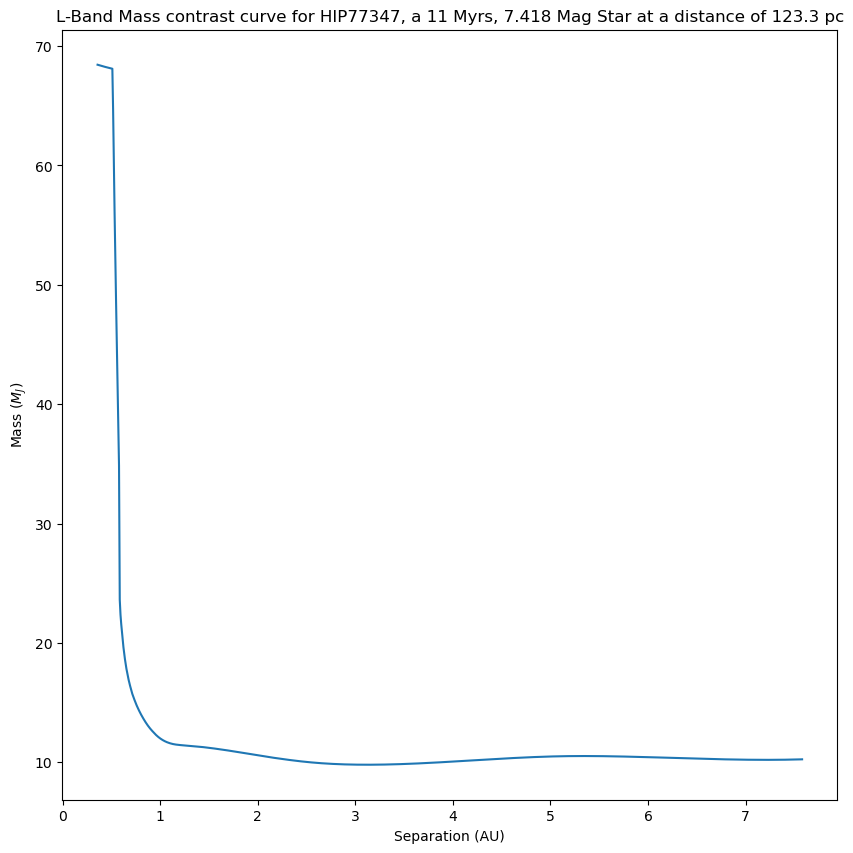

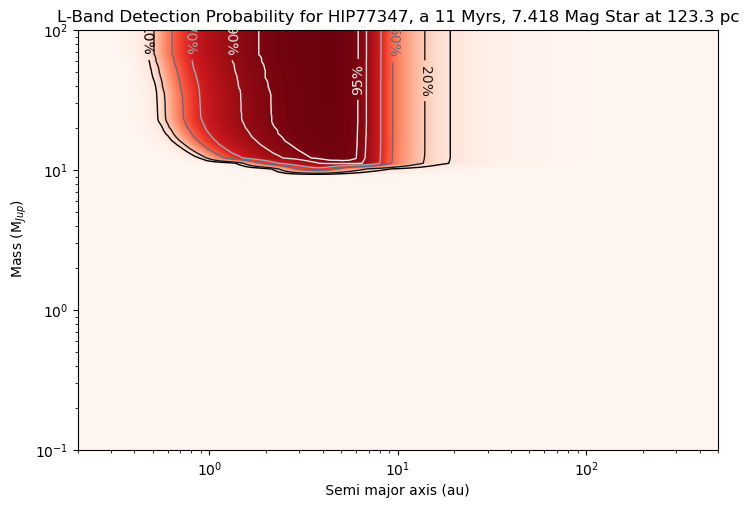

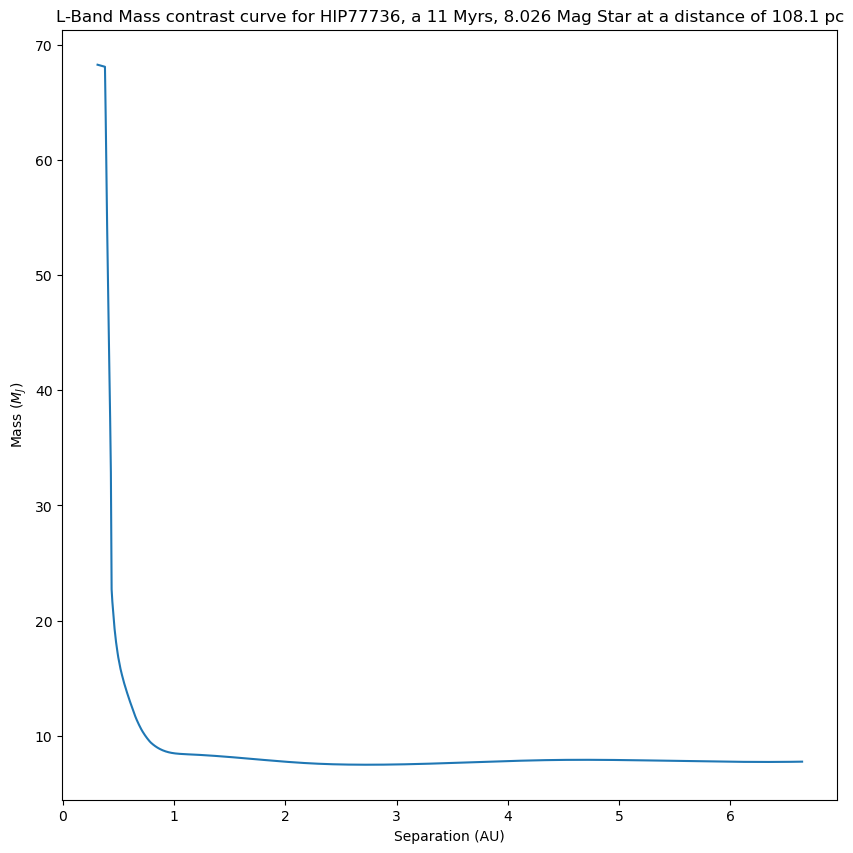

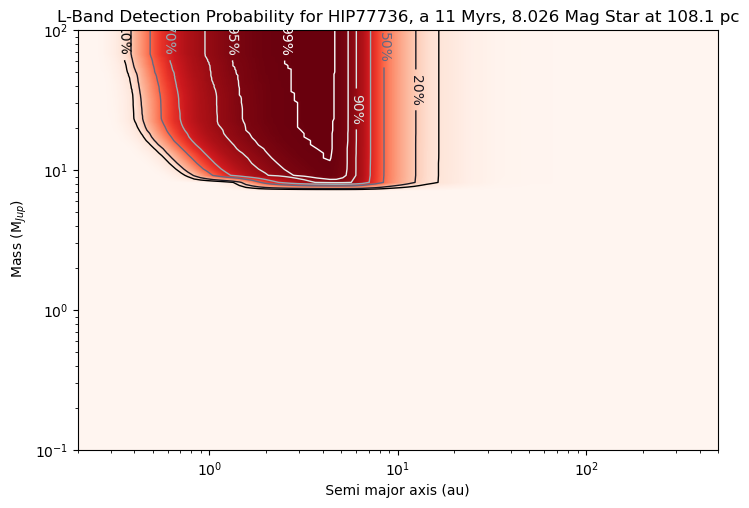

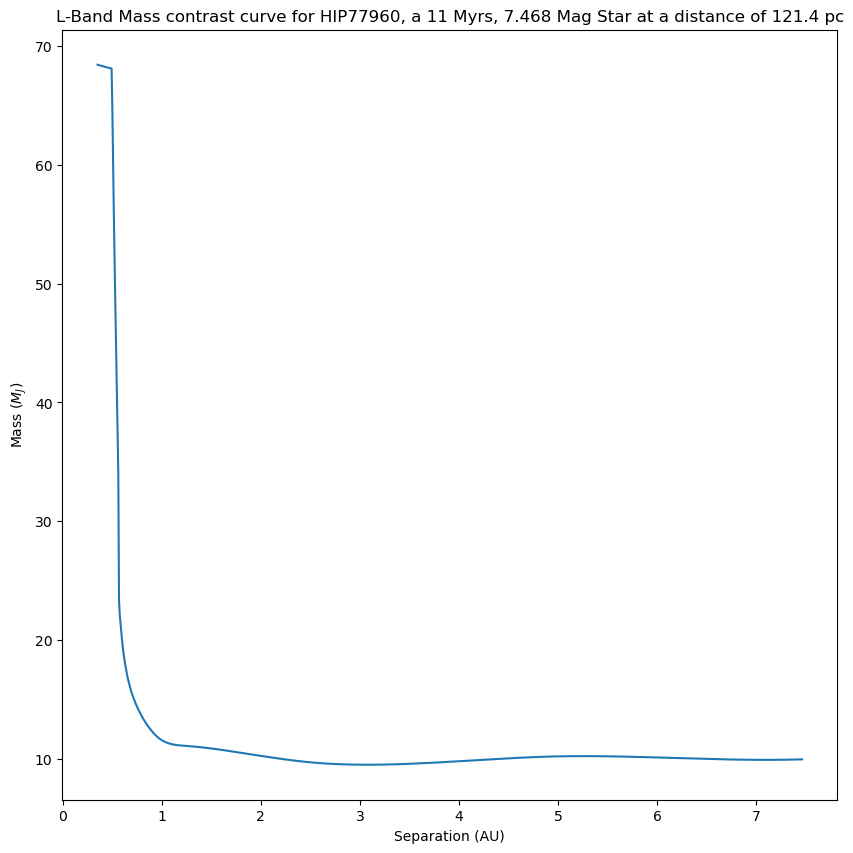

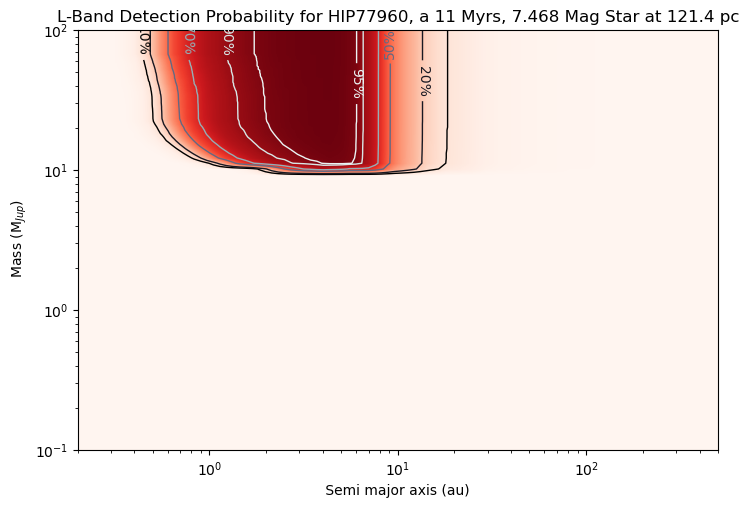

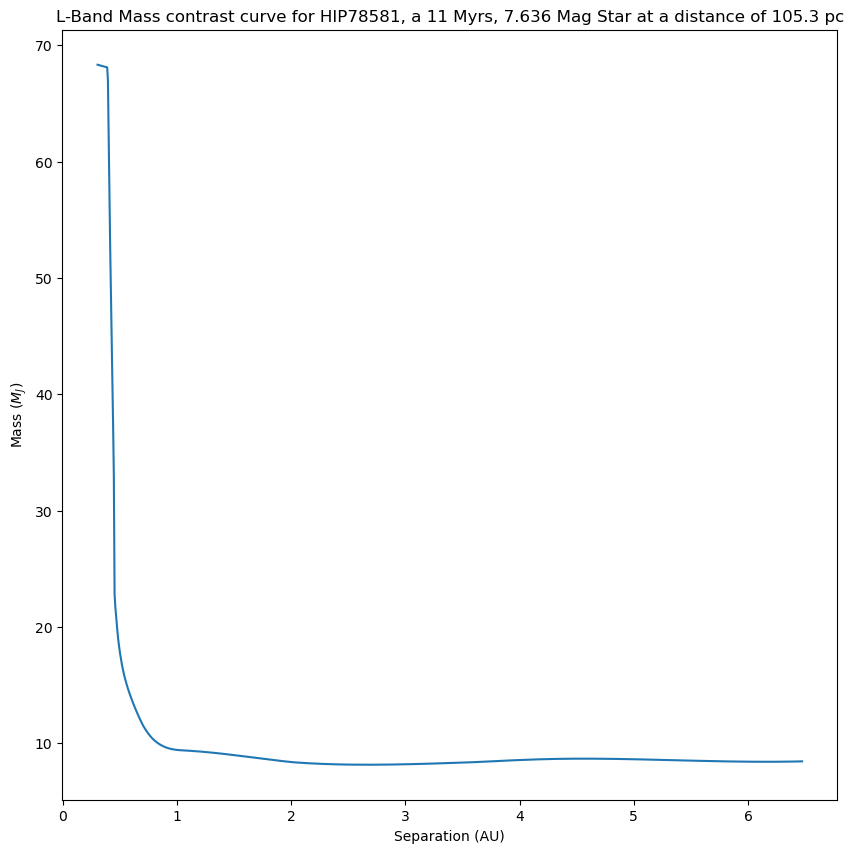

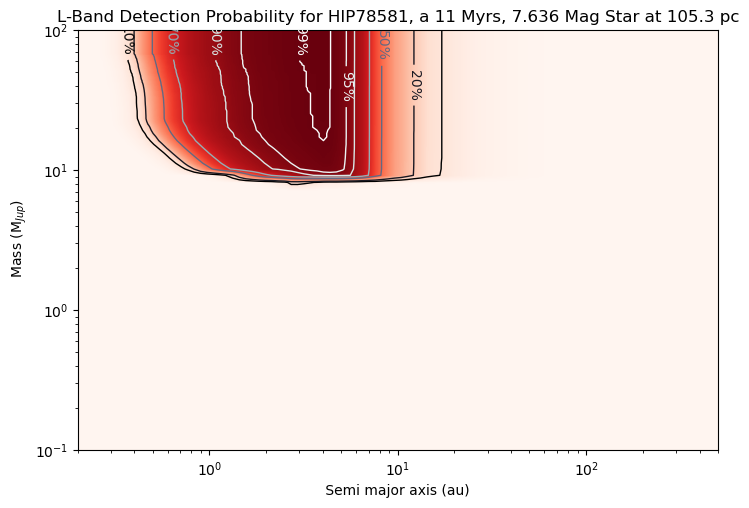

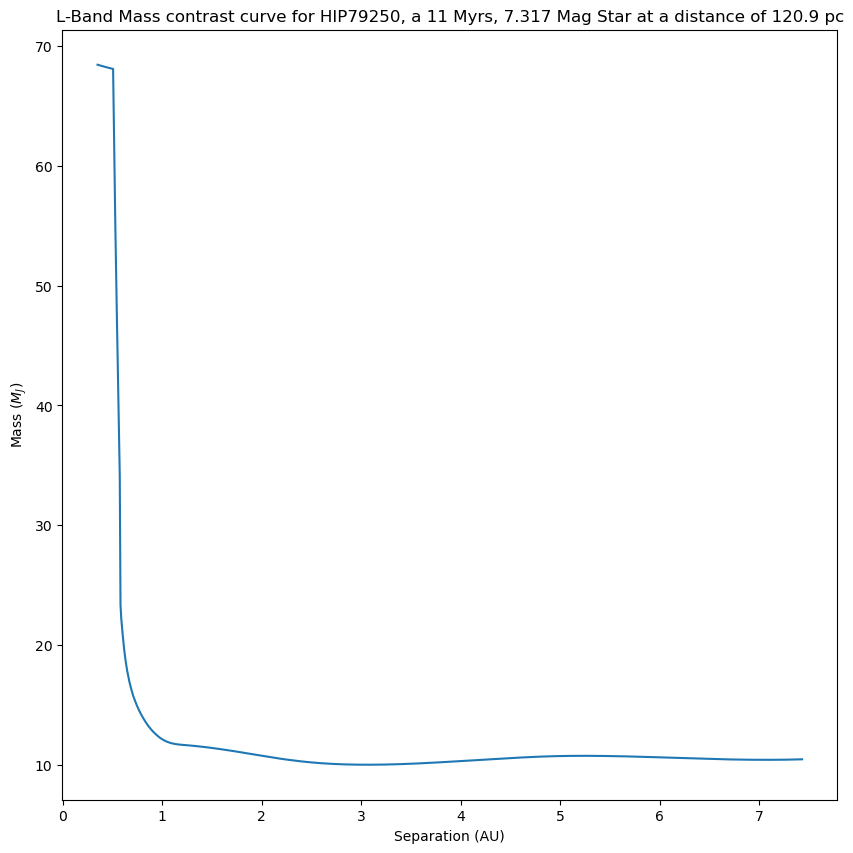

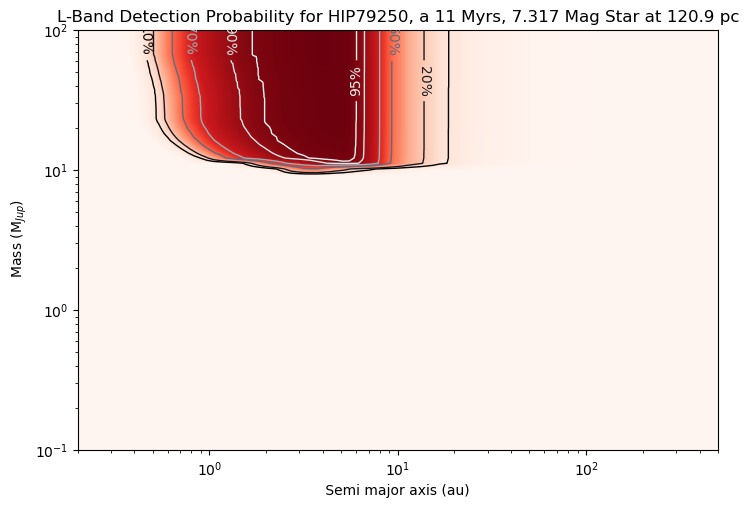

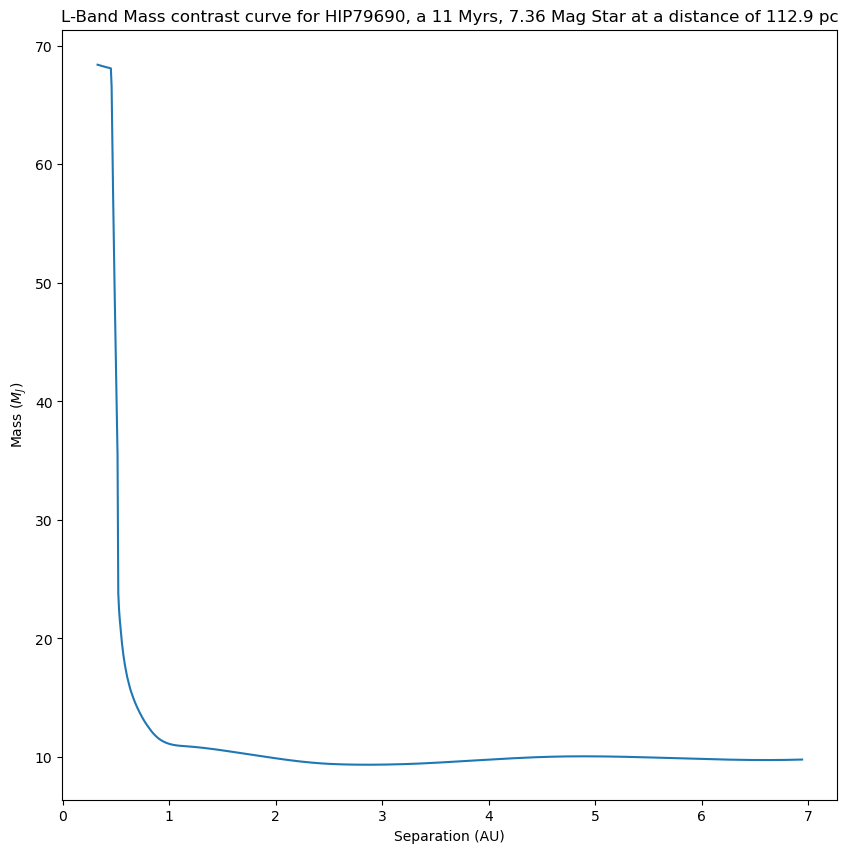

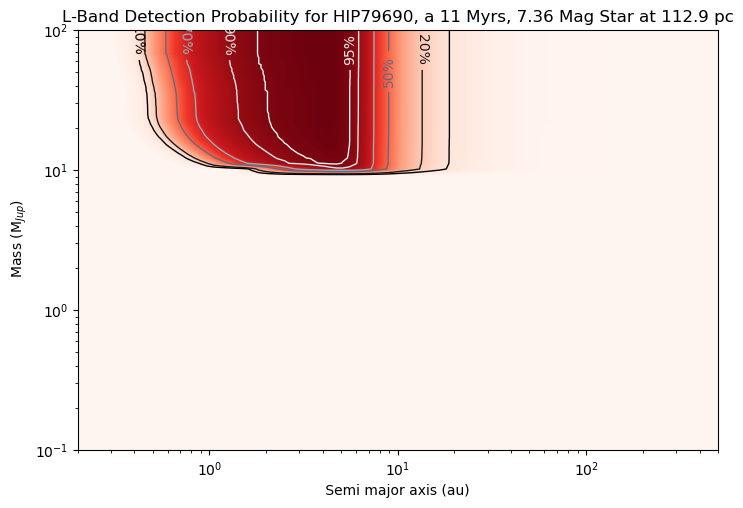

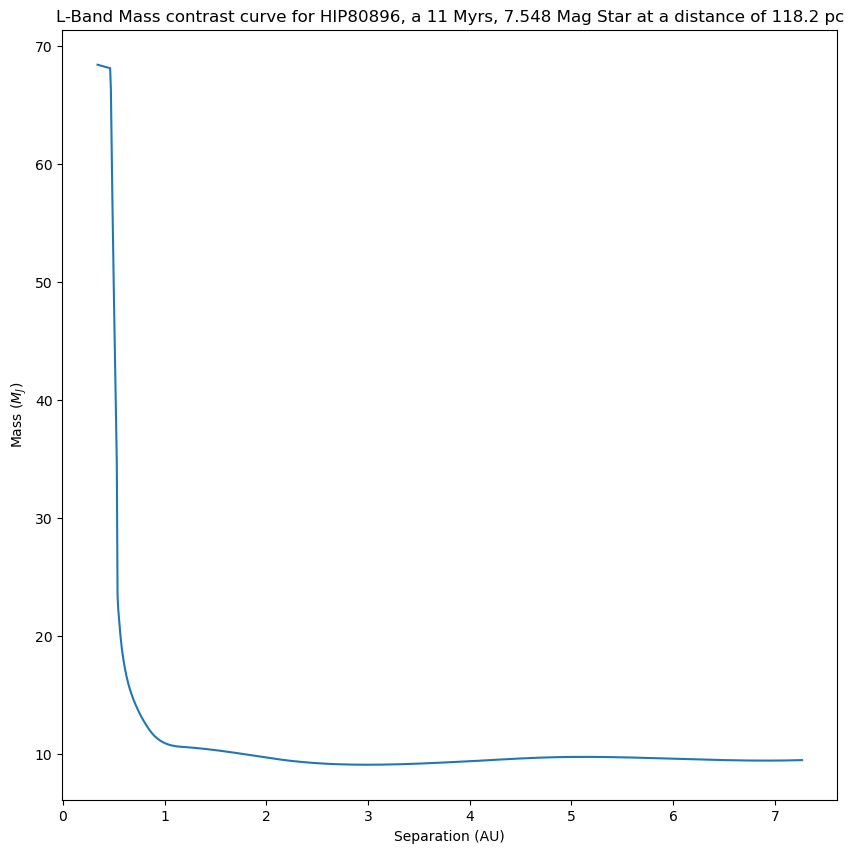

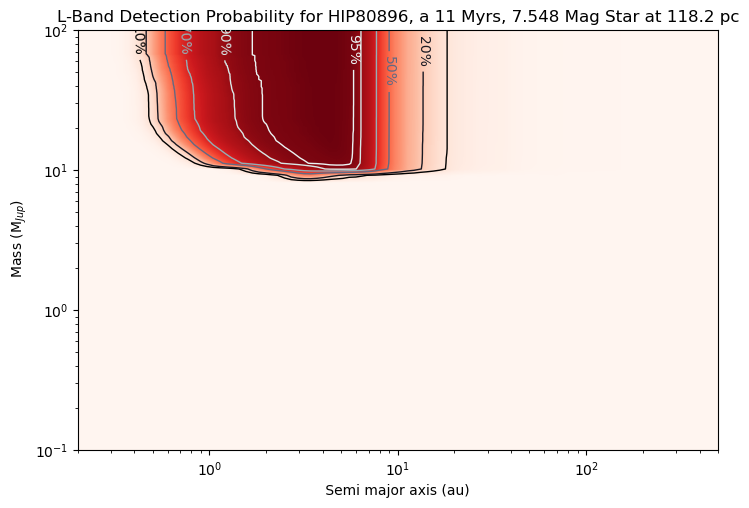

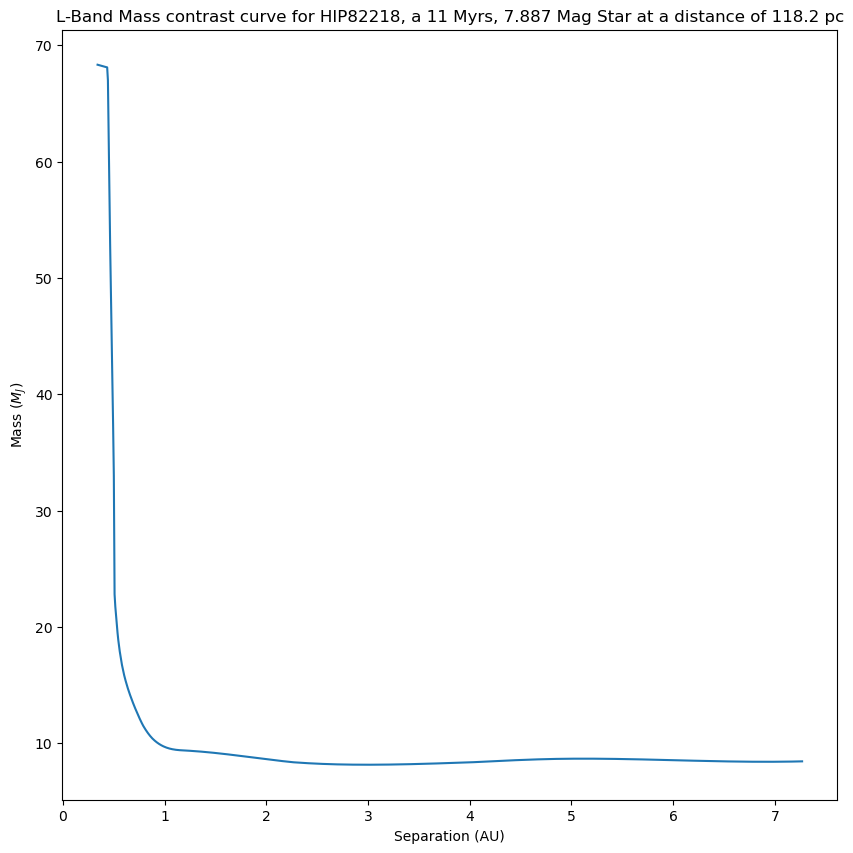

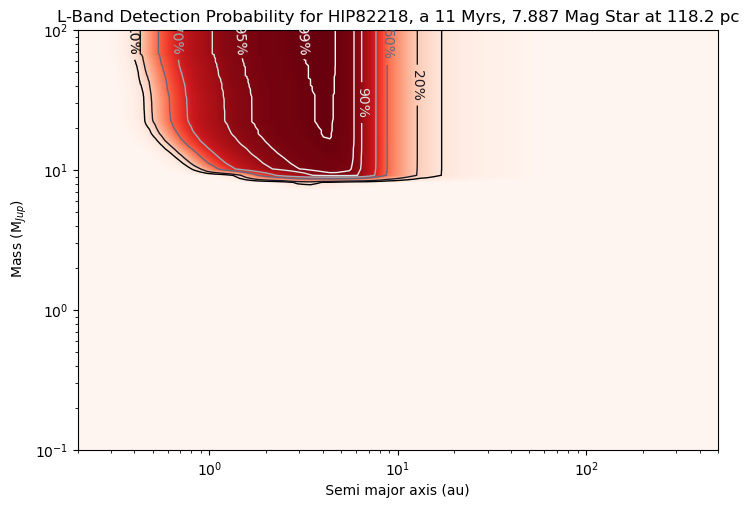

In [19]:
det.plot(model, model_tag, foldername, file_list, file_mag_list, distance, age, stellar_mag_list, filter_name_list, band_list, savefolder, star_list = star_list, xmin = 0.2, xmax = 500, logx = True, interpolate = False, custom = True)

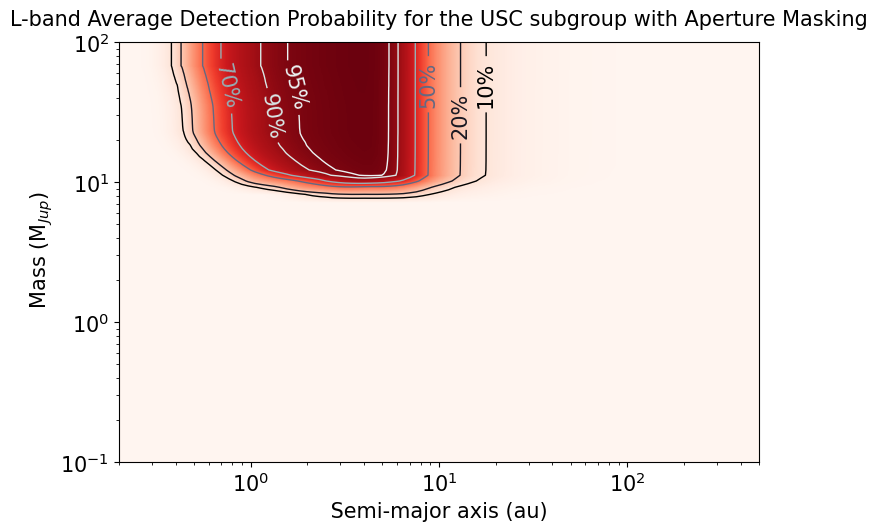

In [21]:
d = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/USC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
map = d/len(star_list)

savefilename = 'average_mask_USC_MKO_Lp_band'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(20,50),(13,30),(10,50),(0.8,50),(1.5,30),(2,50)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('L-band Average Detection Probability for the USC subgroup with Aperture Masking', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

In [22]:
data = np.loadtxt("eltmasking_limits.sm")
file_list = np.zeros(shape = [25, len(data[:,0]), 2])
for i in range(len(file_list[:,0,0])):
    file_list[i,:,0] = data[:,1] * 0.001
    file_list[i,:,1] = 10 ** (-data[:,3]/2.5)
model = 'atmo'
model_tag = 'atmo-ceq'
foldername = 'C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/exeter/fits'
file_mag_list = [7,7.5,8]
stellar_mag_list = [8.304,
7.039,
7.418,
8.026,
7.468,
7.636,
7.317,
7.360,
7.548,
7.887
]
star_list = ['HIP75659',
'HIP76782',
'HIP77347',
'HIP77736',
'HIP77960',
'HIP78581',
'HIP79250',
'HIP79690',
'HIP80896',
'HIP82218'
]
filter_name_list = ['MKO_Mp']*10
band_list = ['M']*10
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/USC_M'
distance = [122.5,
87.6,
123.3,
108.1,
121.4,
105.3,
120.9,
112.9,
118.2,
118.2
]
age = [11]*10

Unpacking ATMO isochrones (9.6 MB)... [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
M-Band Detection Probability for HIP75659, a 11 Myrs, 8.304 Mag Star at 122.5 pc time elapsed - 00:00:00.62
The 'MKO_Mp' filter is found in the list of available filters from the isochrone data of 'atmo-ceq'.
The requested contrast values will be directly interpolated from the grid with pre-calculated magnitudes.
M-Band Detection Probability for HIP76782, a 11 Myrs, 7.039 Mag Star at 87.6 pc time elapsed - 00:00:00.64
The 'MKO_Mp' filter is found in the list of available

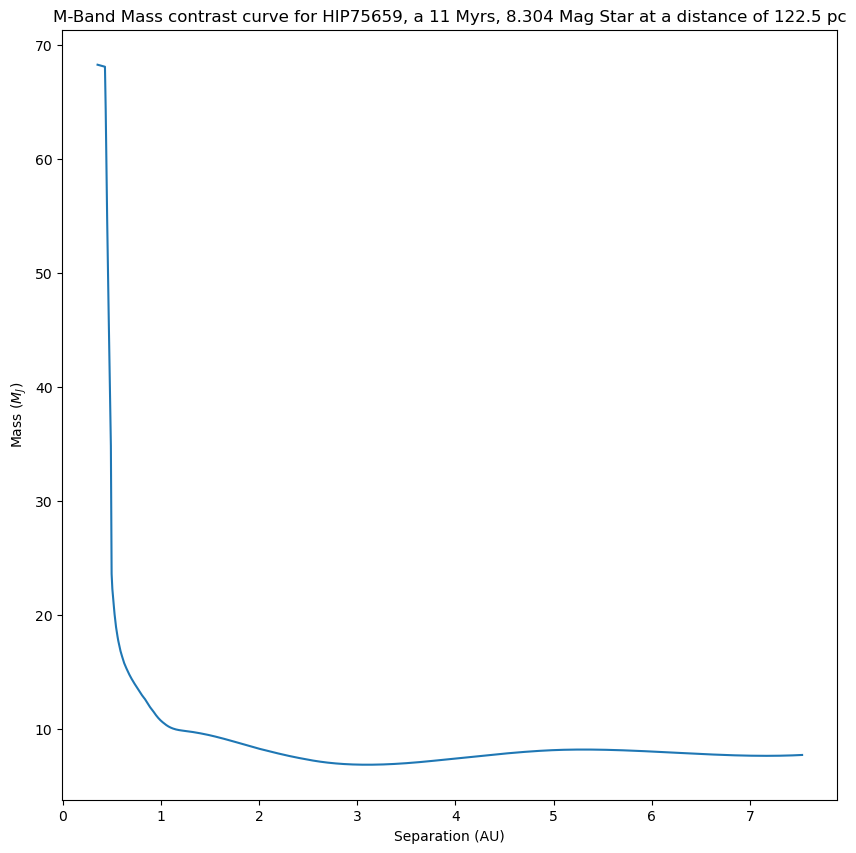

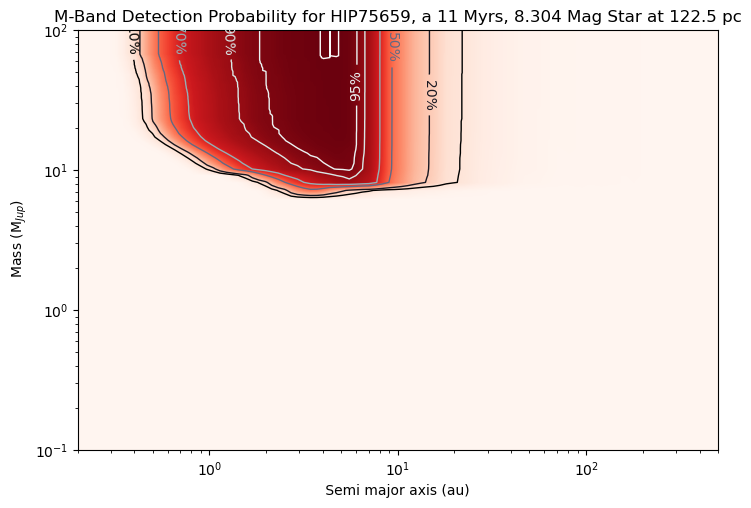

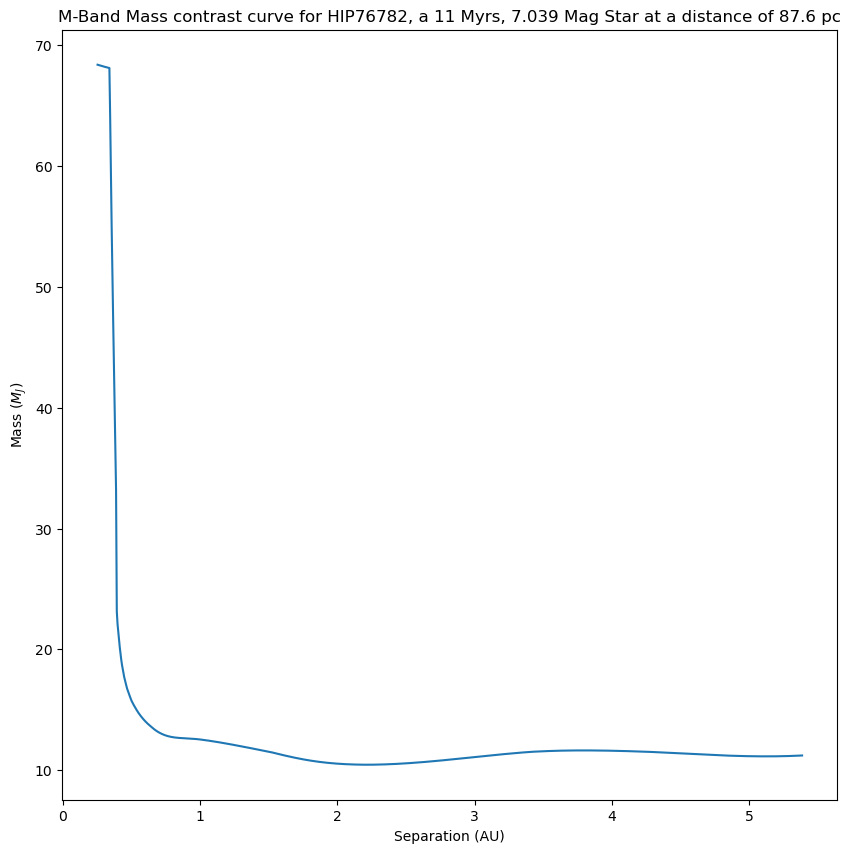

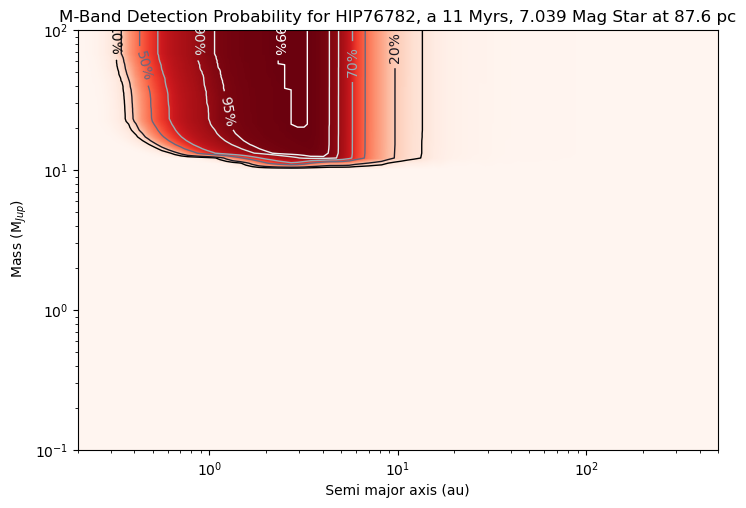

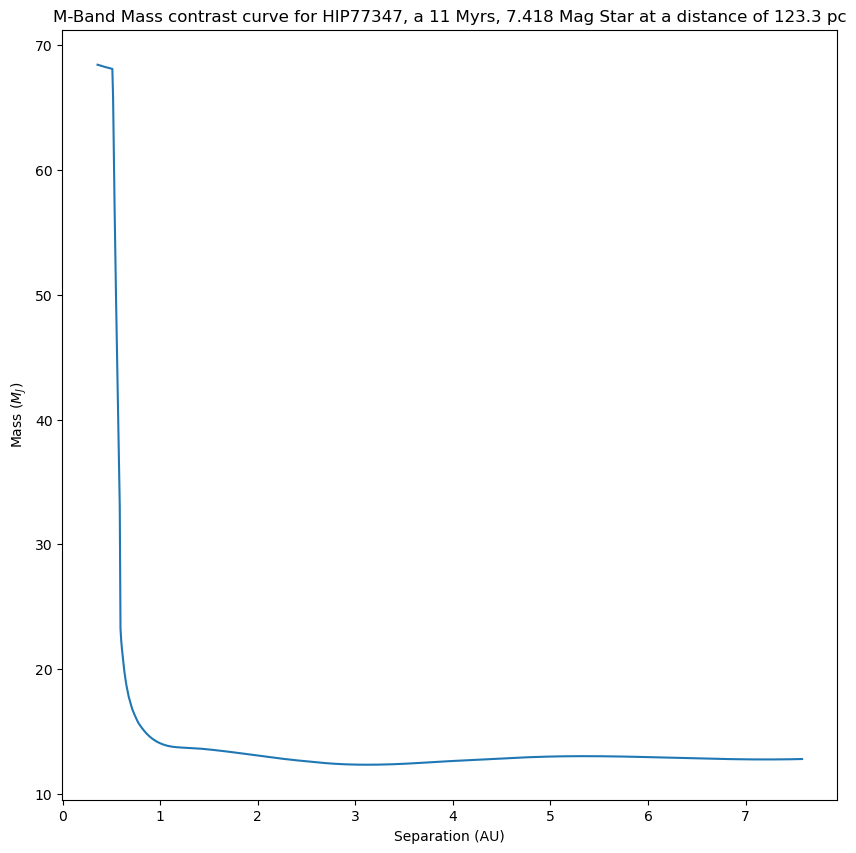

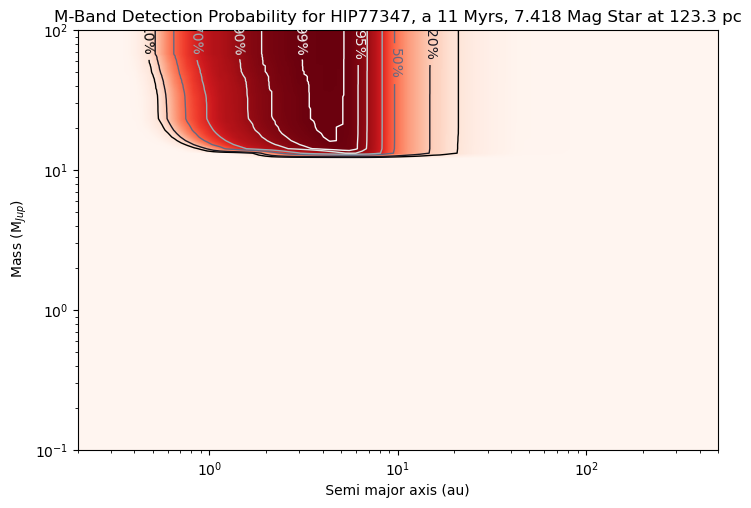

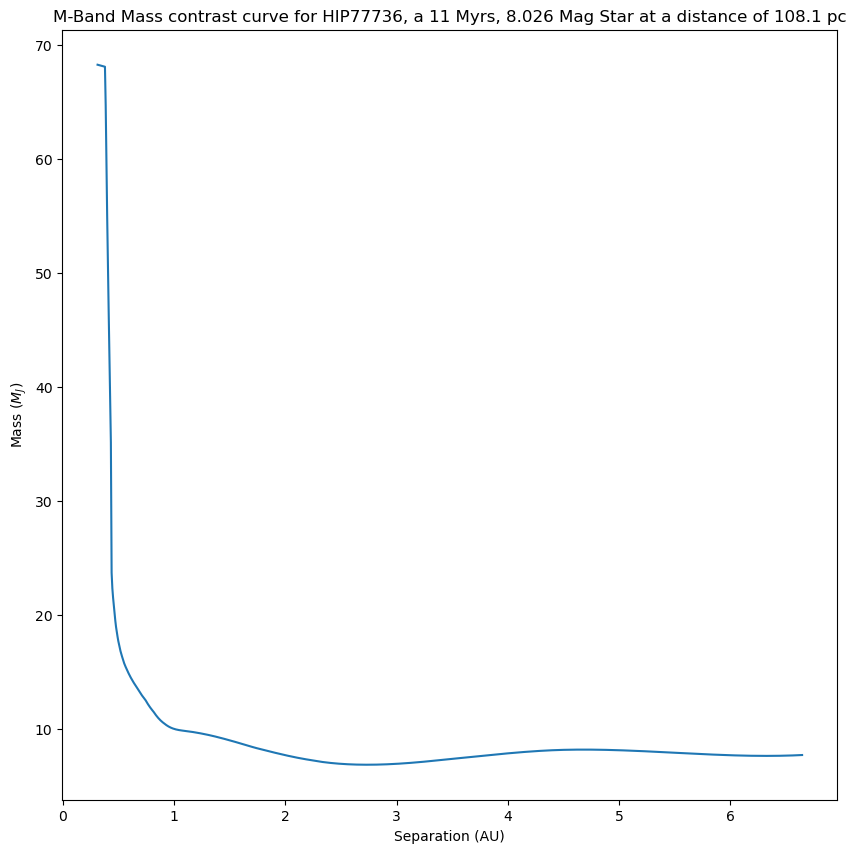

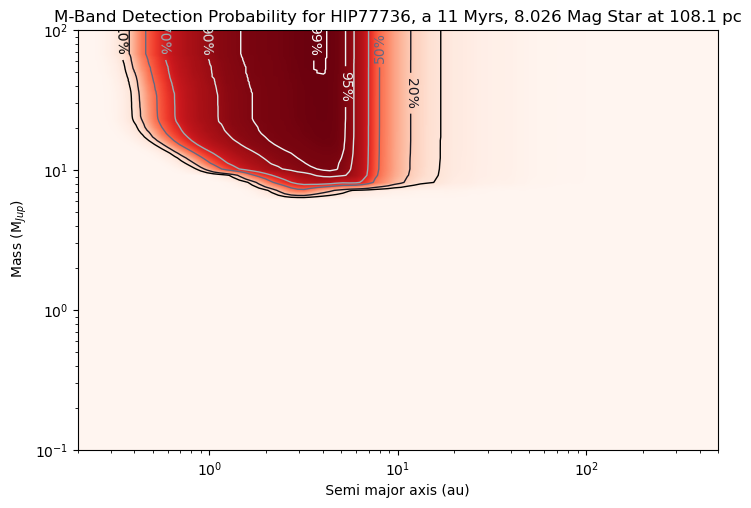

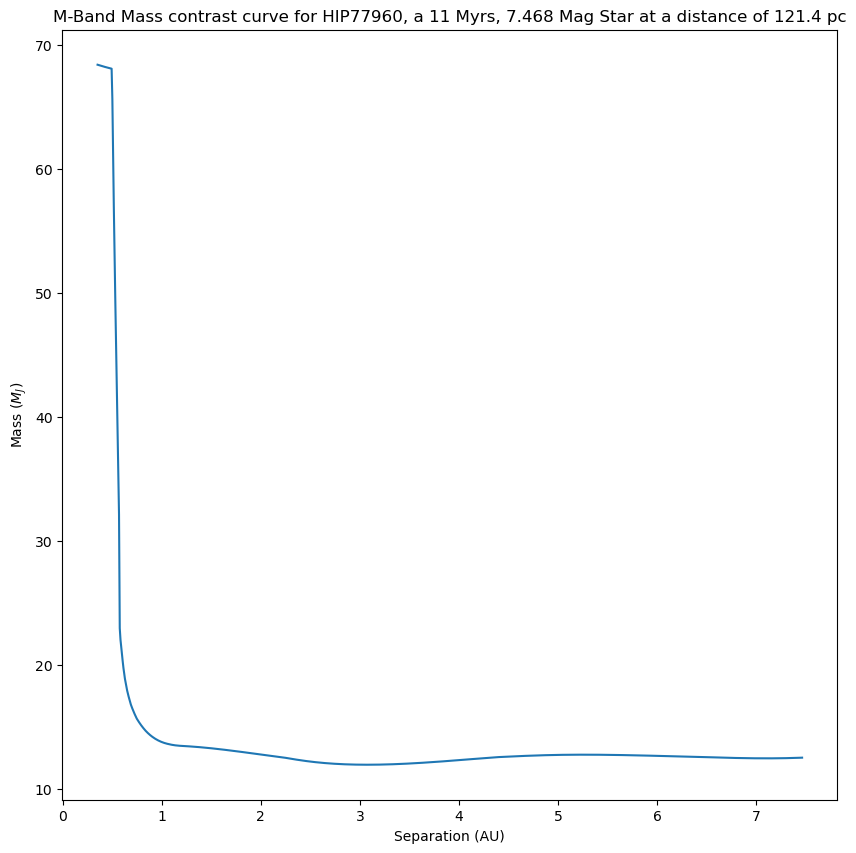

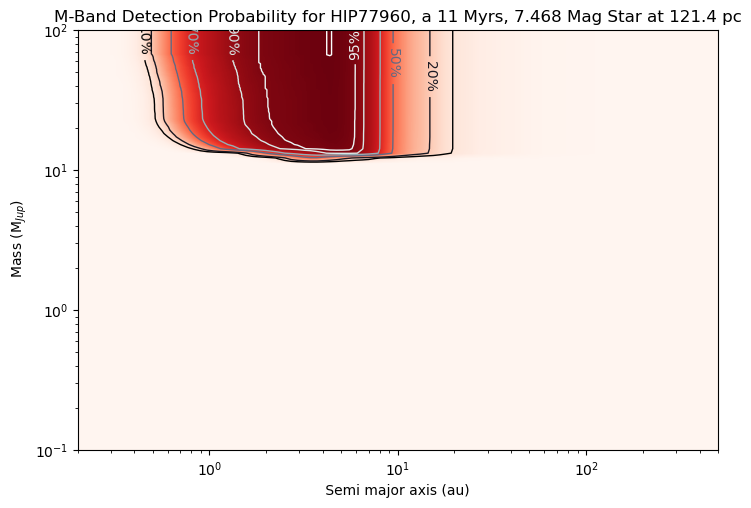

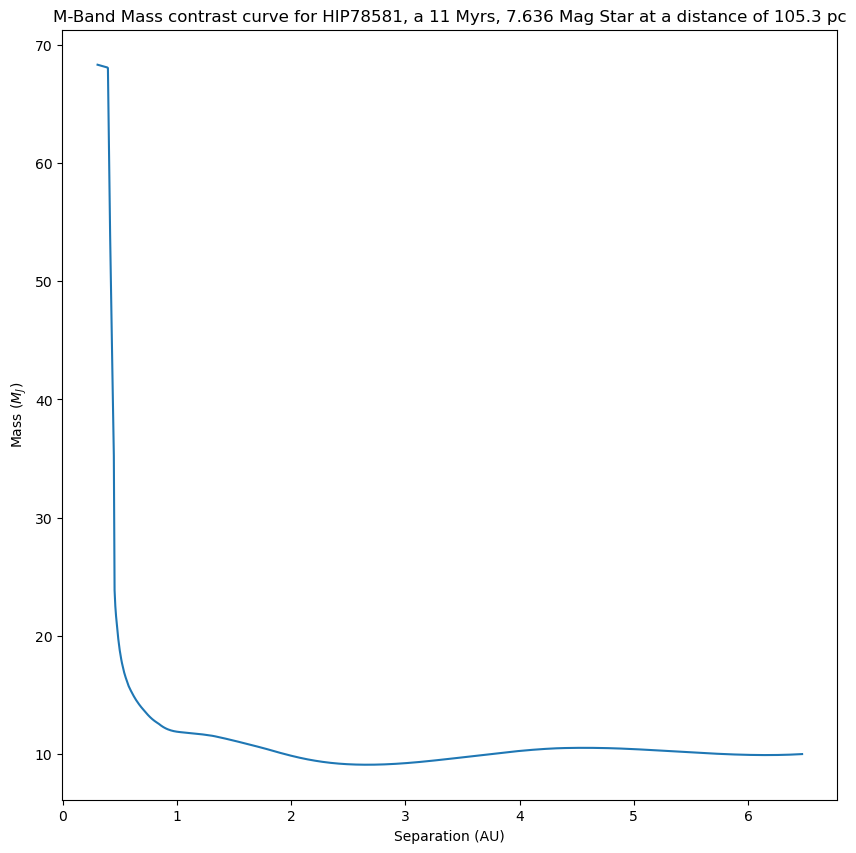

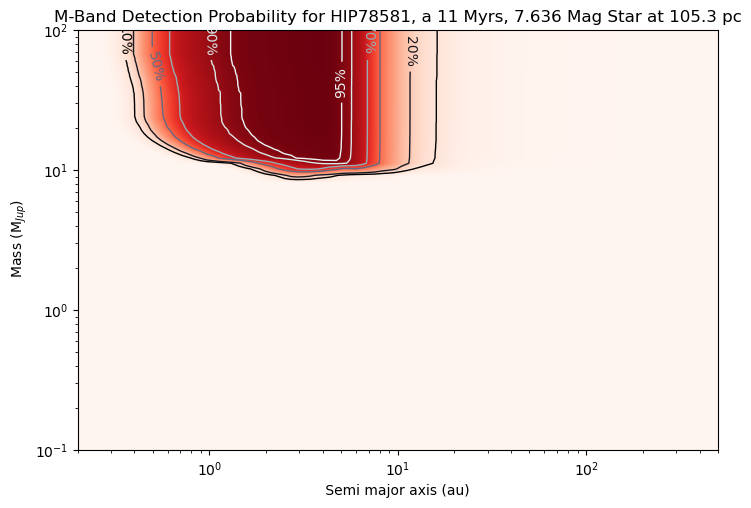

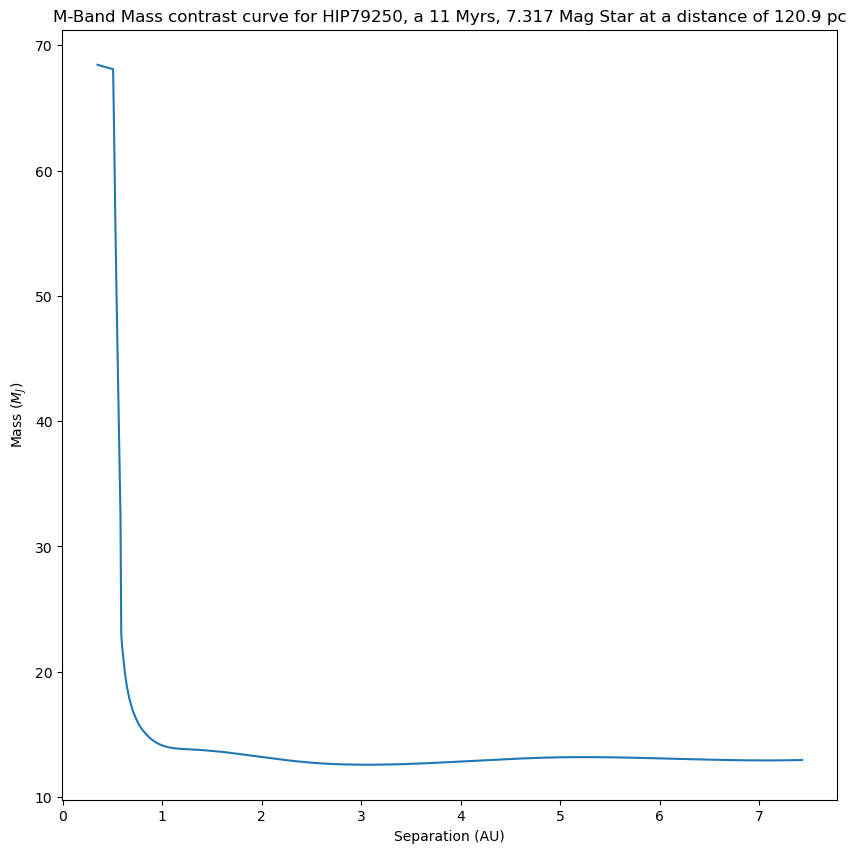

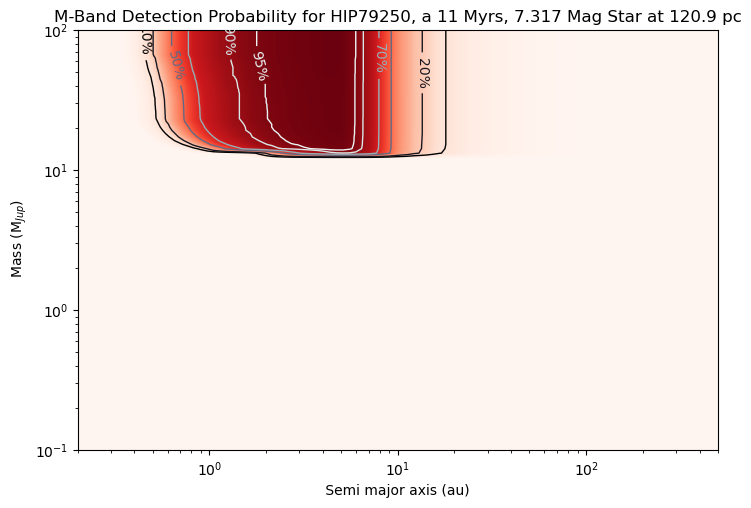

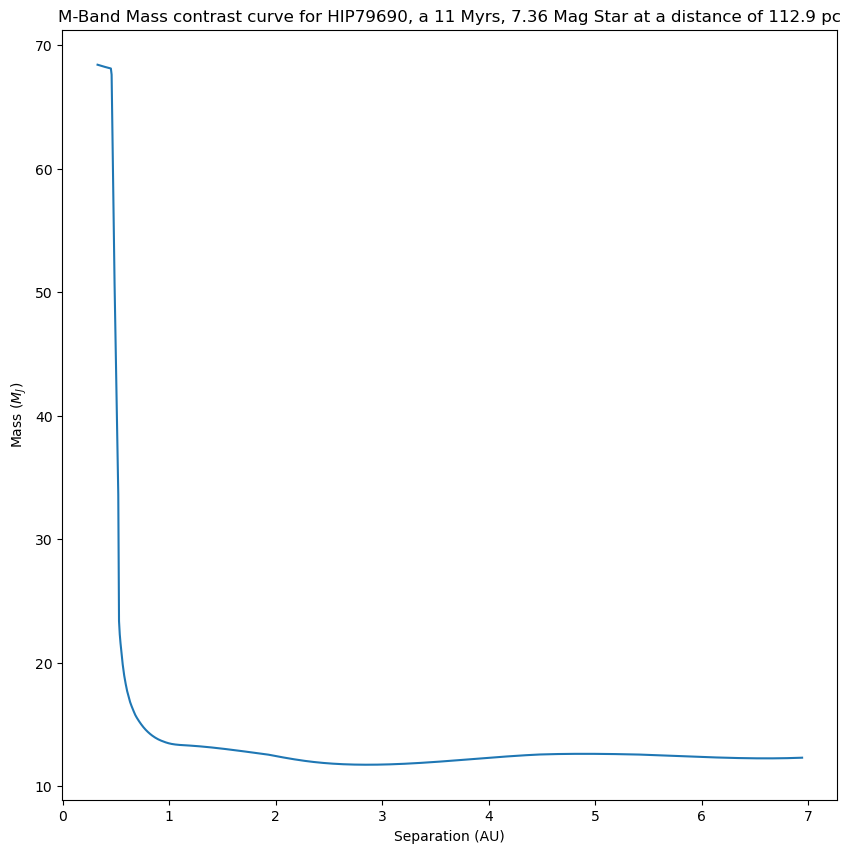

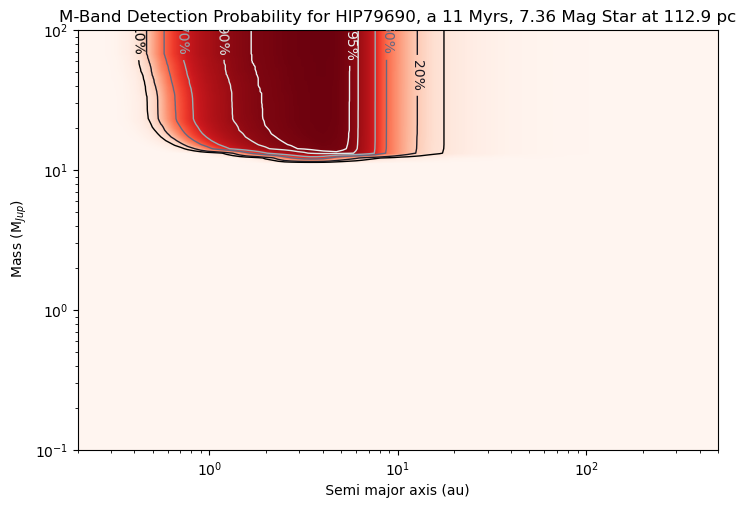

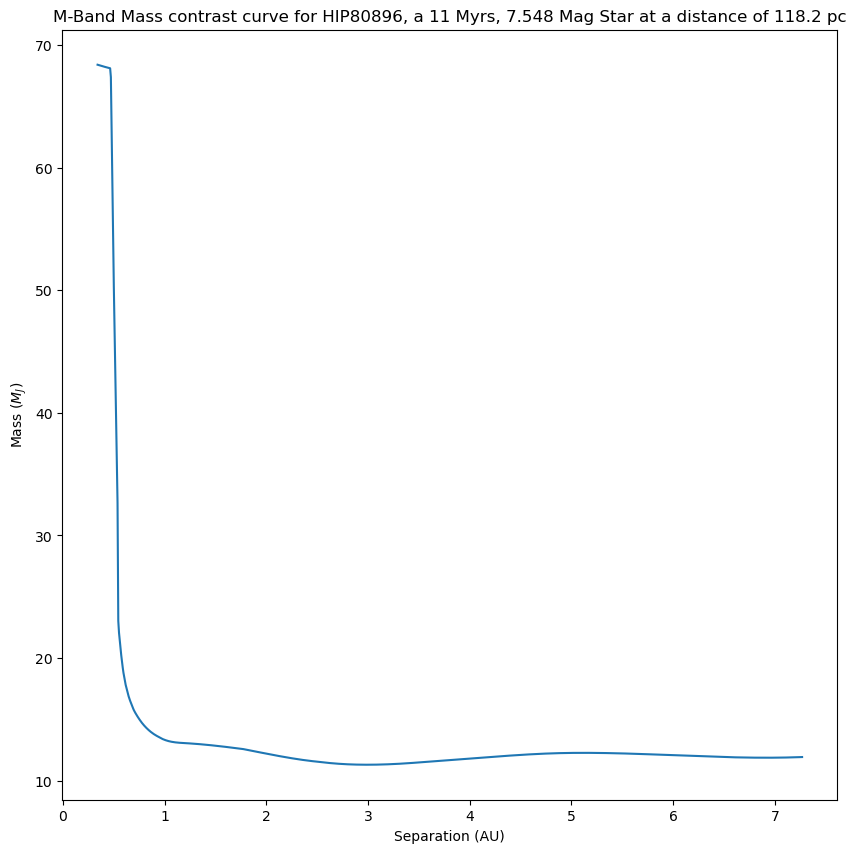

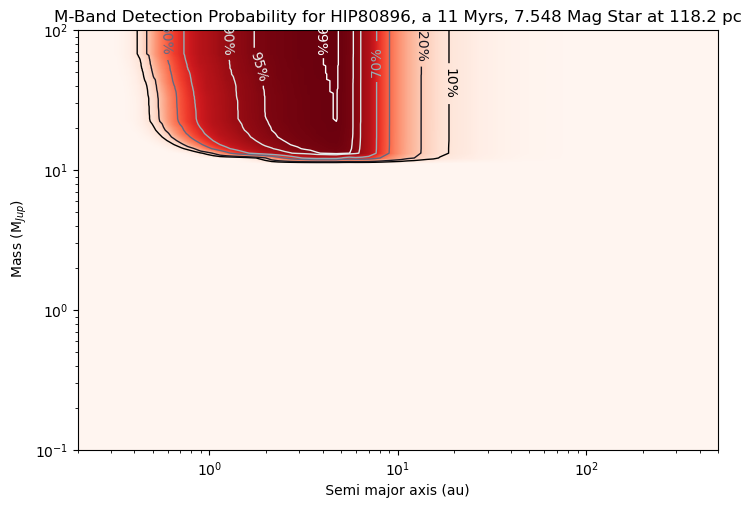

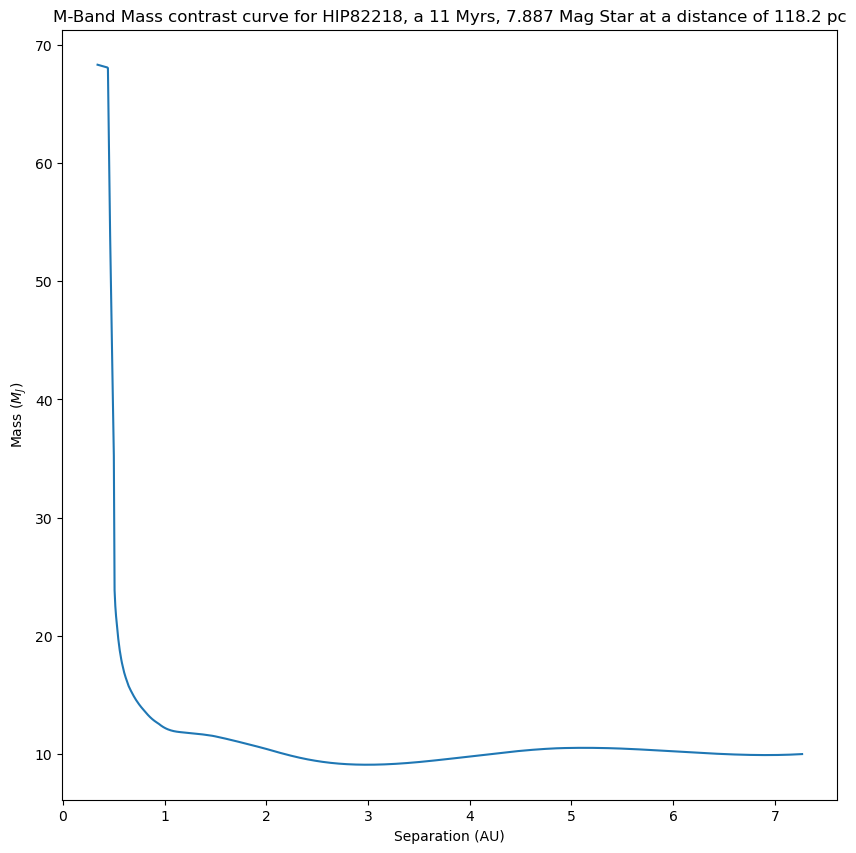

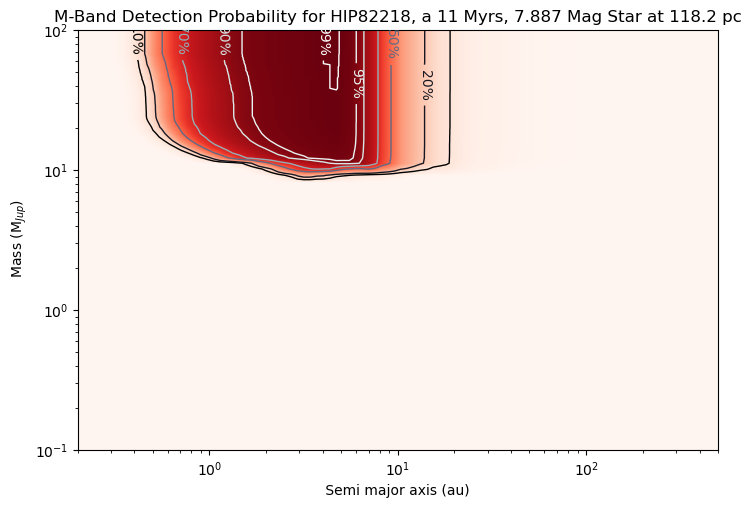

In [23]:
det.plot(model, model_tag, foldername, file_list, file_mag_list, distance, age, stellar_mag_list, filter_name_list, band_list, savefolder, star_list = star_list, xmin = 0.2, xmax = 500, logx = True, interpolate = False, custom = True)

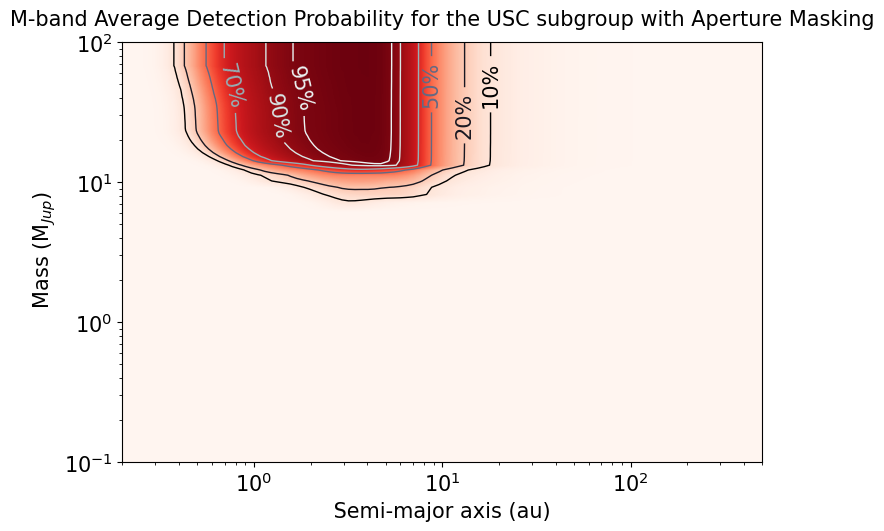

In [26]:
d = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/USC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)

savefilename = 'average_mask_USC_MKO_Mp_band'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,20,50,70,90,95,99,100]
norm = mcolors.Normalize(0, 100)
cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, cmap='bone', zorder=1, linewidths=1)
locations = [(20,50),(13,30),(10,50),(0.8,50),(1.5,30),(2,50)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)
ax.set_title('M-band Average Detection Probability for the USC subgroup with Aperture Masking', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

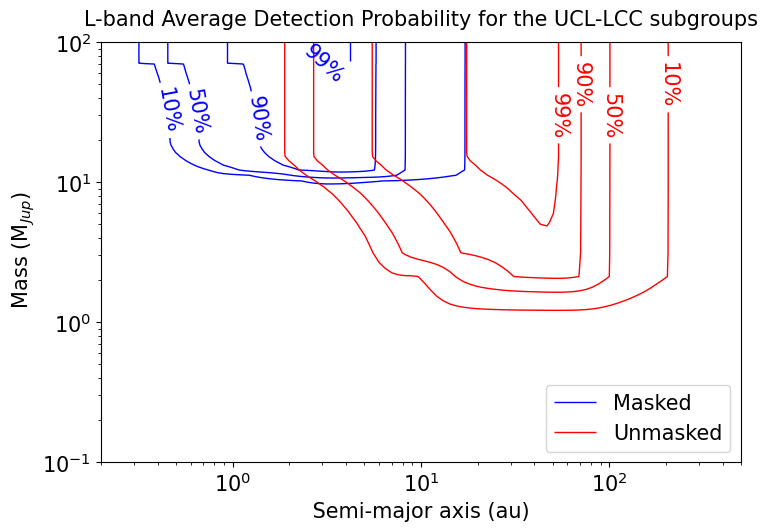

In [25]:
star_list = ['HIP55334',
             'HIP57950',
             'HIP58167',
             'HIP58220',
             'HIP58528',
             'HIP58899',
             'HIP59481',
             'HIP59505',
             'HIP60348',
             'HIP62171',
             'HIP62431',
             'HIP63041',
             'HIP63886',
             'HIP64184',
             'HIP64877',
             'HIP64995',
             'HIP67497',
             'HIP73990',
             'HIP74499',
             'HIP74865',
             'HIP75480',
             'HIP76084',
             'HIP76875',
             'HIP79516',
             'HIP79742',]
d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/UCL-LCC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/UCL-LCC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)

savefilename = 'average_compare_UCL-LCC_MKO_Lp_band'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,50,90,99]
norm = mcolors.Normalize(0, 100)
#cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, colors = 'blue', zorder=1, linewidths=1)
locations = [(0.3,30),(0.5,30),(2,30),(3,50)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)

contours2 = plt.contour(sma, m2, mop.T*100, levels, colors='red', zorder=1, linewidths=1)
locations2 = [(200,50),(100,30),(70,50),(50,30)]
ax.clabel(contours2, contours2.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations2)

h1,_ = contours.legend_elements()
h2,_ = contours2.legend_elements()
ax.legend([h1[0], h2[0]], ['Masked', 'Unmasked'], loc = 'lower right', fontsize = 15)
ax.set_title('L-band Average Detection Probability for the UCL-LCC subgroups', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

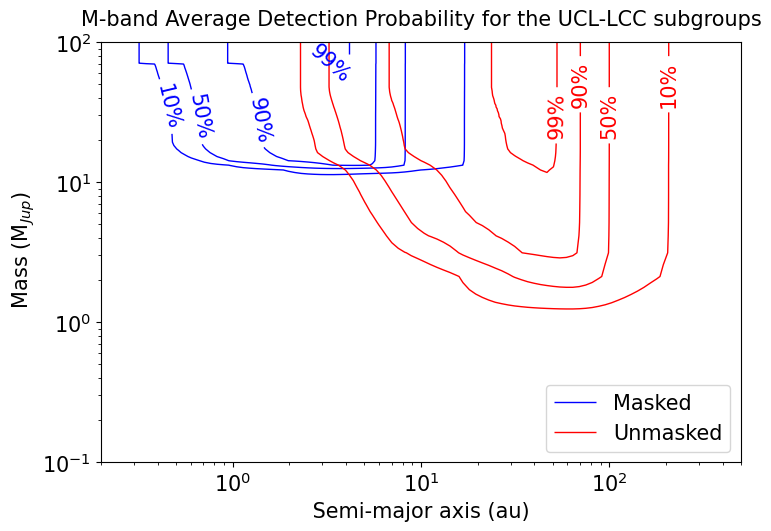

In [28]:
star_list = ['HIP55334',
             'HIP57950',
             'HIP58167',
             'HIP58220',
             'HIP58528',
             'HIP58899',
             'HIP59481',
             'HIP59505',
             'HIP60348',
             'HIP62171',
             'HIP62431',
             'HIP63041',
             'HIP63886',
             'HIP64184',
             'HIP64877',
             'HIP64995',
             'HIP67497',
             'HIP73990',
             'HIP74499',
             'HIP74865',
             'HIP75480',
             'HIP76084',
             'HIP76875',
             'HIP79516',
             'HIP79742',]
d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/UCL-LCC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/UCL-LCC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)

savefilename = 'average_compare_UCL-LCC_MKO_Mp_band'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,50,90,99]
norm = mcolors.Normalize(0, 100)
#cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, colors = 'blue', zorder=1, linewidths=1)
locations = [(0.3,30),(0.7,30),(2,30),(3,50)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)

contours2 = plt.contour(sma, m2, mop.T*100, levels, colors='red', zorder=1, linewidths=1)
locations2 = [(200,50),(100,30),(70,50),(50,30)]
ax.clabel(contours2, contours2.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations2)

h1,_ = contours.legend_elements()
h2,_ = contours2.legend_elements()
ax.legend([h1[0], h2[0]], ['Masked', 'Unmasked'], loc = 'lower right', fontsize = 15)
ax.set_title('M-band Average Detection Probability for the UCL-LCC subgroups', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

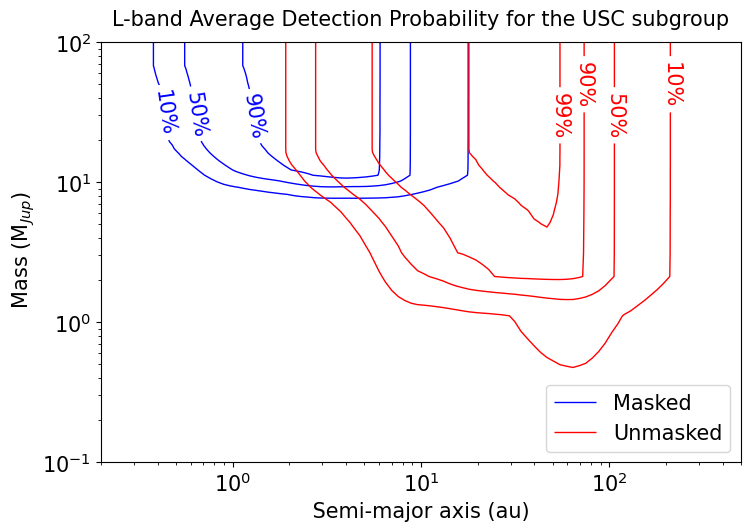

In [30]:
star_list = ['HIP75659',
'HIP76782',
'HIP77347',
'HIP77736',
'HIP77960',
'HIP78581',
'HIP79250',
'HIP79690',
'HIP80896',
'HIP82218'
]
d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/USC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/USC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)

savefilename = 'average_compare_USC_MKO_Lp_band'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,50,90,99]
norm = mcolors.Normalize(0, 100)
#cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, colors = 'blue', zorder=1, linewidths=1)
locations = [(0.3,30),(0.5,30),(2,30)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)

contours2 = plt.contour(sma, m2, mop.T*100, levels, colors='red', zorder=1, linewidths=1)
locations2 = [(200,50),(100,30),(70,50),(50,30)]
ax.clabel(contours2, contours2.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations2)

h1,_ = contours.legend_elements()
h2,_ = contours2.legend_elements()
ax.legend([h1[0], h2[0]], ['Masked', 'Unmasked'], loc = 'lower right', fontsize = 15)
ax.set_title('L-band Average Detection Probability for the USC subgroup', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

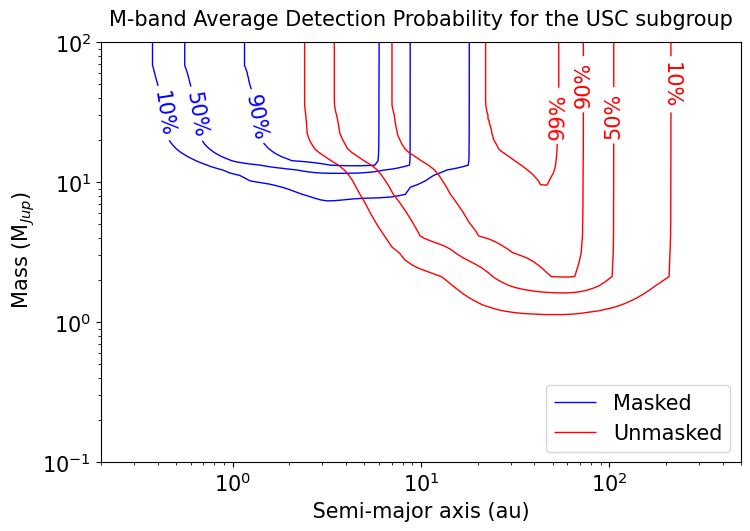

In [31]:
star_list = ['HIP75659',
'HIP76782',
'HIP77347',
'HIP77736',
'HIP77960',
'HIP78581',
'HIP79250',
'HIP79690',
'HIP80896',
'HIP82218'
]
d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/USC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/USC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)

savefilename = 'average_compare_USC_MKO_Mp_band'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,50,90,99]
norm = mcolors.Normalize(0, 100)
#cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, colors = 'blue', zorder=1, linewidths=1)
locations = [(0.3,30),(0.5,30),(2,30)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)

contours2 = plt.contour(sma, m2, mop.T*100, levels, colors='red', zorder=1, linewidths=1)
locations2 = [(200,50),(100,30),(70,50),(50,30)]
ax.clabel(contours2, contours2.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations2)

h1,_ = contours.legend_elements()
h2,_ = contours2.legend_elements()
ax.legend([h1[0], h2[0]], ['Masked', 'Unmasked'], loc = 'lower right', fontsize = 15)
ax.set_title('M-band Average Detection Probability for the USC subgroup', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

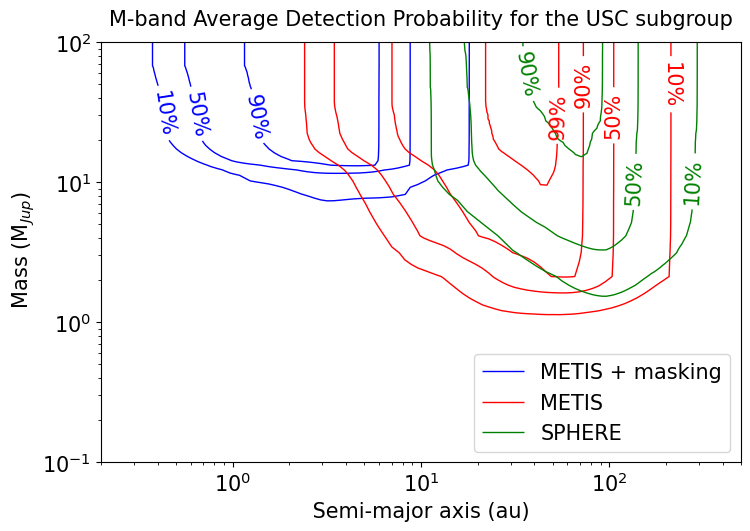

In [13]:
d = 0
for i in range(26):
    d += np.array(np.genfromtxt("C:/Users/bryce/High_Contrast_Imaging/METIS_2023/SHINE/scocen/{}_detprob.txt".format(i)))
mip = d/26
sma2 = np.linspace(0.5, 500, 100)

star_list = ['HIP75659',
'HIP76782',
'HIP77347',
'HIP77736',
'HIP77960',
'HIP78581',
'HIP79250',
'HIP79690',
'HIP80896',
'HIP82218'
]
d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/USC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/USC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)

savefilename = 'average_compare_USC_MKO_Mp_band_sphere'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,50,90,99]
norm = mcolors.Normalize(0, 100)
#cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, colors = 'blue', zorder=1, linewidths=1)
locations = [(0.3,30),(0.5,30),(2,30)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)

contours2 = plt.contour(sma, m2, mop.T*100, levels, colors='red', zorder=1, linewidths=1)
locations2 = [(200,50),(100,30),(70,50),(50,30)]
ax.clabel(contours2, contours2.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations2)

contours3 = plt.contour(sma2, m2, mip.T*100, levels, colors='green', zorder=1, linewidths=1)
locations3 = [(400,10),(150,10),(40,60)]
ax.clabel(contours3, contours3.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations3)

h1,_ = contours.legend_elements()
h2,_ = contours2.legend_elements()
h3,_ = contours3.legend_elements()
ax.legend([h1[0], h2[0], h3[0]], ['METIS + masking', 'METIS', 'SPHERE'], loc = 'lower right', fontsize = 15)
ax.set_title('M-band Average Detection Probability for the USC subgroup', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

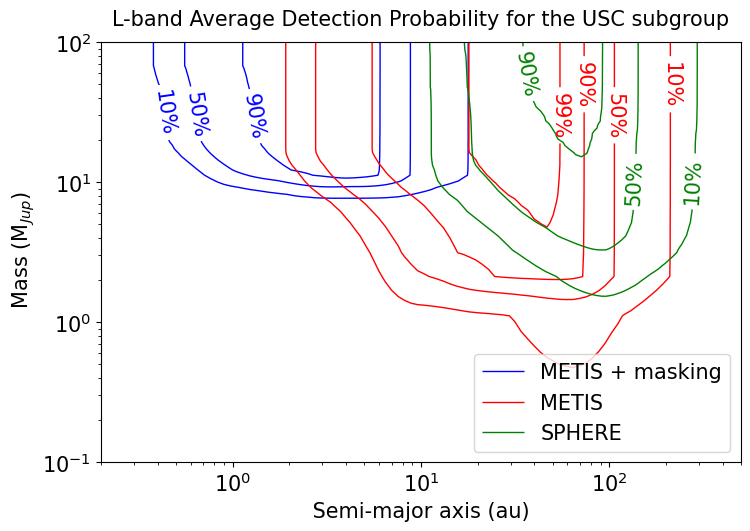

In [14]:
d = 0
for i in range(26):
    d += np.array(np.genfromtxt("C:/Users/bryce/High_Contrast_Imaging/METIS_2023/SHINE/scocen/{}_detprob.txt".format(i)))
mip = d/26
sma2 = np.linspace(0.5, 500, 100)

star_list = ['HIP75659',
'HIP76782',
'HIP77347',
'HIP77736',
'HIP77960',
'HIP78581',
'HIP79250',
'HIP79690',
'HIP80896',
'HIP82218'
]
d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/USC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/USC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)

savefilename = 'average_compare_USC_MKO_Lp_band_sphere'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,50,90,99]
norm = mcolors.Normalize(0, 100)
#cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, colors = 'blue', zorder=1, linewidths=1)
locations = [(0.3,30),(0.5,30),(2,30)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)

contours2 = plt.contour(sma, m2, mop.T*100, levels, colors='red', zorder=1, linewidths=1)
locations2 = [(200,50),(100,30),(70,50),(50,30)]
ax.clabel(contours2, contours2.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations2)

contours3 = plt.contour(sma2, m2, mip.T*100, levels, colors='green', zorder=1, linewidths=1)
locations3 = [(400,10),(150,10),(40,60)]
ax.clabel(contours3, contours3.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations3)

h1,_ = contours.legend_elements()
h2,_ = contours2.legend_elements()
h3,_ = contours3.legend_elements()
ax.legend([h1[0], h2[0], h3[0]], ['METIS + masking', 'METIS', 'SPHERE'], loc = 'lower right', fontsize = 15)
ax.set_title('L-band Average Detection Probability for the USC subgroup', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

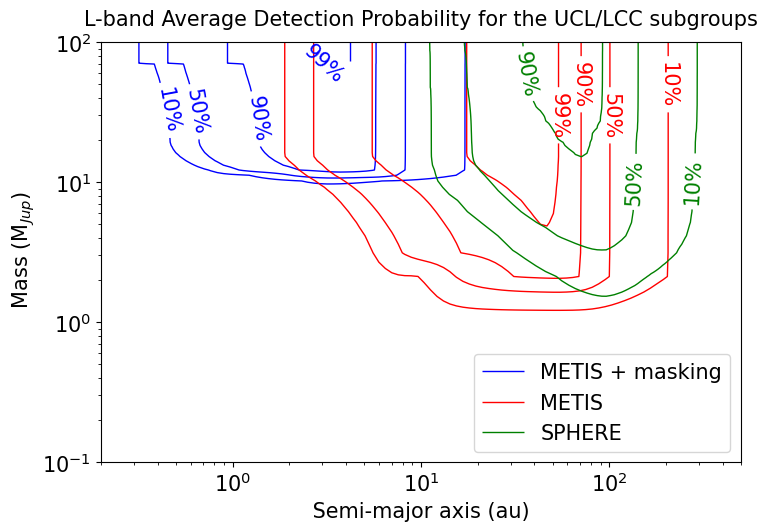

In [15]:
d = 0
for i in range(26):
    d += np.array(np.genfromtxt("C:/Users/bryce/High_Contrast_Imaging/METIS_2023/SHINE/scocen/{}_detprob.txt".format(i)))
mip = d/26
sma2 = np.linspace(0.5, 500, 100)

star_list = ['HIP55334',
             'HIP57950',
             'HIP58167',
             'HIP58220',
             'HIP58528',
             'HIP58899',
             'HIP59481',
             'HIP59505',
             'HIP60348',
             'HIP62171',
             'HIP62431',
             'HIP63041',
             'HIP63886',
             'HIP64184',
             'HIP64877',
             'HIP64995',
             'HIP67497',
             'HIP73990',
             'HIP74499',
             'HIP74865',
             'HIP75480',
             'HIP76084',
             'HIP76875',
             'HIP79516',
             'HIP79742',]
d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/UCL-LCC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/UCL-LCC_L/{}_MKO_Lp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)

savefilename = 'average_compare_UCL-LCC_MKO_Lp_band_sphere'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,50,90,99]
norm = mcolors.Normalize(0, 100)
#cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, colors = 'blue', zorder=1, linewidths=1)
locations = [(0.3,30),(0.5,30),(2,30),(3,50)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)

contours2 = plt.contour(sma, m2, mop.T*100, levels, colors='red', zorder=1, linewidths=1)
locations2 = [(200,50),(100,30),(70,50),(50,30)]
ax.clabel(contours2, contours2.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations2)

contours3 = plt.contour(sma2, m2, mip.T*100, levels, colors='green', zorder=1, linewidths=1)
locations3 = [(400,10),(150,10),(40,60)]
ax.clabel(contours3, contours3.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations3)

h1,_ = contours.legend_elements()
h2,_ = contours2.legend_elements()
h3,_ = contours3.legend_elements()
ax.legend([h1[0], h2[0], h3[0]], ['METIS + masking', 'METIS', 'SPHERE'], loc = 'lower right', fontsize = 15)
ax.set_title('L-band Average Detection Probability for the UCL/LCC subgroups', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')

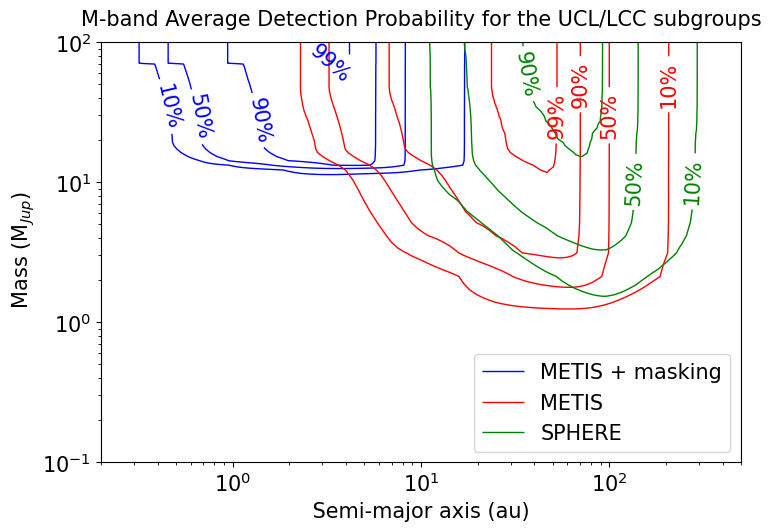

In [16]:
d = 0
for i in range(26):
    d += np.array(np.genfromtxt("C:/Users/bryce/High_Contrast_Imaging/METIS_2023/SHINE/scocen/{}_detprob.txt".format(i)))
mip = d/26
sma2 = np.linspace(0.5, 500, 100)

star_list = ['HIP55334',
             'HIP57950',
             'HIP58167',
             'HIP58220',
             'HIP58528',
             'HIP58899',
             'HIP59481',
             'HIP59505',
             'HIP60348',
             'HIP62171',
             'HIP62431',
             'HIP63041',
             'HIP63886',
             'HIP64184',
             'HIP64877',
             'HIP64995',
             'HIP67497',
             'HIP73990',
             'HIP74499',
             'HIP74865',
             'HIP75480',
             'HIP76084',
             'HIP76875',
             'HIP79516',
             'HIP79742',]
d = 0
e = 0
for i in star_list:
    d += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/mask_sco-cen/UCL-LCC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
    e += np.array(np.genfromtxt('C:/Users/bryce/High_Contrast_Imaging/METIS_2024/sco_cen/UCL-LCC_M/{}_MKO_Mp_band_detprob.txt'.format(i)))
map = d/len(star_list)
mop = e/len(star_list)

savefilename = 'average_compare_UCL-LCC_MKO_Mp_band_sphere'
savefolder = 'C:/Users/bryce/High_Contrast_Imaging/METIS_2024/average/'

fig = plt.figure(figsize=(8, 6))

sma = np.geomspace(0.2, 500, 100)
m2 = np.linspace(0.1, 100, 100)

ax = fig.add_axes([0.15, 0.15, 0.8, 0.7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(" Mass (M$_{Jup}$)", size = 15)
ax.set_xlabel(" Semi-major axis (au) ", size = 15)
#ax.grid(which = 'major', color = 'black')
#ax.grid(which = 'minor', color = 'gray', linestyle = '--')

levels=[10,50,90,99]
norm = mcolors.Normalize(0, 100)
#cf0=ax.contourf(sma, m2, map.T*100, norm=norm, levels=np.arange(0,100,0.1), extend='neither', cmap='Reds', antialiased=False, zorder=0)
contours = plt.contour(sma, m2, map.T*100, levels, colors = 'blue', zorder=1, linewidths=1)
locations = [(0.3,30),(0.7,30),(2,30),(3,50)]
ax.clabel(contours, contours.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations)

contours2 = plt.contour(sma, m2, mop.T*100, levels, colors='red', zorder=1, linewidths=1)
locations2 = [(200,50),(100,30),(70,50),(50,30)]
ax.clabel(contours2, contours2.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations2)

contours3 = plt.contour(sma2, m2, mip.T*100, levels, colors='green', zorder=1, linewidths=1)
locations3 = [(400,10),(150,10),(40,60)]
ax.clabel(contours3, contours3.levels, fmt = {10:'10%',20:'20%',50:'50%',70:'70%',90:'90%',95:'95%',99:'99%',100:'100%'}, inline=True, fontsize=15, manual = locations3)

h1,_ = contours.legend_elements()
h2,_ = contours2.legend_elements()
h3,_ = contours3.legend_elements()
ax.legend([h1[0], h2[0], h3[0]], ['METIS + masking', 'METIS', 'SPHERE'], loc = 'lower right', fontsize = 15)
ax.set_title('M-band Average Detection Probability for the UCL/LCC subgroups', size = 15, y = 1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')